# **SETUP**

**Importing the Library**

In [65]:
# importing the pandas library 
import pandas as pd 
# importing matplotlib library
import matplotlib.pyplot as plt 
# importing numpy library
import numpy as np 
# importing seaborn library
import seaborn as sns 
# importing preprocessing module from sklearn library
from sklearn import preprocessing 
%matplotlib inline

**Importing the Dataset**

In [66]:
# importing the dataset from csv format and storing it in dataframe named 'df'
df = pd.read_csv('cwk_data_lixhs34.csv') 

**Separating input and output features**

In [67]:
# storing all the input features to the variable 'x'
x = df.iloc[:,:-1] 
# storing the output feature to the variable 'y' and converting it to dataframe
y = pd.DataFrame(df.iloc[:,-1],columns=['y']) 
# Taking a look at first few rows of the dataset
df.head() 

age           job   marital  education default  balance housing loan  \
0   45  entrepreneur   married   tertiary      no      169      no   no   
1   66     housemaid   married    primary      no     1230      no   no   
2   29   blue-collar  divorced  secondary      no     -300      no   no   
3   35      services   married  secondary      no      341     yes   no   
4   55      services   married   tertiary      no     2877      no   no   

    contact  day  duration  campaign  pdays  previous poutcome    y  
0  cellular    7       391         4     -1         0  unknown   no  
1  cellular   17       726         3     -1         0  unknown  yes  
2   unknown   21       192         1     -1         0  unknown   no  
3  cellular   14       345         1     -1         0  unknown  yes  
4  cellular    9       305         1     91         2    other   no

**Separating numerical and categorical data from the input features**

In [68]:
# Extracting Numerical data from the dataset
numerical_data = x.select_dtypes(include=[np.number]) 
# Extracting Categorical data from the dataset
categorical_data = x.select_dtypes(exclude=[np.number]) 

# **SECTION A: SUMMARIZATION**

## **Understanding the dataset**

In [69]:
# Printing number of rows and columns
print("The dataset has ", df.shape[1], " columns and ", df.shape[0], " rows.") 
# Printing number of duplicated rows
print("The dataset has ", df[df.duplicated()].shape[0], " duplicated rows.") 
print(" ")
### Checking null values and data types
print("Information about null values and datatype of features in the dataset: ")
print(" ")
print(df.info())

The dataset has  16  columns and  4000  rows.
The dataset has  0  duplicated rows.
 
Information about null values and datatype of features in the dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4000 non-null   int64 
 1   job        4000 non-null   object
 2   marital    4000 non-null   object
 3   education  4000 non-null   object
 4   default    4000 non-null   object
 5   balance    4000 non-null   int64 
 6   housing    4000 non-null   object
 7   loan       4000 non-null   object
 8   contact    4000 non-null   object
 9   day        4000 non-null   int64 
 10  duration   4000 non-null   int64 
 11  campaign   4000 non-null   int64 
 12  pdays      4000 non-null   int64 
 13  previous   4000 non-null   int64 
 14  poutcome   4000 non-null   object
 15  y          4000 non-null   object
dtypes: int64(7), object(9)
memo

## **(A) Numerical Data**







### **Individual Feature Analysis**

---





**STATISTICAL SUMMARY**

In [70]:
### Printing shape and statistical summary for the numerical data of input features
print("Statistical Summary of the numeric features in the dataset:\n")
print('Shape =',numerical_data.shape,'\n\n',numerical_data.describe())

Statistical Summary of the numeric features in the dataset:

Shape = (4000, 7) 

                age       balance          day     duration    campaign  \
count  4000.000000   4000.000000  4000.000000  4000.000000  4000.00000   
mean     40.781500   1281.211500    15.863750   289.088250     2.68850   
std      10.906099   2523.774475     8.354677   292.094953     2.94162   
min      18.000000  -1664.000000     1.000000     4.000000     1.00000   
25%      32.000000     82.000000     8.000000   107.000000     1.00000   
50%      39.000000    424.000000    16.000000   199.000000     2.00000   
75%      48.000000   1400.500000    22.000000   360.250000     3.00000   
max      90.000000  36252.000000    31.000000  3183.000000    51.00000   

             pdays     previous  
count  4000.000000  4000.000000  
mean     42.868750     0.607000  
std     102.870424     1.885322  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.0

**BOX PLOTS + HISTOGRAM PLOTS (OUTLIER ANALYSIS)**

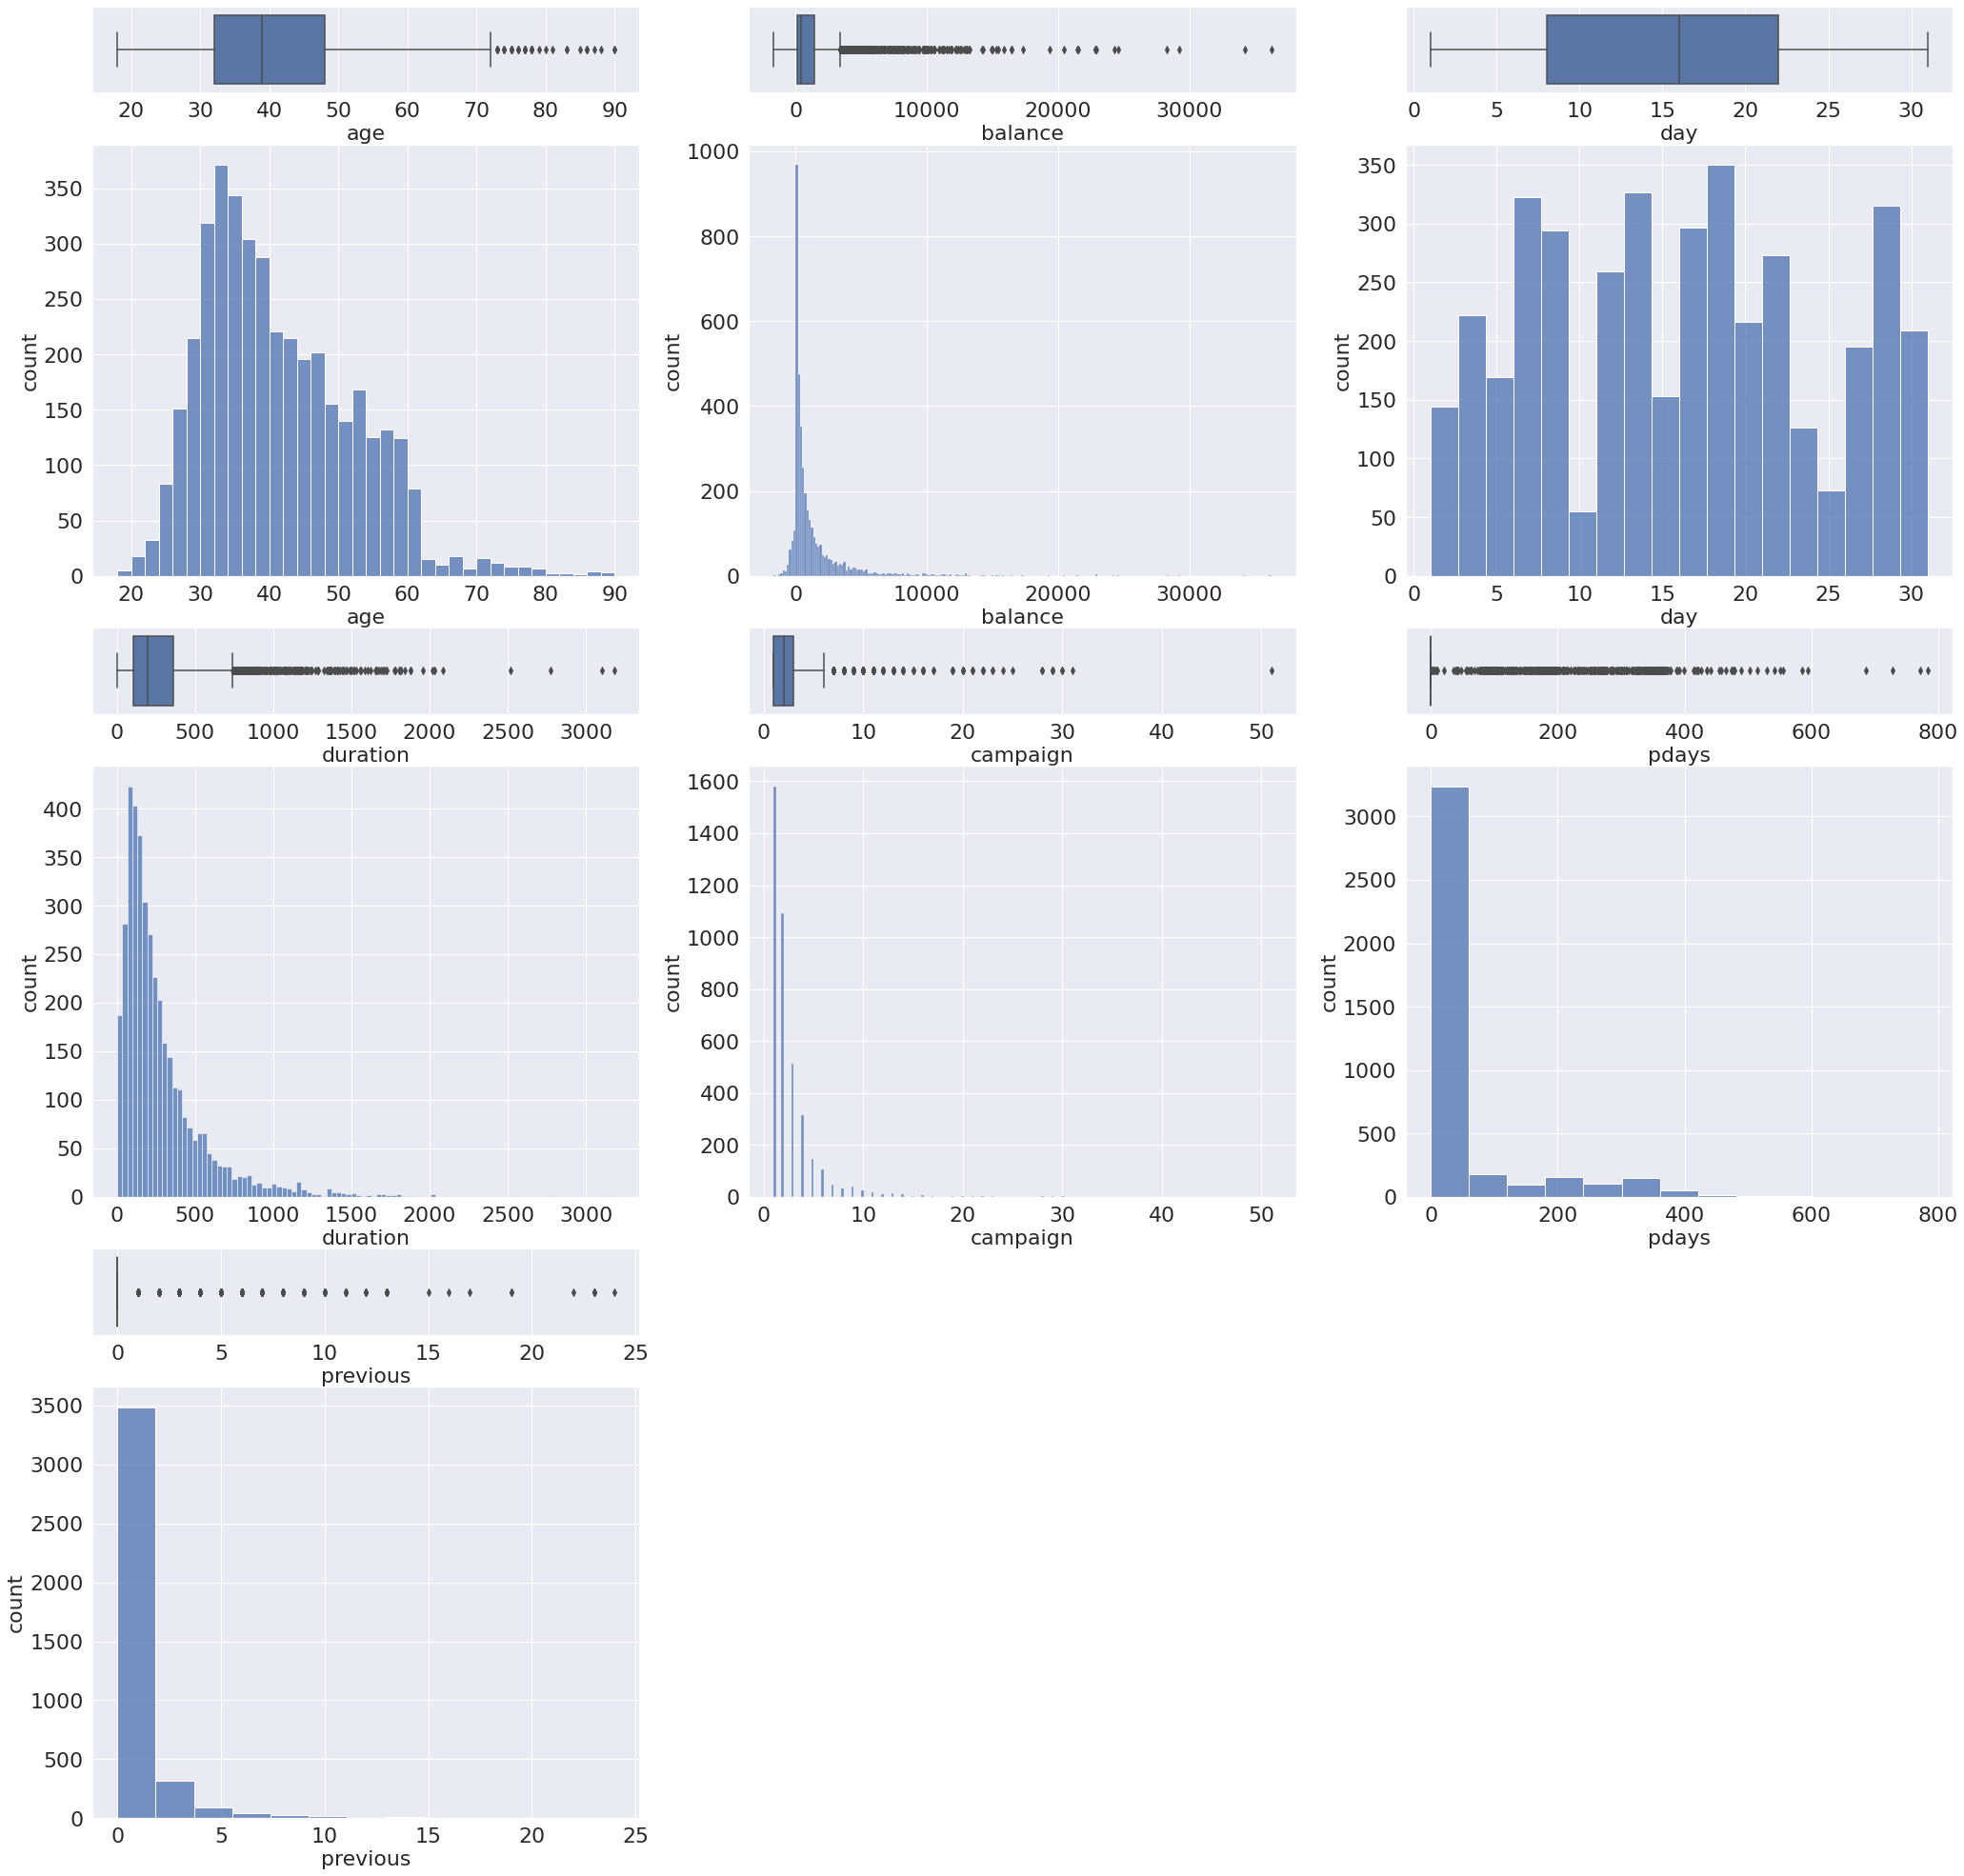

In [71]:
# Defining the overall figure size for all subplots
plt.rcParams['figure.figsize'] = (35,35)
# Setting up a grey background for the subplots
sns.set(style="darkgrid")
# Creating a figure and a set of subplots, the 'axes' stores an array of Axes objects
fig,axes = plt.subplots(ncols=3,nrows=6,gridspec_kw={'height_ratios':[1,5,1,5,1,5]})

# # Hiding the last 2 subplot because we have only 7 subplots to be plotted
axes[-1, -1].axis('off')
axes[-1, -2].axis('off')
axes[-2, -2].axis('off')
axes[-2, -1].axis('off')
# Storing axes objects in the list, in order to traverse using for loop
axes_list = []
for j in axes.flat:
  axes_list.append(j)

# Defining list1 to store the subplots index where we want to plot the box plots i.e 1st row, 3rd row, 5th row
list1 = [0,1,2,6,7,8,12,13,14]
# Run for loop across the columns
for i in range(len(numerical_data.columns)):
  j = list1[i]
  # Plotting box plot in the odd no. of row for ith column of numerical_data
  sns.boxplot(x=numerical_data.iloc[:,i], ax=axes_list[j])
  axes_list[j].set_xlabel(numerical_data.columns[i],fontsize=22)
  axes_list[j].tick_params(axis='x', labelsize=22)
  # Plotting histogram plot in the even no. of row for ith column of numerical_data
  sns.histplot(data=numerical_data.iloc[:,i], ax=axes_list[j+3])
  axes_list[j+3].set_xlabel(numerical_data.columns[i],fontsize=22)
  axes_list[j+3].set_ylabel('count',fontsize=22)
  axes_list[j+3].tick_params(axis='x', labelsize=22)
  axes_list[j+3].tick_params(axis='y', labelsize=22)


**VIOLIN PLOTS**

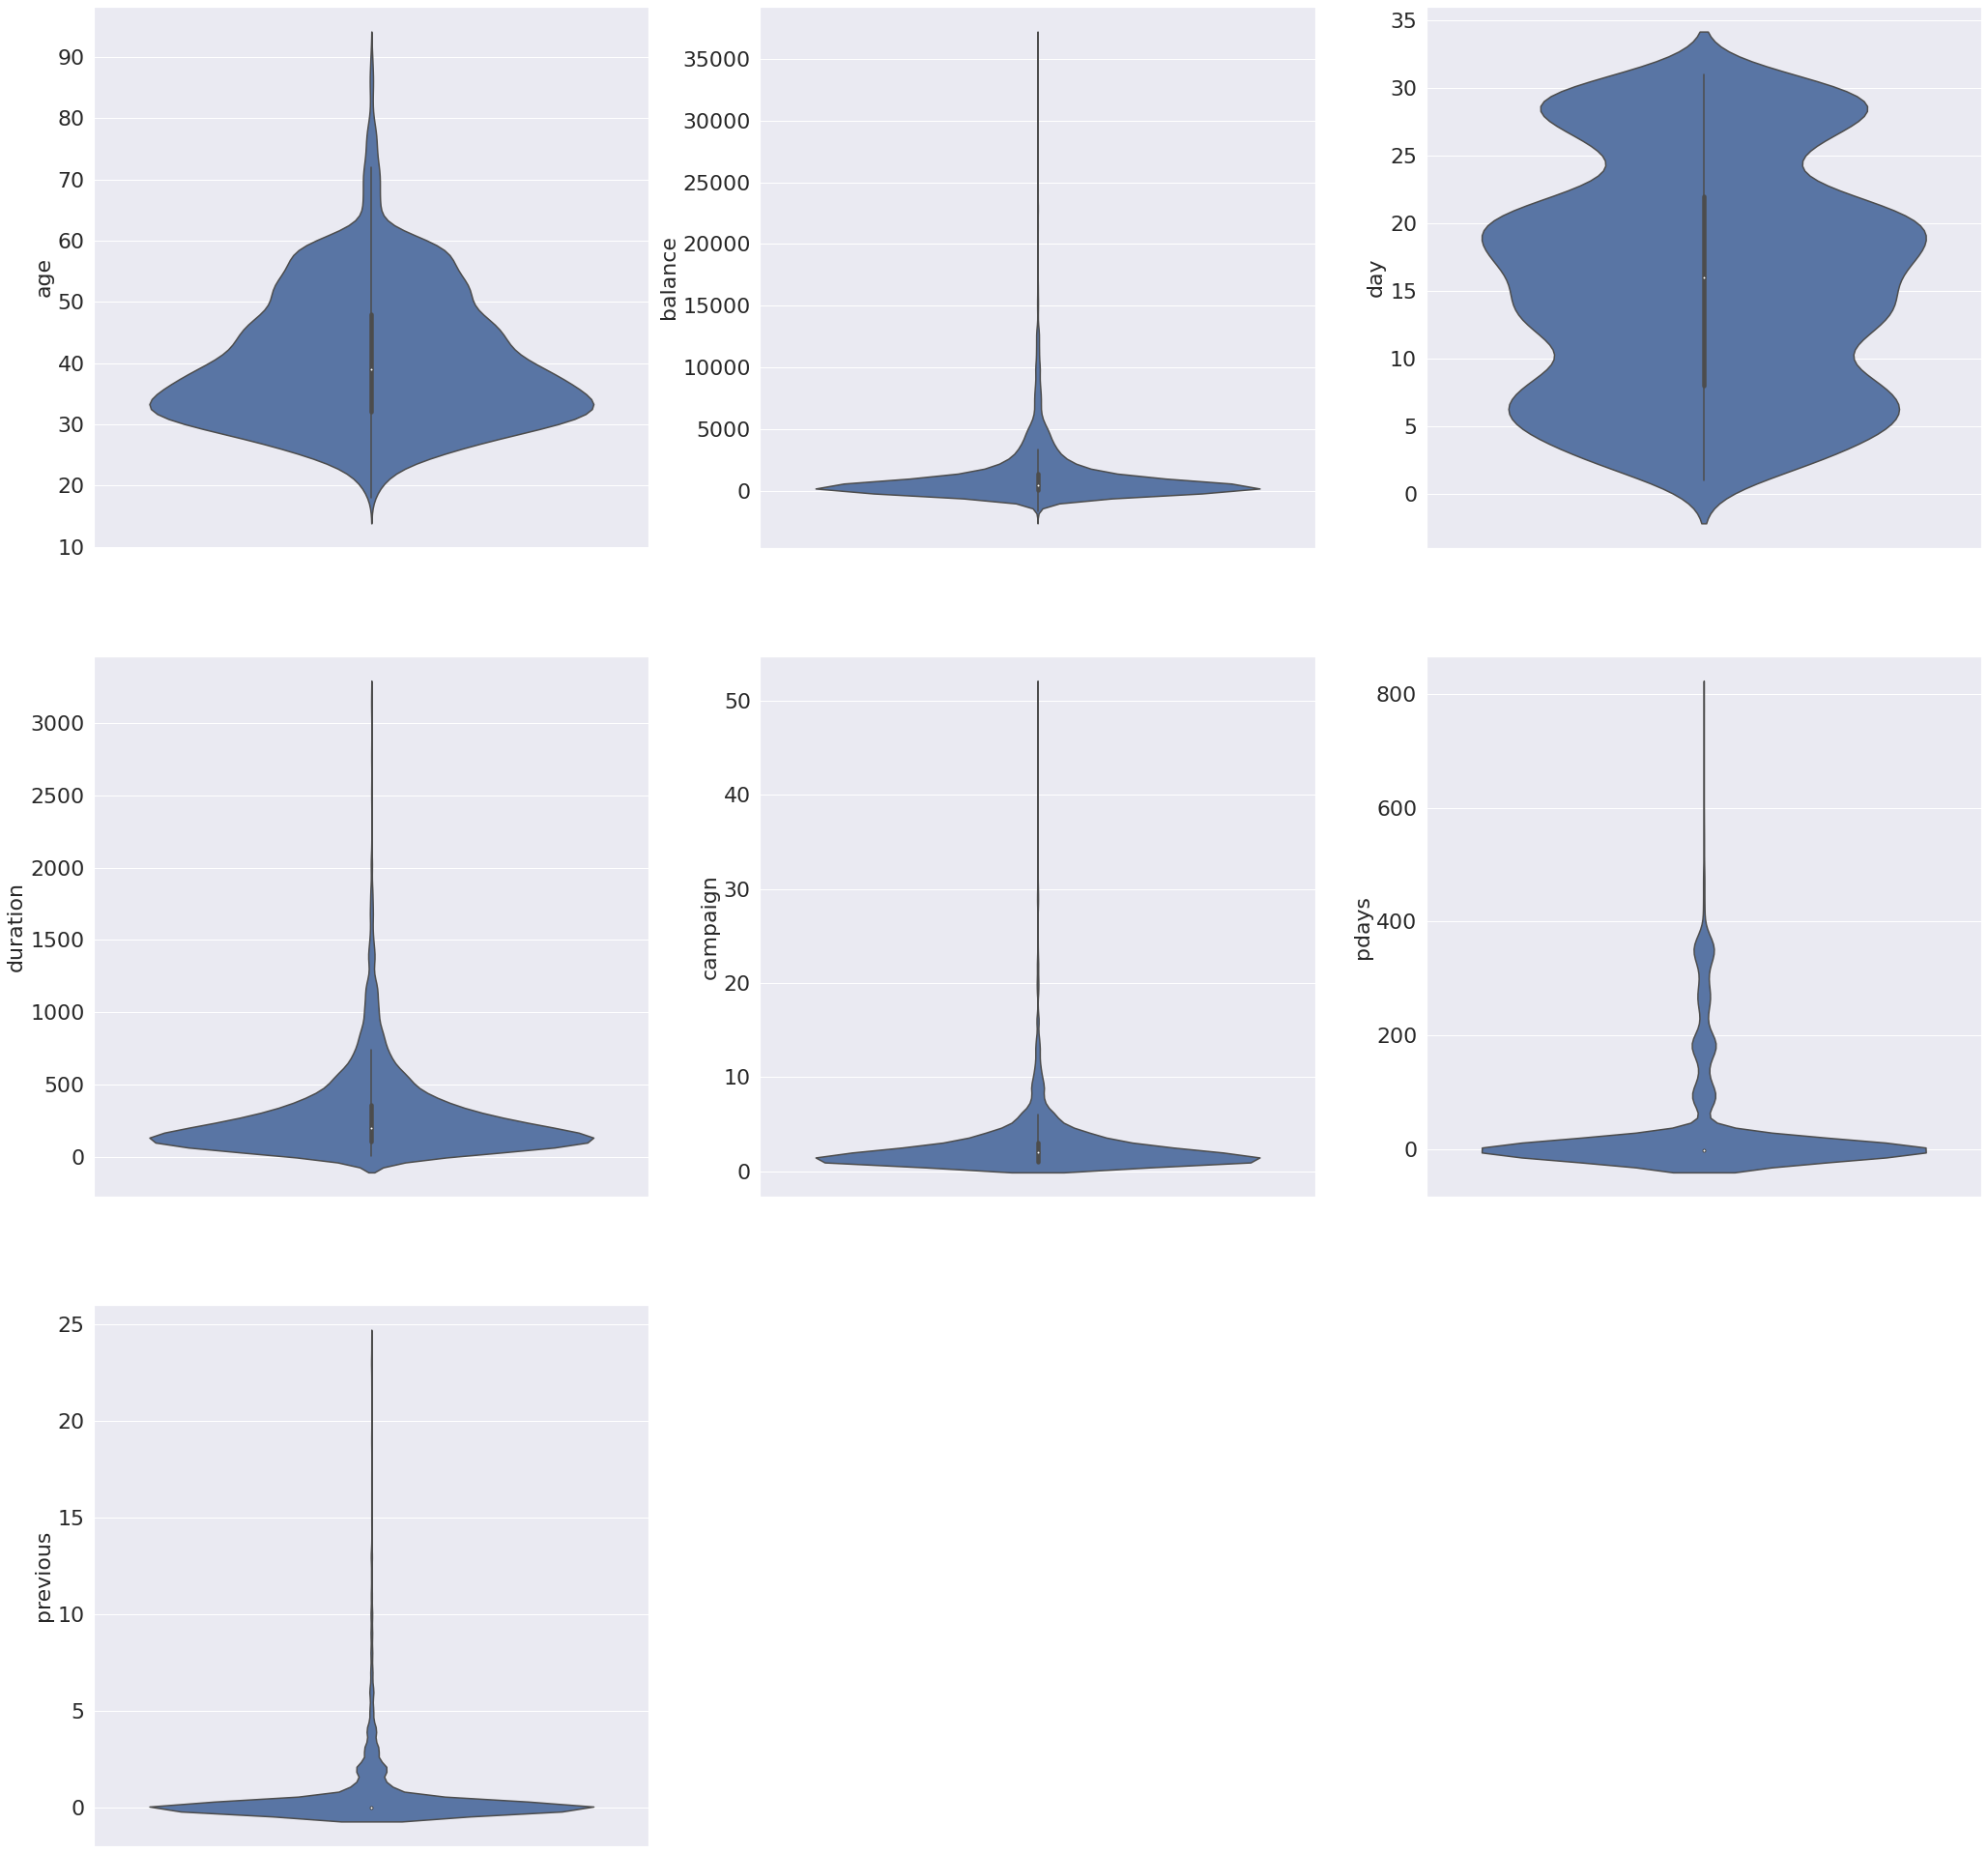

In [72]:
# Defining the overall figure size for all subplots
plt.rcParams['figure.figsize'] = (35,35)
# Setting up a grey background for the subplots
sns.set(style="darkgrid")
# Creating a figure and a set of subplots, the 'axes' stores an array of Axes objects
fig,axes = plt.subplots(ncols=3,nrows=3)

axes[-1,-1].axis('off')
axes[-1,-2].axis('off')

# Iterating through both numerical_data and axes.flat together
for i,j in zip(numerical_data,axes.flat):
  # Plotting box plot for ith column of numerical_data
  sns.violinplot(y=numerical_data[i],ax=j)
  j.set_ylabel(i,fontsize=22)
  j.tick_params(axis='y',labelsize=22)

### **Checking the relationship between numeric variables**

---



**CORRELATION COEFFICIENT**

The correlation coefficient matrix for the numerical variables is as follows: 
                age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.087478 -0.004103  0.011100 -0.012543 -0.016442  0.007559
balance   0.087478  1.000000  0.018658  0.015031 -0.016666  0.015983  0.018201
day      -0.004103  0.018658  1.000000 -0.023504  0.130109 -0.089906 -0.049376
duration  0.011100  0.015031 -0.023504  1.000000 -0.075675 -0.013490 -0.020992
campaign -0.012543 -0.016666  0.130109 -0.075675  1.000000 -0.098949 -0.054228
pdays    -0.016442  0.015983 -0.089906 -0.013490 -0.098949  1.000000  0.568733
previous  0.007559  0.018201 -0.049376 -0.020992 -0.054228  0.568733  1.000000
Visualizing the correlation matrix on a heatmap:



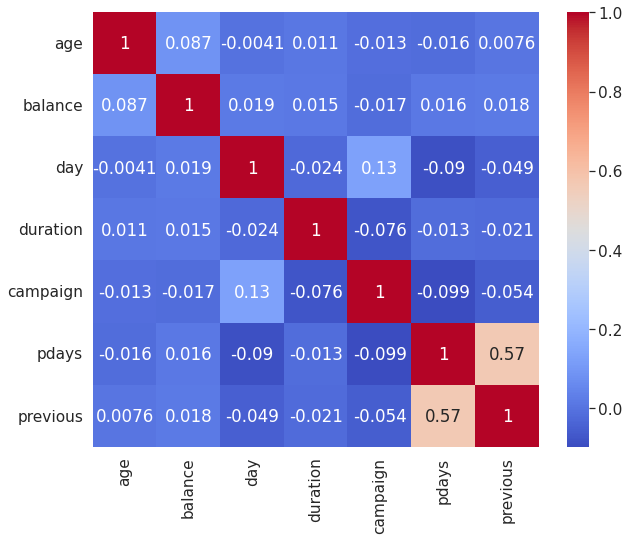

In [73]:
# checking for linear relationship between variables using correlation coefficient
# Printing the Pearson's correlation coefficient matrix
print('The correlation coefficient matrix for the numerical variables is as follows: \n',numerical_data.corr())
# Visualization the values of correlation coefficient matrix on a heatmap
print('Visualizing the correlation matrix on a heatmap:\n')
# Defining the overall figure size for all subplots
plt.rcParams['figure.figsize']=(10,8)
# Scaling up font size
sns.set(font_scale=1.4)
# Genearting heatmap for correlation coefficient matrix
sns.heatmap(numerical_data.corr(),cmap='coolwarm',annot=True)

**SCATTER PLOTS**

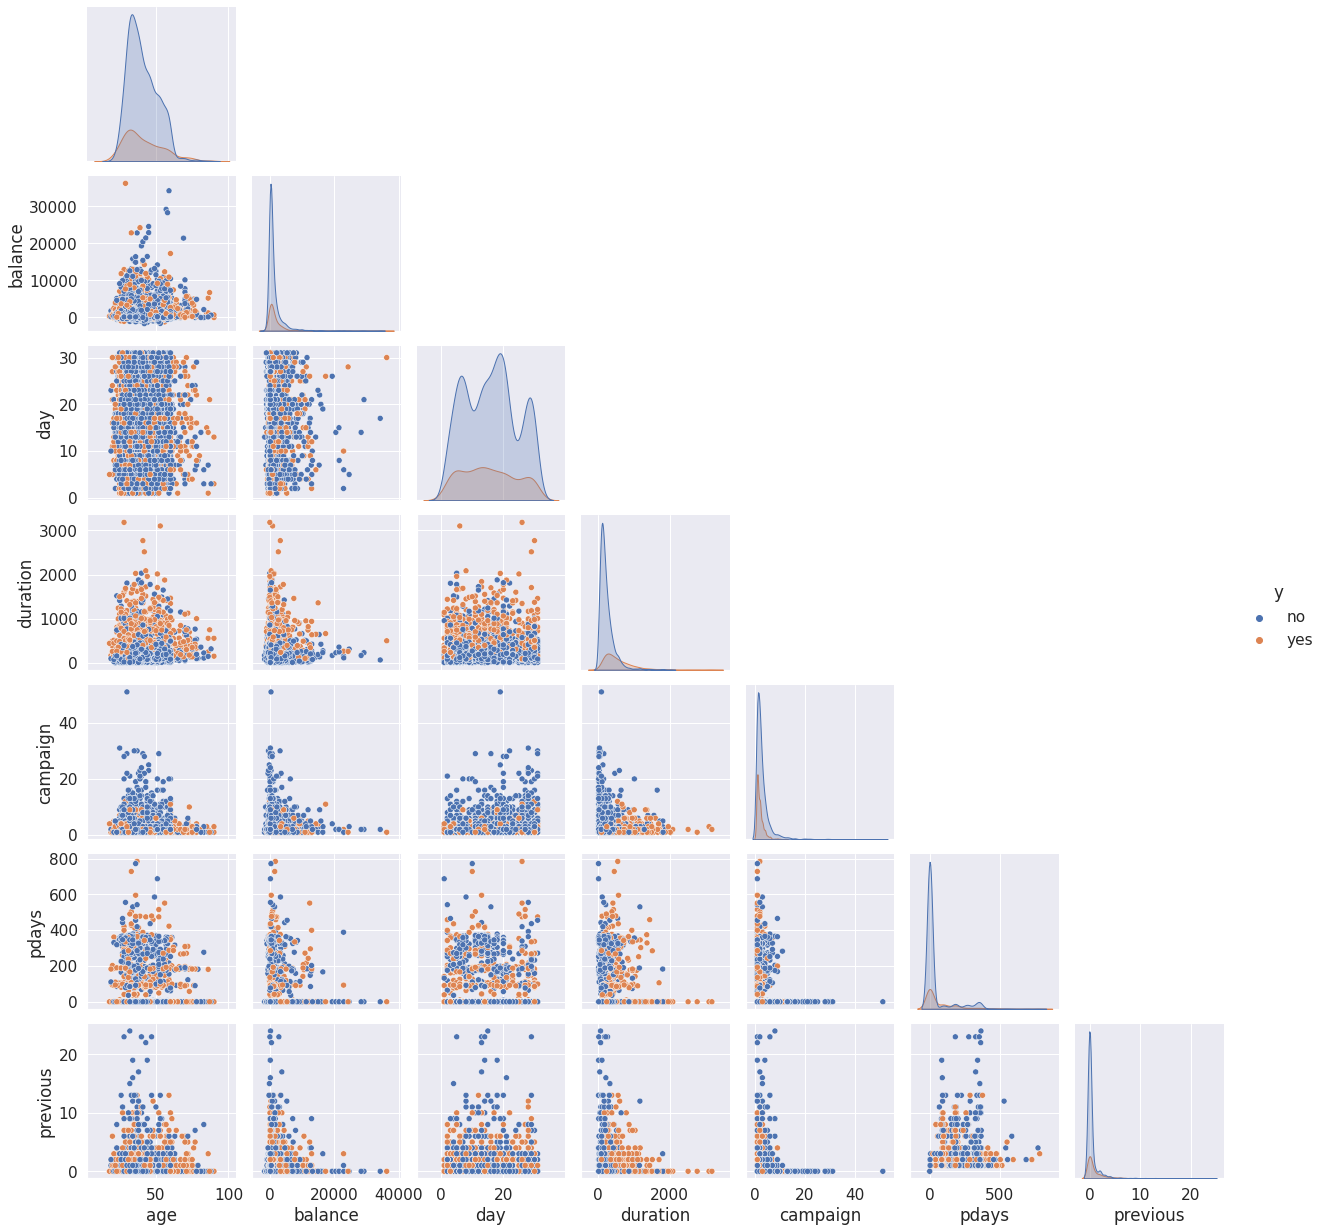

In [74]:
# verifying the relationship between numerical variables using scatterplots
# Plotting scatter plots between numerical datas to see the realtionship between them and distinguishing the output variable categories by blue (for 'No') and orange colour (for 'Yes')
sns.pairplot(data=df,hue='y',corner=True) 
# It is observed that there is a lot of overlapping in the data points, hence logistic regression model will not be useful as it is a linear classification model. Cannot divide by straight line. We need to use non-linear classification models like Decision Trees, KNN, Random Forest, etc

### **Checking the relationship of each numerical variable with output variable**

**VIOLIN PLOTS WITH OUTPUT CATEGORY**

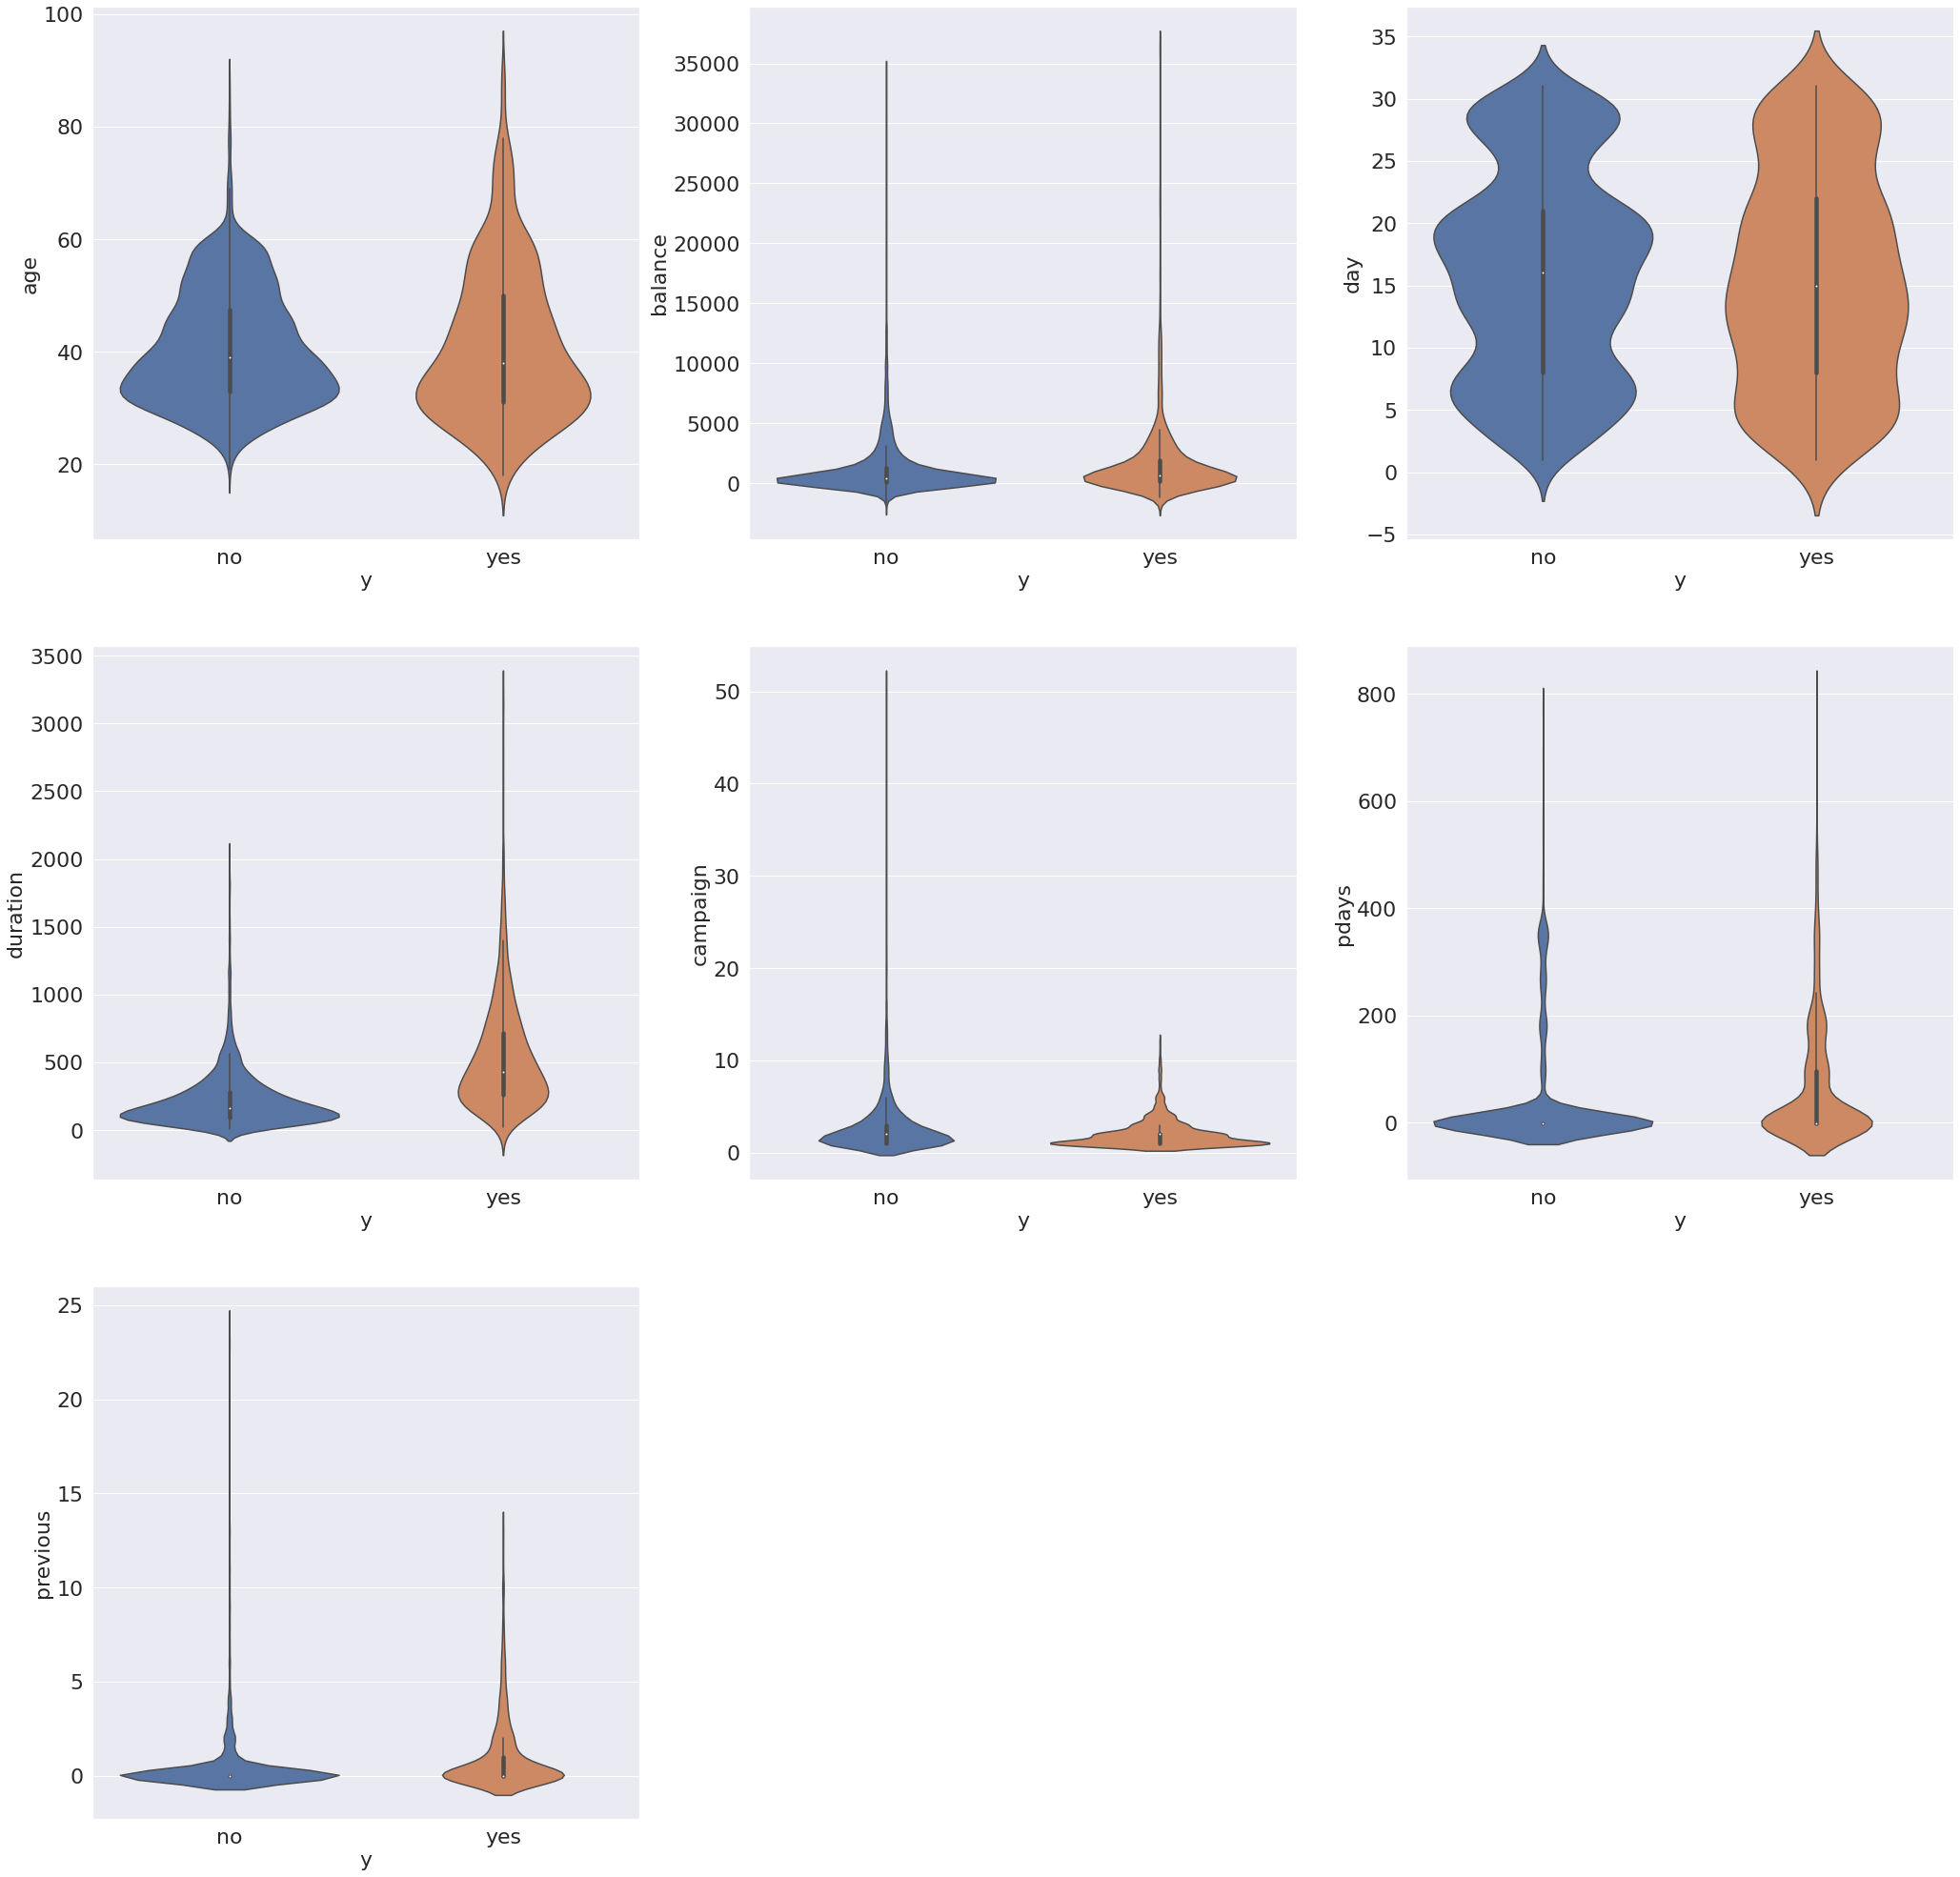

In [75]:
# Defining the overall figure size for all subplots
plt.rcParams['figure.figsize'] = (35,35)
# Setting up a grey background for the subplots
sns.set(style="darkgrid")
# Creating a figure and a set of subplots, the 'axes' stores an array of Axes objects
fig,axes = plt.subplots(ncols=3,nrows=3)

axes[-1,-1].axis('off')
axes[-1,-2].axis('off')
# Iterating through both numerical_data and axes.flat together
for i,j in zip(numerical_data,axes.flat):
  # Plotting vilon plot for ith column of numerical_data
  sns.violinplot(x=y['y'],y=numerical_data[i],ax=j)
  j.set_xlabel('y',fontsize=22)
  j.set_ylabel(i,fontsize=22)
  j.tick_params(labelsize=22)
  

**BOX PLOTS WITH OUTPUT CATEGORY**

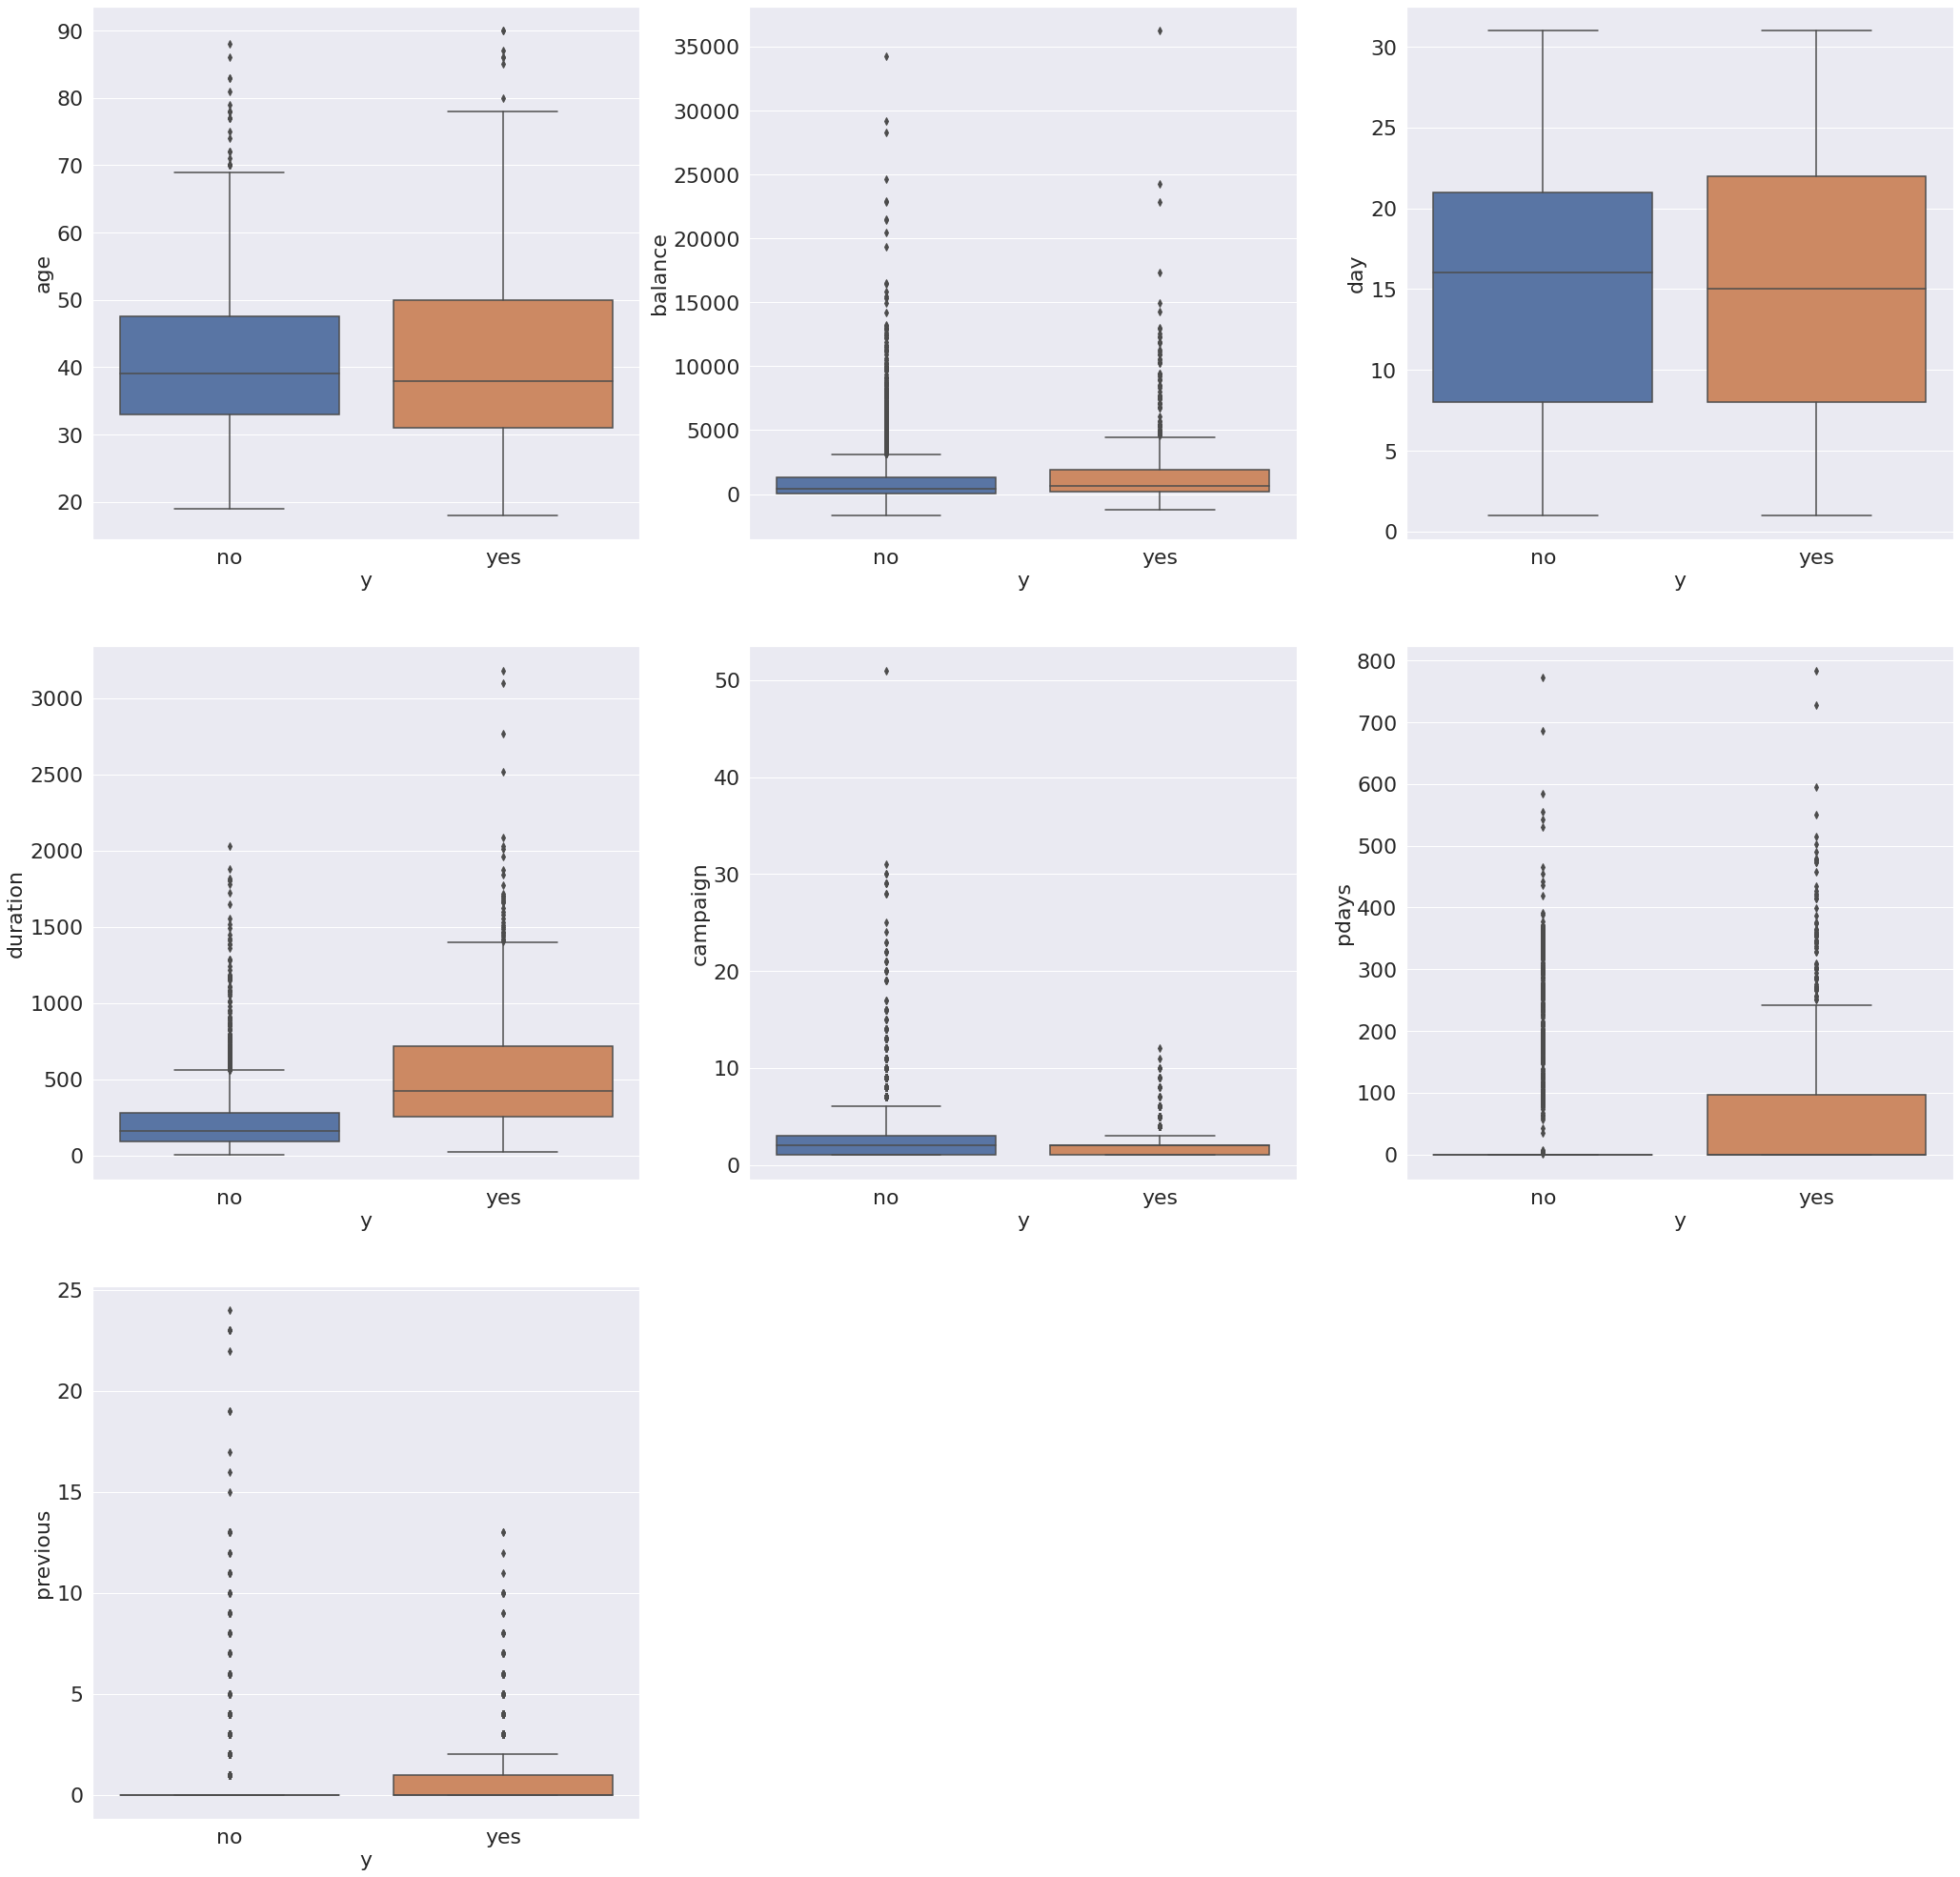

In [76]:
# Defining the overall figure size for all subplots
plt.rcParams['figure.figsize'] = (35,35)
# Setting up a grey background for the subplots
sns.set(style="darkgrid")
# Creating a figure and a set of subplots, the 'axes' stores an array of Axes objects
fig,axes = plt.subplots(ncols=3,nrows=3)
axes[-1,-1].axis('off')
axes[-1,-2].axis('off')

# Iterating through both numerical_data and axes.flat together
for i,j in zip(numerical_data,axes.flat):
  # Plotting box plot for ith column of numerical_data
  sns.boxplot(x=y['y'],y=numerical_data[i],ax=j)
  j.set_xlabel('y',fontsize=22)
  j.set_ylabel(i,fontsize=22)
  j.tick_params(labelsize=22)

**STRIP PLOTS WITH OUTPUT CATEGORY**

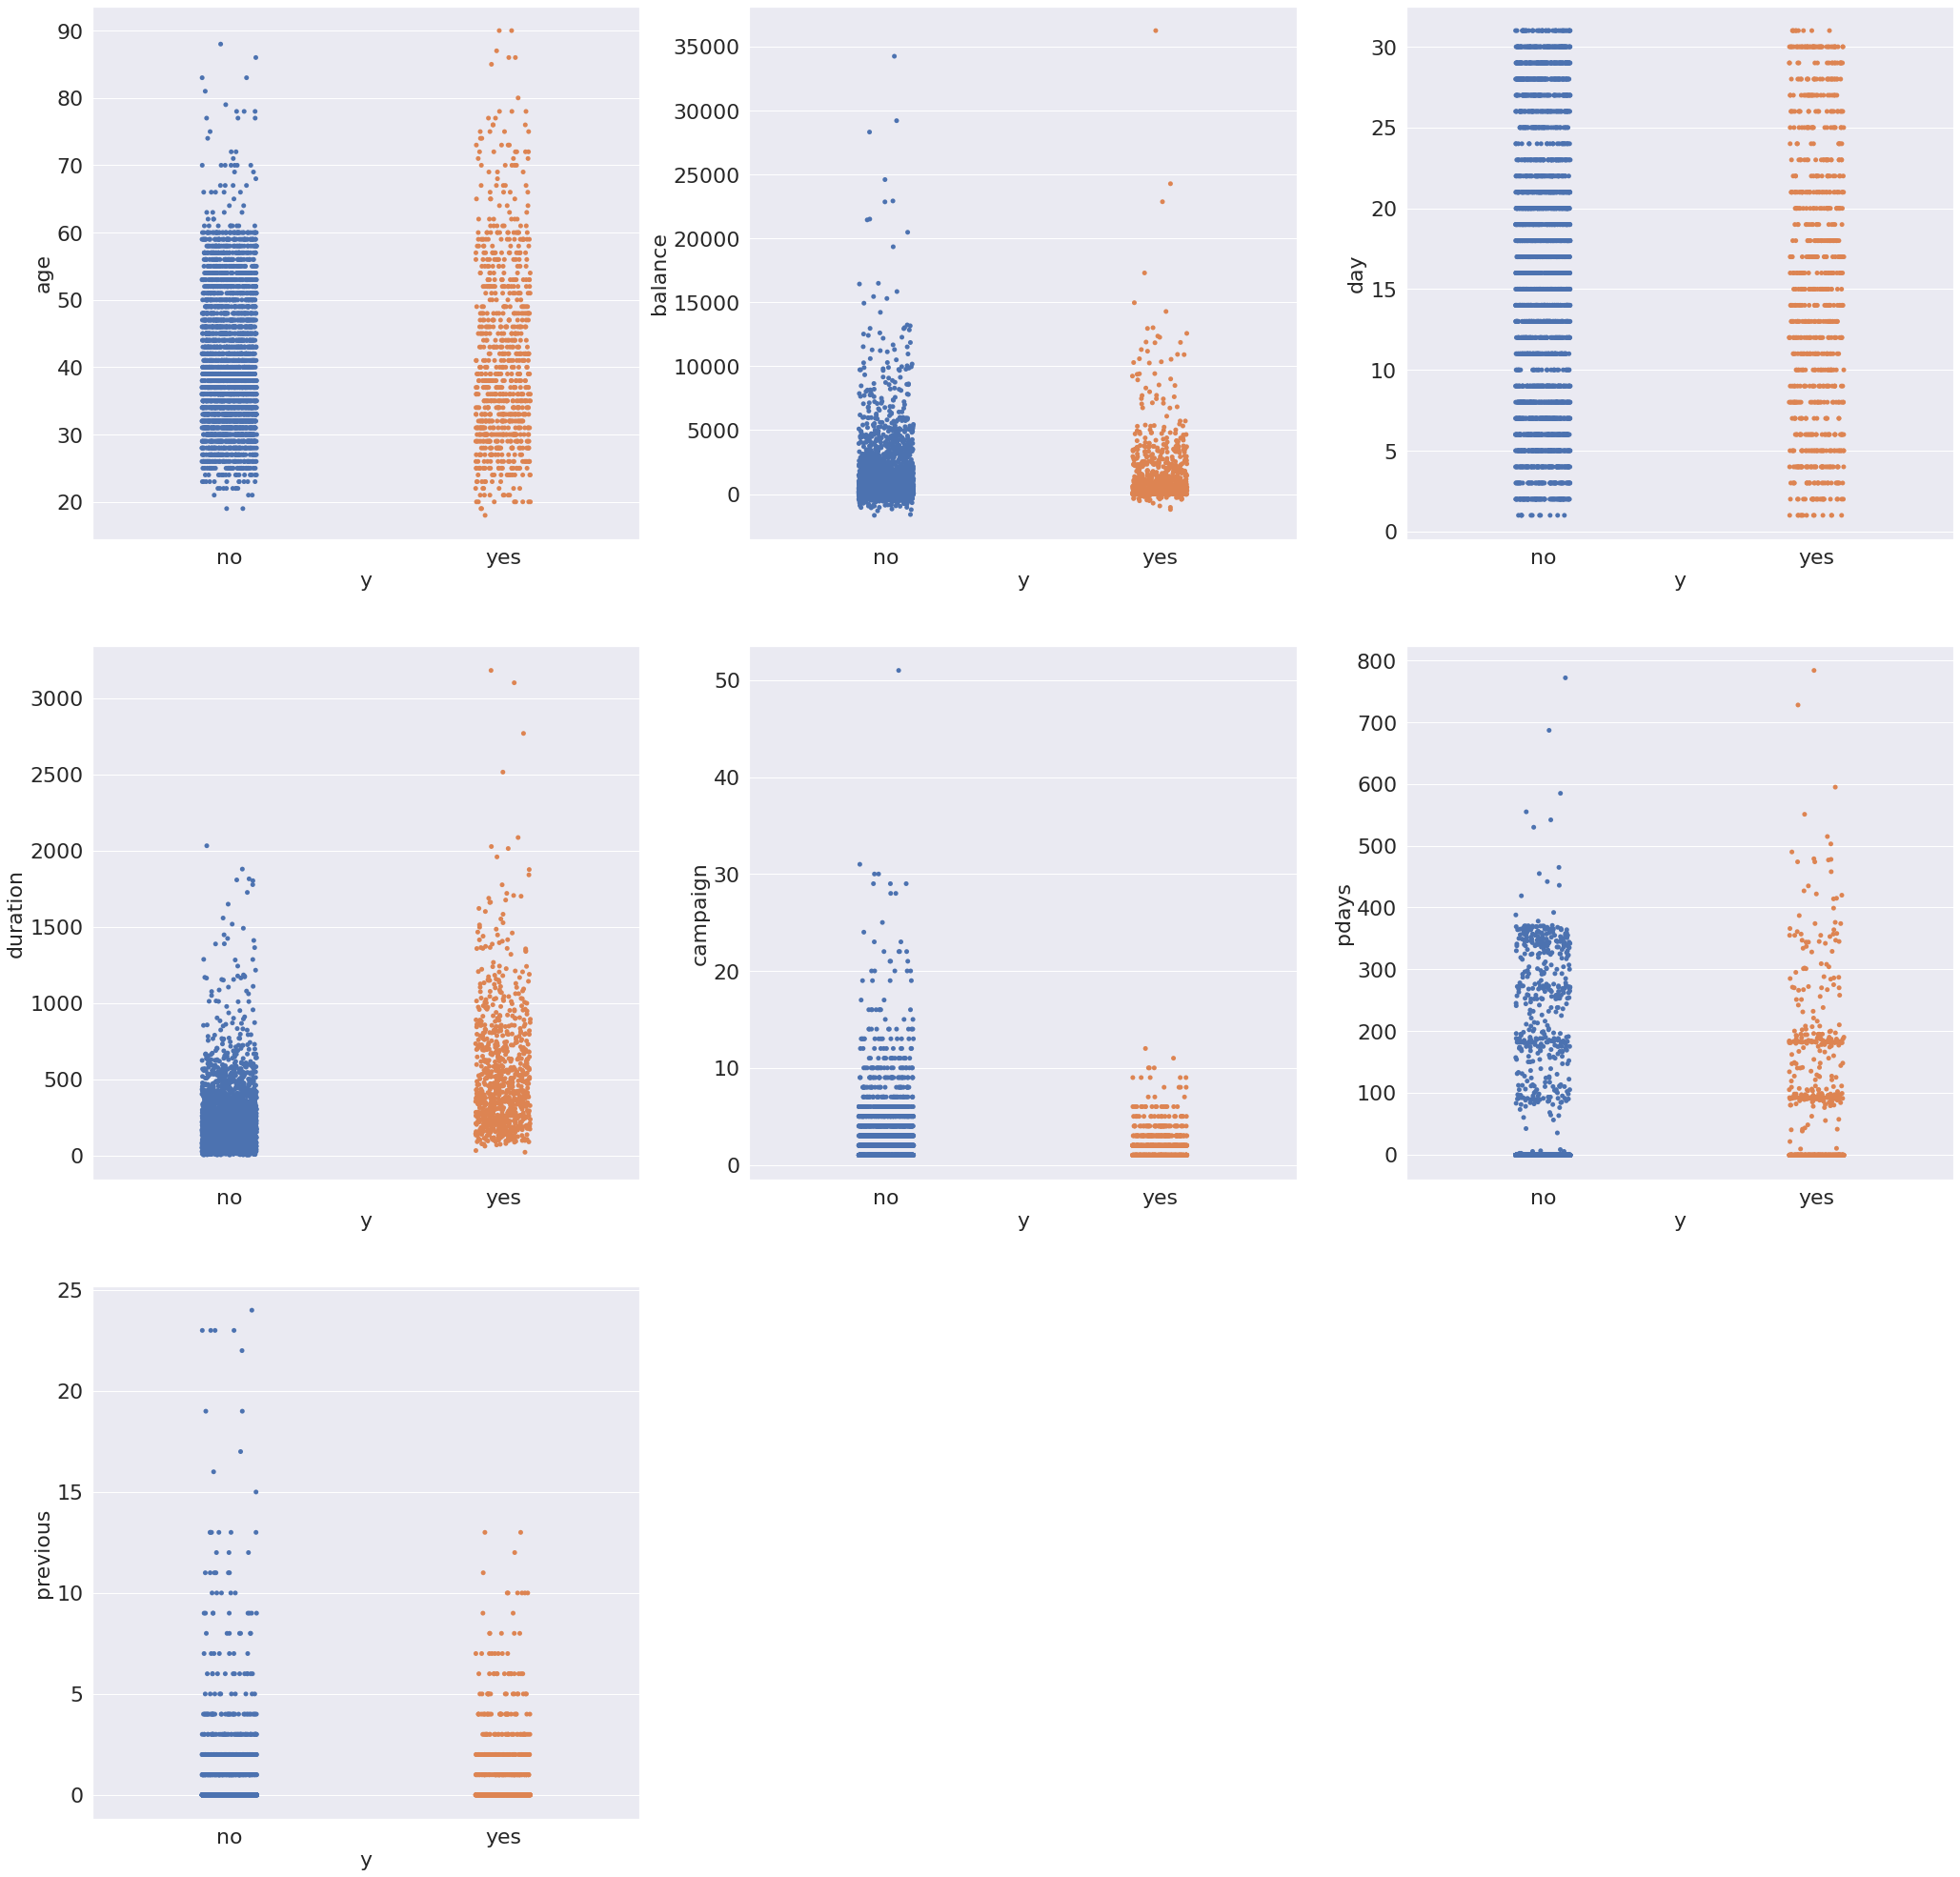

In [77]:
# Defining the overall figure size for all subplots
plt.rcParams['figure.figsize'] = (35,35)
# Setting up a grey background for the subplots
sns.set(style="darkgrid")
# Creating a figure and a set of subplots, the 'axes' stores an array of Axes objects
fig,axes = plt.subplots(ncols=3,nrows=3)

axes[-1,-1].axis('off')
axes[-1,-2].axis('off')
# Iterating through both numerical_data and axes.flat together
for i,j in zip(numerical_data,axes.flat):
  # Plotting box plot for ith column of numerical_data
  sns.stripplot(x=y['y'],y=numerical_data[i],ax=j)
  j.set_xlabel('y',fontsize=22)
  j.set_ylabel(i,fontsize=22)
  j.tick_params(labelsize=22)

## **(B) Categorical Data**

### **Individual Variable Analysis**

---





**STATISTICAL SUMMARY - MODE**

In [78]:
# Printing shape and statistical summary (mode) for the categorical data of input features
print("Statistical Summary of the categorical features in the dataset:\n")
print('Shape =',categorical_data.shape)
print('The mode values are as follows:\n')
# Printing mode for each categorical features
print(categorical_data.mode()) 

print('--------------------------------------------------------------------------')
print('--------------------------------------------------------------------------')
# Printing shape and statistical summary (mode) for the output feature
print("Statistical Summary of the output variable in the dataset:\n")
print('Shape =',y.shape)
# Printing mode for output feature
print('The mode value is as follows:\n')
print(y.mode()) 

Statistical Summary of the categorical features in the dataset:

Shape = (4000, 8)
The mode values are as follows:

          job  marital  education default housing loan   contact poutcome
0  management  married  secondary      no     yes   no  cellular  unknown
--------------------------------------------------------------------------
--------------------------------------------------------------------------
Statistical Summary of the output variable in the dataset:

Shape = (4000, 1)
The mode value is as follows:

    y
0  no


**COUNT PLOTS or BAR PLOTS**

--------------------------------------------------------------------------
--------------------------------------------------------------------------


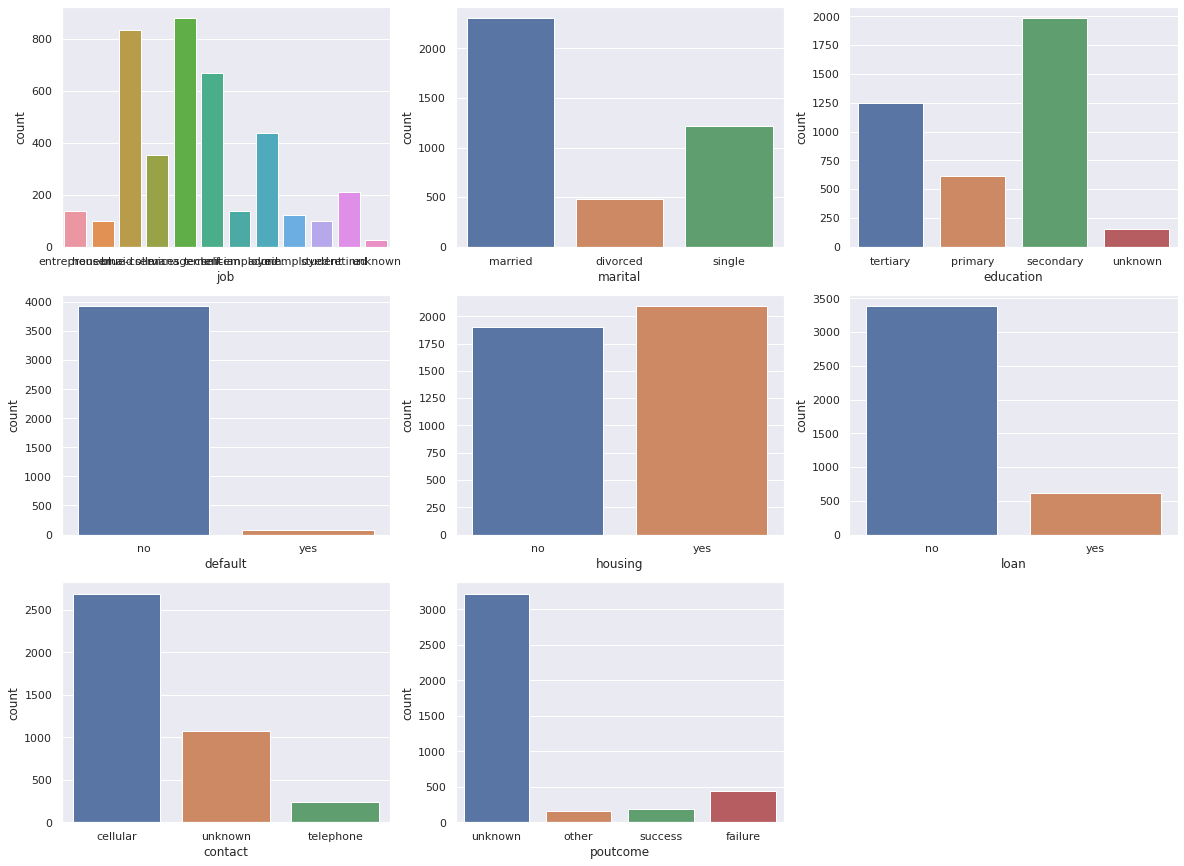

In [79]:
# Defining the overall figure size for all subplots
plt.rcParams['figure.figsize'] = (20, 15)
# Setting up a grey background for the subplots
sns.set(style="darkgrid")
# Creating a figure and a set of subplots, the 'axes' stores an array of Axes objects
fig, axes = plt.subplots(nrows=3,ncols=3)
# Hiding the last subplot because we have only 8 subplots to be plotted
axes[-1, -1].axis('off')
# Iterating through both categorical_data and axes.flat together
for i,j in zip(axes.flat,categorical_data):
  # Plotting count plot for ith column of categorical_data, to get distribution among various categories
  sns.countplot(x=categorical_data[j],ax=i) 

print('--------------------------------------------------------------------------')
print('--------------------------------------------------------------------------')


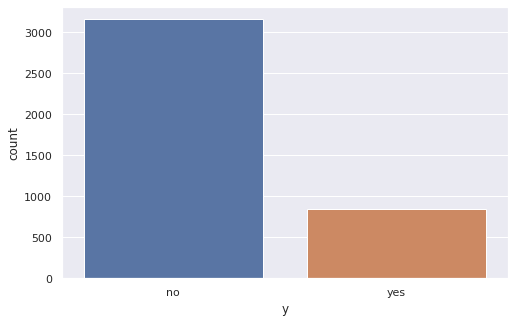

In [80]:
# For output variable
# Defining the figure size for the plot
plt.rcParams['figure.figsize'] = (8,5)
# Plotting count plot for the output feature
sns.countplot(x=y['y'])

**PROPORTIONS OF EACH CATEGORY**

In [81]:
# Printing the proportions categories for each categorical input feature
for i in categorical_data:
  print(categorical_data[i].value_counts(normalize=True),'\n')

print('--------------------------------------------------------------------------')
print('--------------------------------------------------------------------------')
# Printing the proportions cateories for output feature
print(y['y'].value_counts(normalize=True),'\n')

management       0.21950
blue-collar      0.20875
technician       0.16650
admin.           0.10975
services         0.08775
retired          0.05275
self-employed    0.03475
entrepreneur     0.03425
unemployed       0.03050
student          0.02500
housemaid        0.02425
unknown          0.00625
Name: job, dtype: float64 

married     0.5755
single      0.3030
divorced    0.1215
Name: marital, dtype: float64 

secondary    0.49575
tertiary     0.31200
primary      0.15450
unknown      0.03775
Name: education, dtype: float64 

no     0.9825
yes    0.0175
Name: default, dtype: float64 

yes    0.5235
no     0.4765
Name: housing, dtype: float64 

no     0.84625
yes    0.15375
Name: loan, dtype: float64 

cellular     0.67225
unknown      0.26900
telephone    0.05875
Name: contact, dtype: float64 

unknown    0.80425
failure    0.10975
success    0.04725
other      0.03875
Name: poutcome, dtype: float64 

--------------------------------------------------------------------------
-------

### **Relationship between categoric variables**

---



**TWO-WAY FREQUENCY TABLES**





In [82]:
# Printing Two-way frequency tables between each combination of categorical input feature
for i in range(len(categorical_data.columns)-1):
  for j in range(i+1,len(categorical_data.columns)):
    print(pd.crosstab(index=categorical_data.iloc[:,i], columns=categorical_data.iloc[:,j]),'\n')

print('--------------------------------------------------------------------------')
print('--------------------------------------------------------------------------')
# Printing Two-way frequency tables between each categorical input feature and output feature
for i in range(len(categorical_data.columns)):
  print(pd.crosstab(index=categorical_data.iloc[:,i], columns=y['y']),'\n')

marital        divorced  married  single
job                                     
admin.               65      236     138
blue-collar          76      576     183
entrepreneur         20       90      27
housemaid            16       69      12
management          107      477     294
retired              49      155       7
self-employed        15       70      54
services             40      191     120
student               0        8      92
technician           82      349     235
unemployed           16       64      42
unknown               0       17       8 

education      primary  secondary  tertiary  unknown
job                                                 
admin.               8        375        40       16
blue-collar        334        453        12       36
entrepreneur        19         57        58        3
housemaid           52         28        15        2
management          28         91       741       18
retired             83         81        37       10


**COUNT/BAR PLOTS WITH 2 CATEGORICAL VARIABLES**

--------------------------------------------------------------------------
--------------------------------------------------------------------------


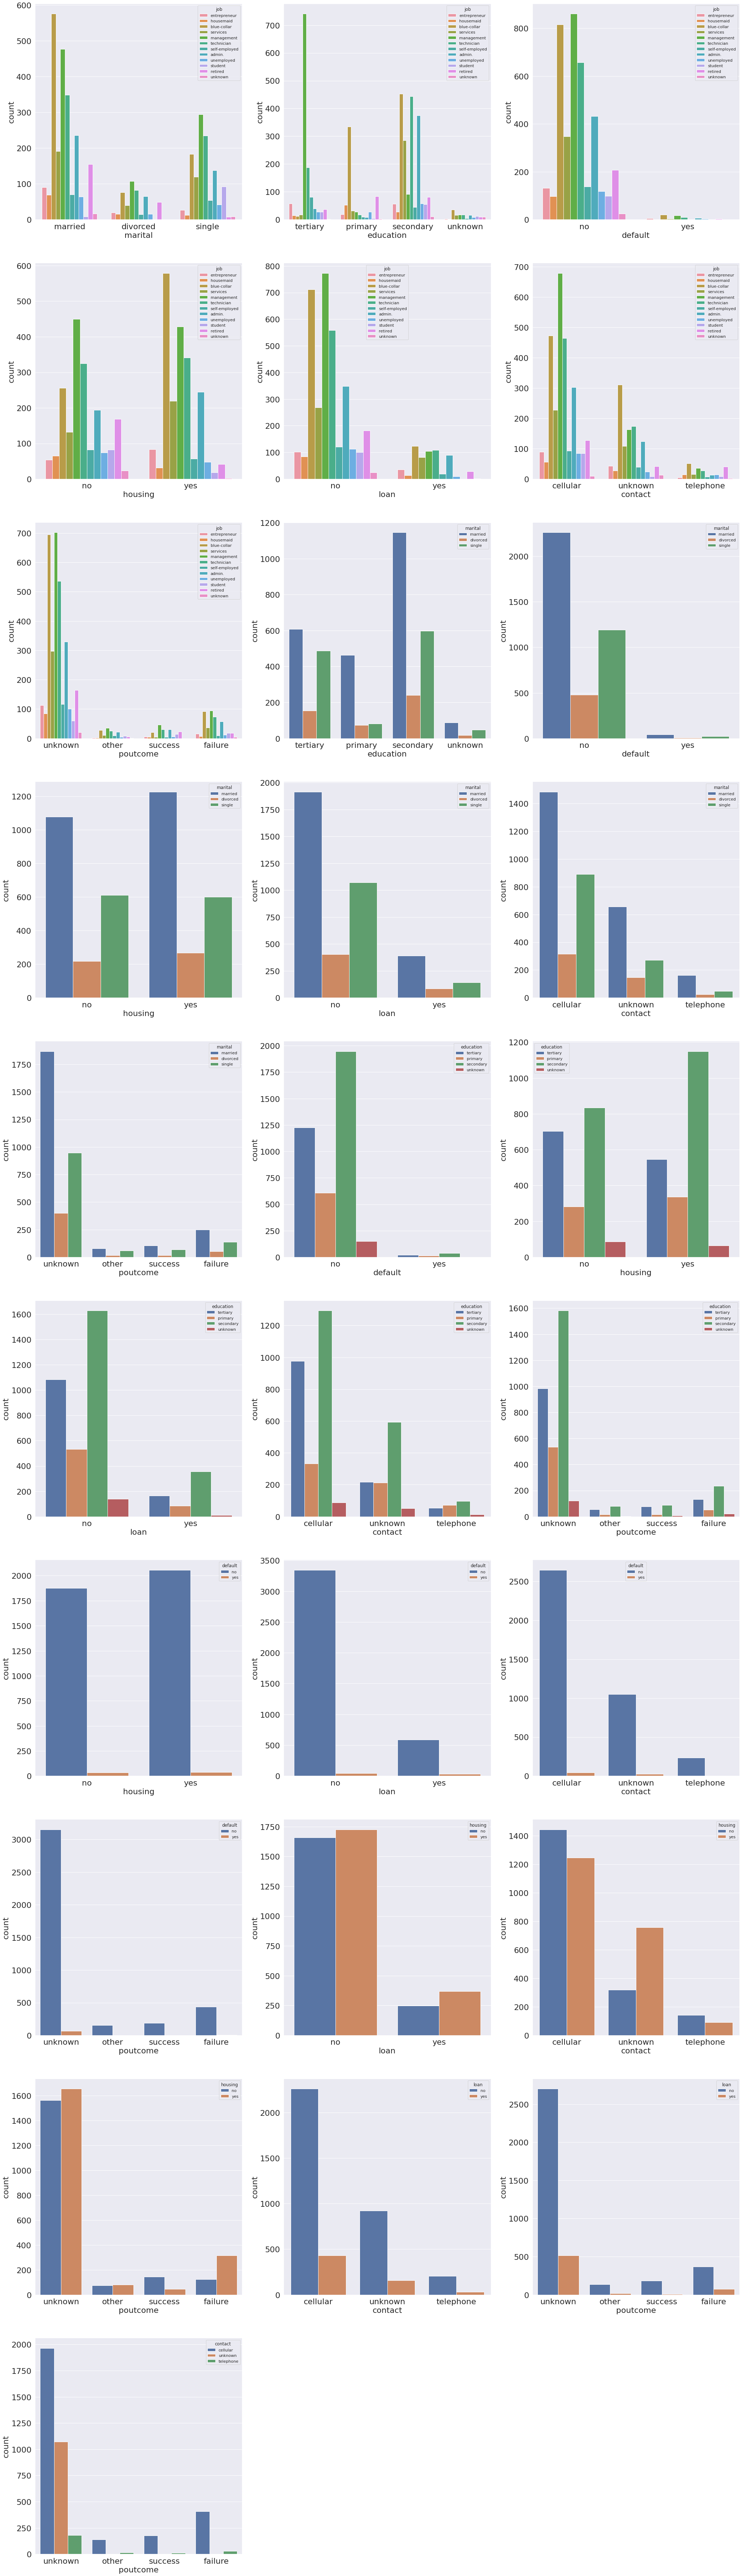

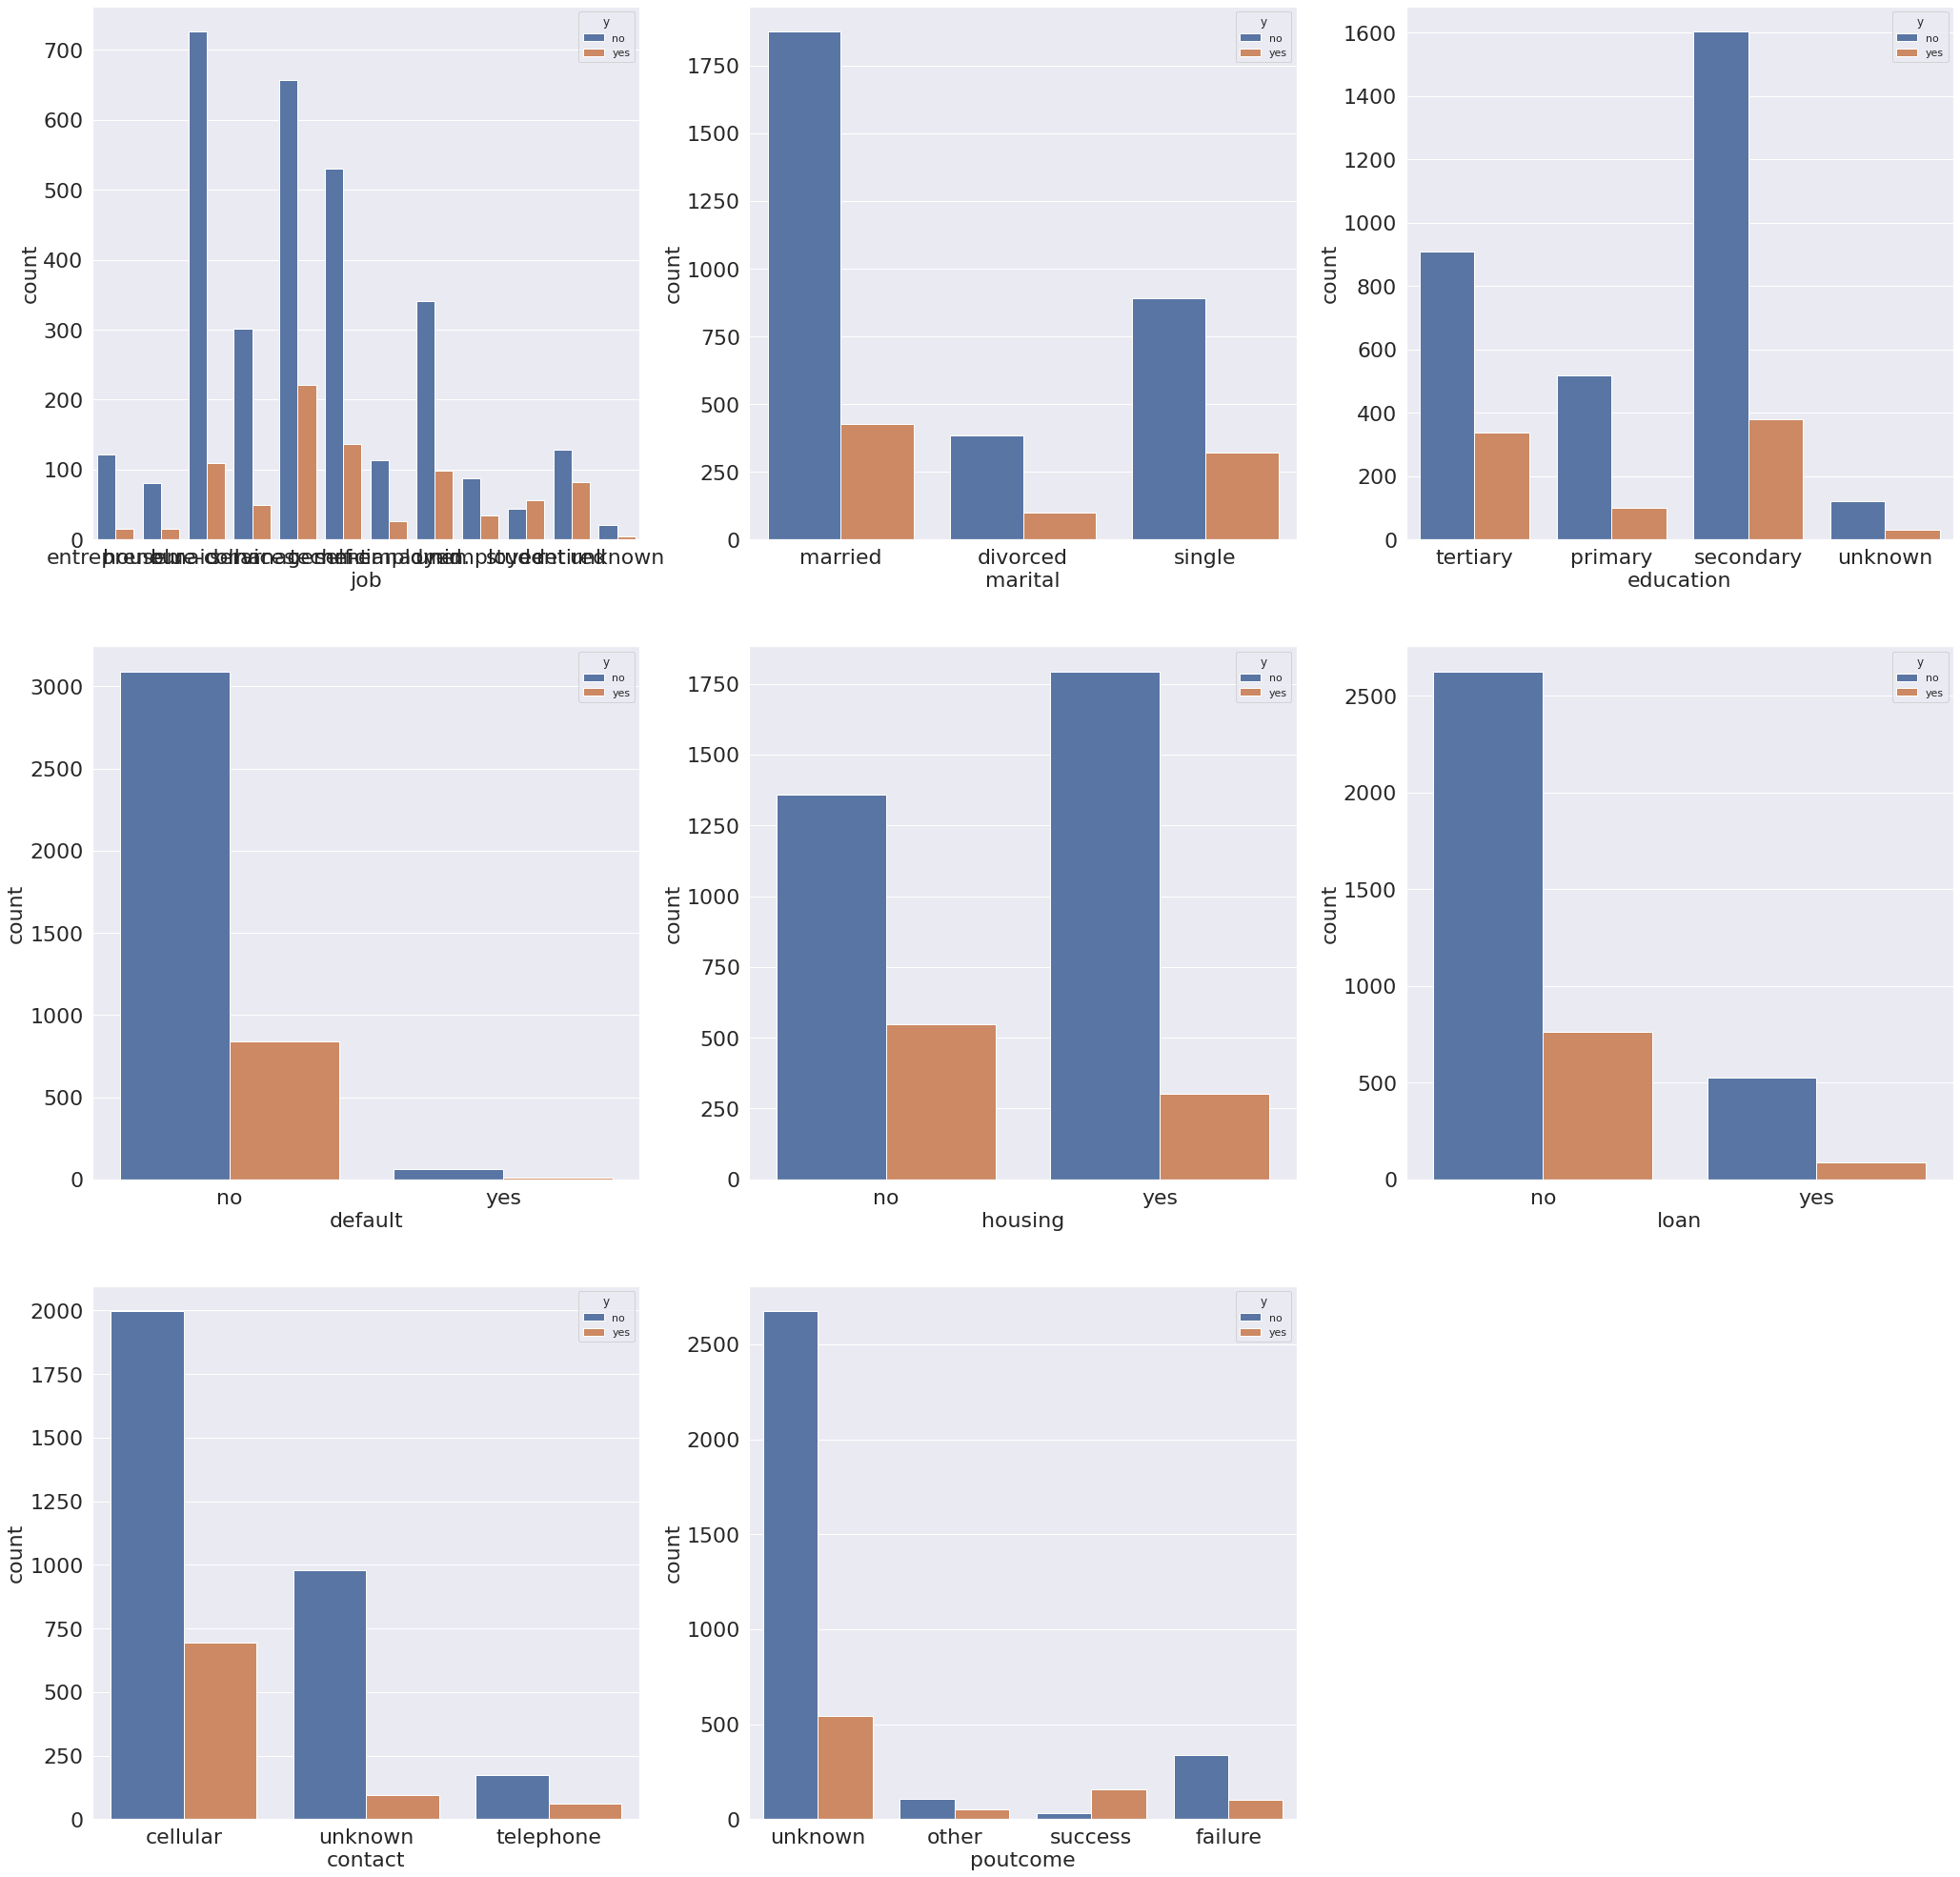

In [83]:
# Plotting Bar plots between each combination of categorical input feature
# Defining the overall figure size for all subplots
plt.rcParams['figure.figsize']=(35,130)
# Setting up a grey background for the subplots
sns.set(style="darkgrid")
# Creating a figure and a set of subplots, the 'axes' stores an array of Axes objects
fig, axes = plt.subplots(nrows=10,ncols=3)

# Hiding the last two subplot because we have 28 subplots to be plotted and last two will remain blank
axes[-1, -1].axis('off')
axes[-1, -2].axis('off')
new_axes = axes.flat
# 'k' is the counter to iterate through new_axes
k=0
for i in range(len(categorical_data.columns)-1):
  for j in range(i+1,len(categorical_data.columns)):
    # Plotting count plot 
    sns.countplot(x=categorical_data.iloc[:,j],hue=categorical_data.iloc[:,i],ax=new_axes[k])
    # Changing font size for x-axis label
    new_axes[k].set_xlabel(categorical_data.columns[j],fontsize=22)
    # Changing font size for y-axis label
    new_axes[k].set_ylabel('count',fontsize=22)
    # Changing font size for axes markings
    new_axes[k].tick_params(labelsize=22)
    # Incrementing the counter
    k = k + 1

print('--------------------------------------------------------------------------')
print('--------------------------------------------------------------------------')
# Plotting Bar plots between each categorical input feature and output feature
# Defining the overall figure size for all subplots
plt.rcParams['figure.figsize']=(35,35)
# Setting up a grey background for the subplots
sns.set(style="darkgrid")
# Creating a figure and a set of subplots, the 'axes' stores an array of Axes objects
fig, axes = plt.subplots(nrows=3,ncols=3)

axes[-1, -1].axis('off')
new_axes = axes.flat

for i in range(len(categorical_data.columns)):
  # Plotting count plot 
  sns.countplot(x=categorical_data.iloc[:,i],hue=y['y'],ax=new_axes[i])
  # Changing font size for x-axis label
  new_axes[i].set_xlabel(categorical_data.columns[i],fontsize=22)
  # Changing font size for y-axis label
  new_axes[i].set_ylabel('count',fontsize=22)
  # Changing font size for axes markings
  new_axes[i].tick_params(labelsize=22)

## **(C) Numerical and Categorical Data**

### Checking the relationship between categorical and numerical data

---



**BAR PLOTS**

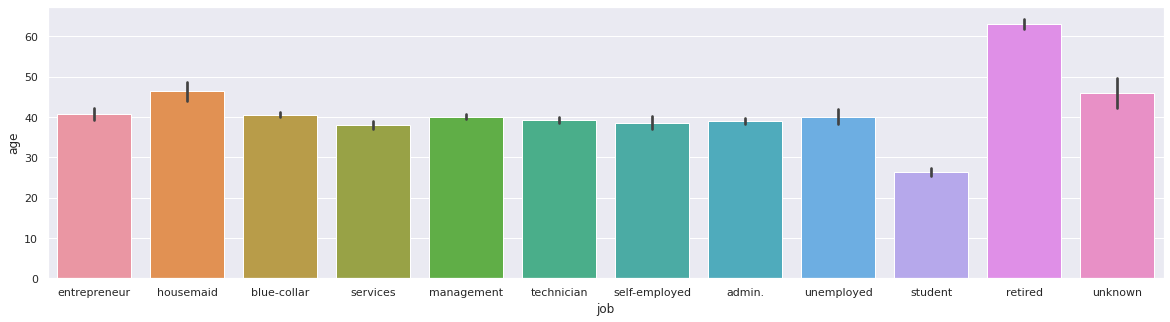

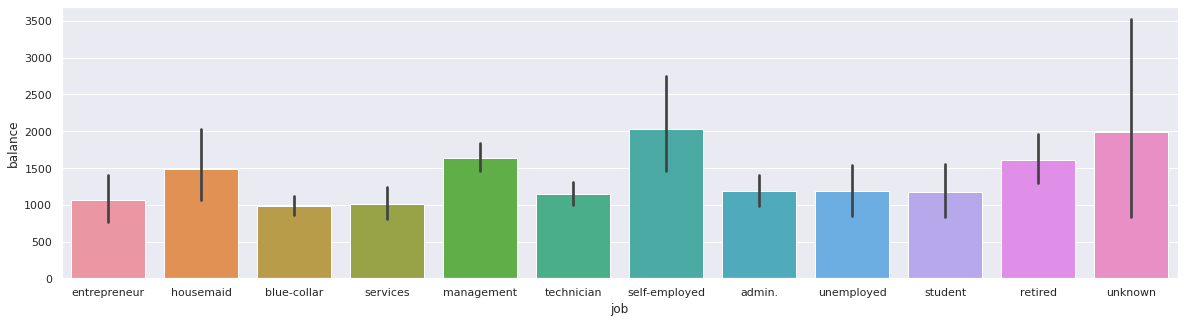

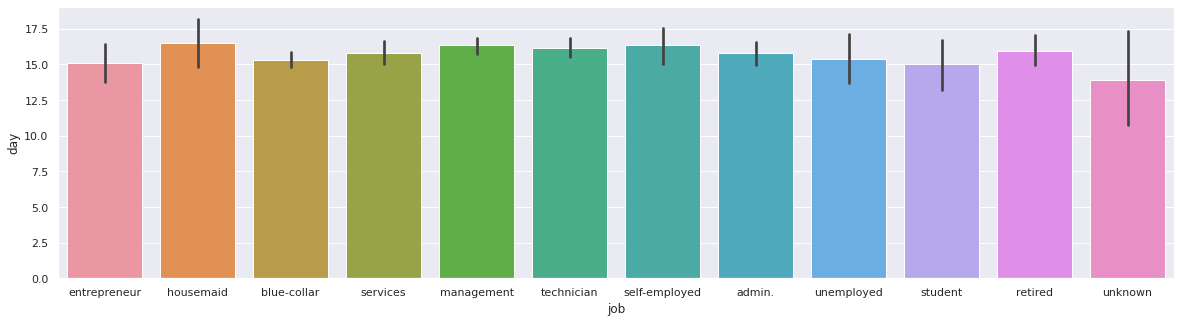

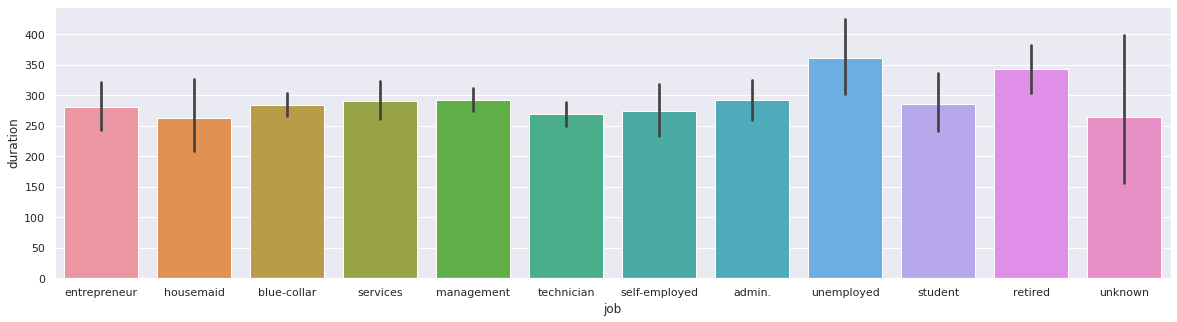

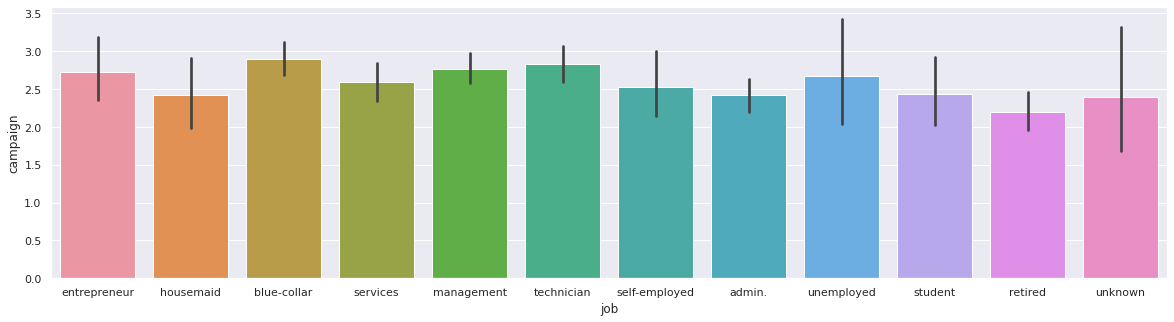

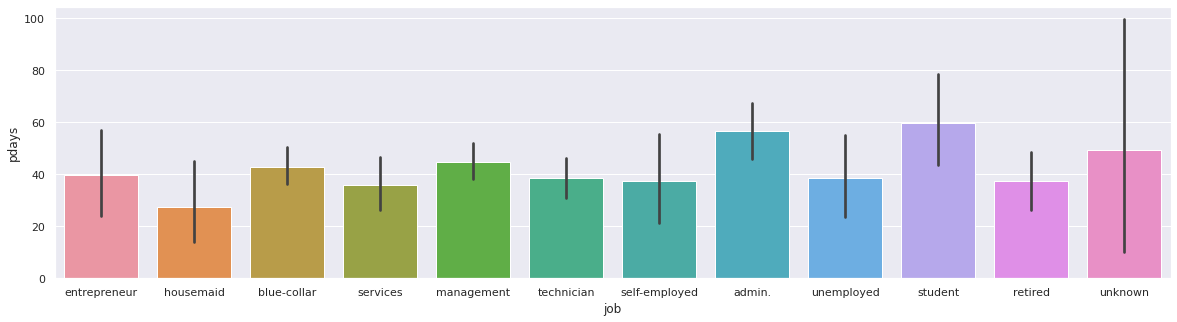

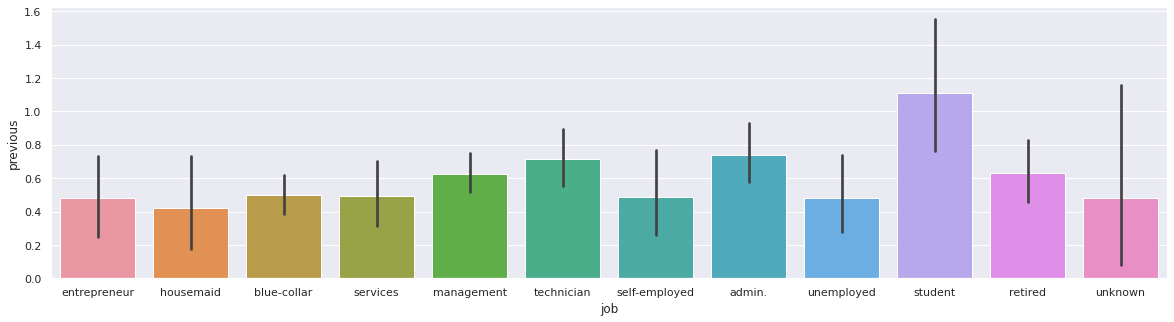

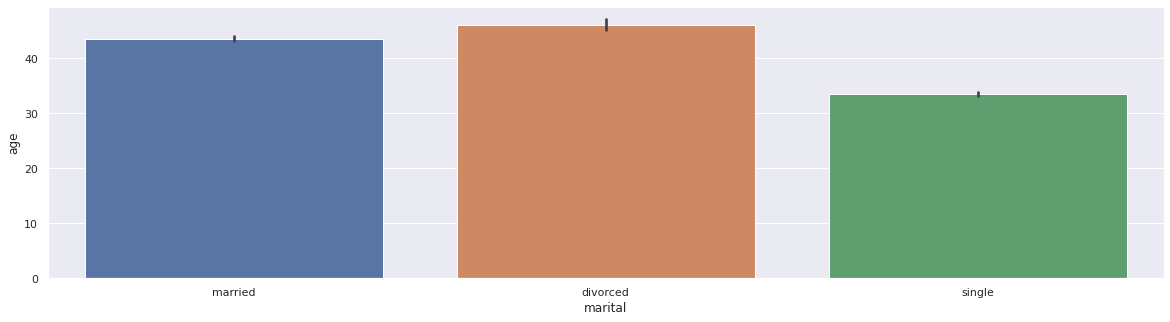

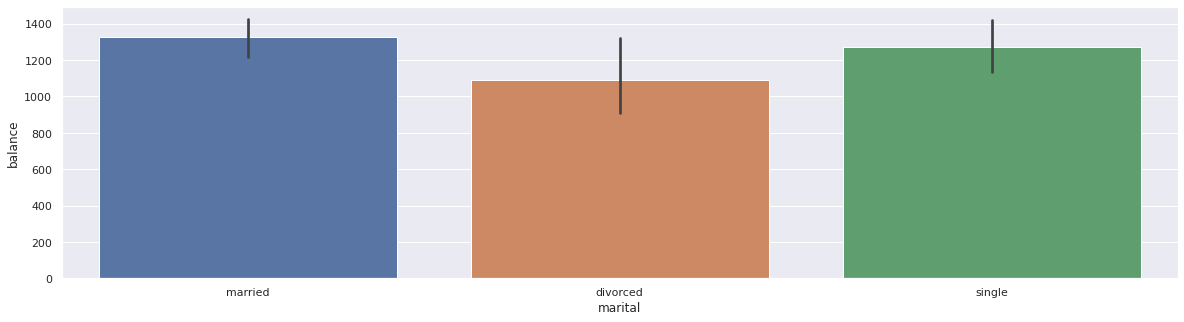

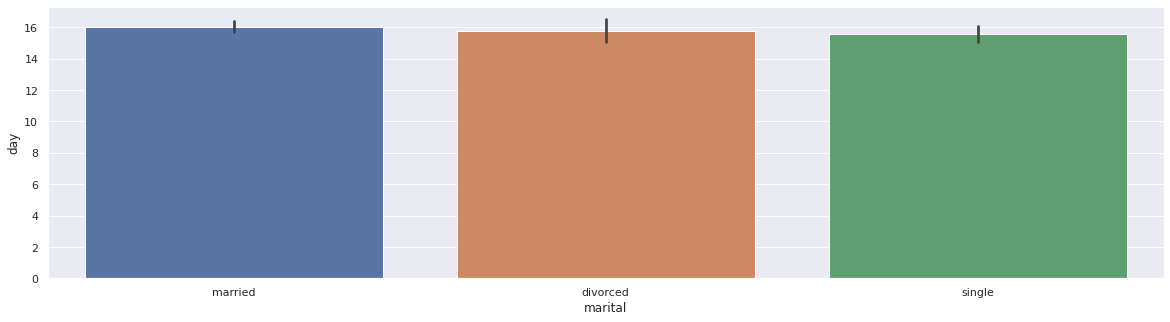

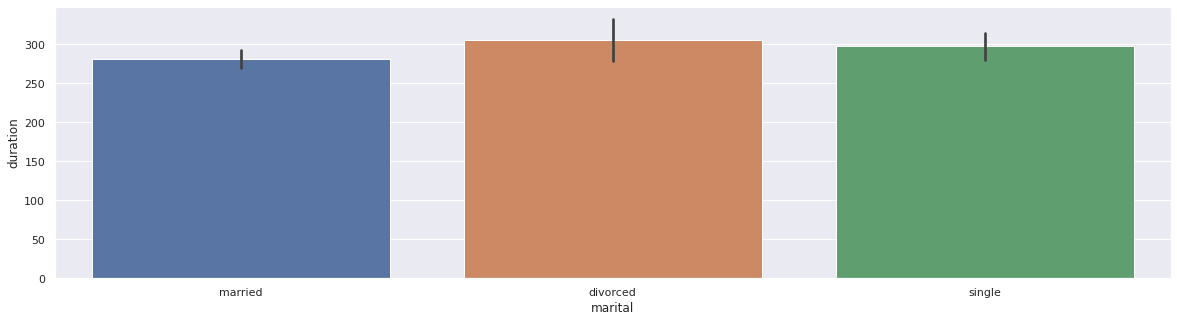

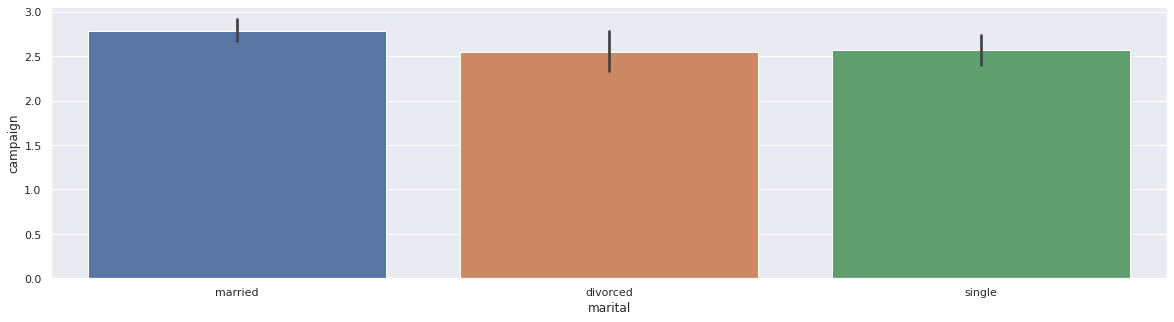

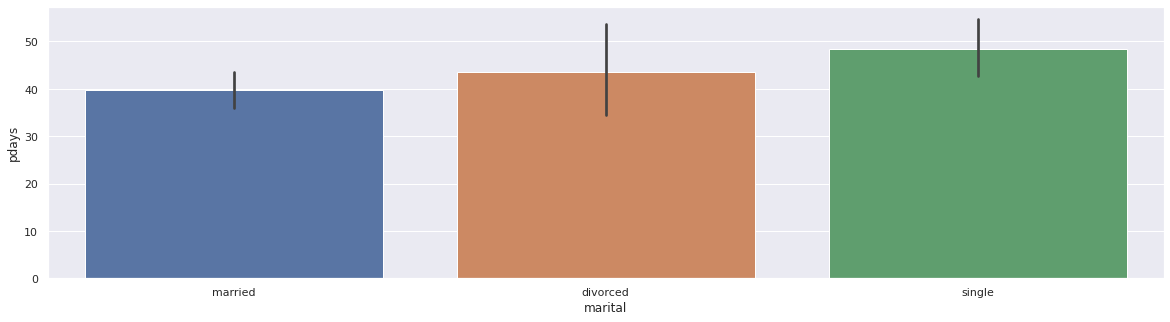

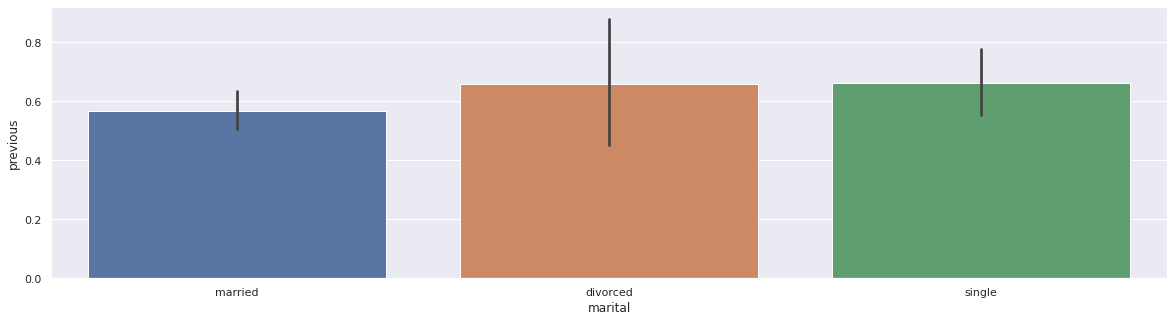

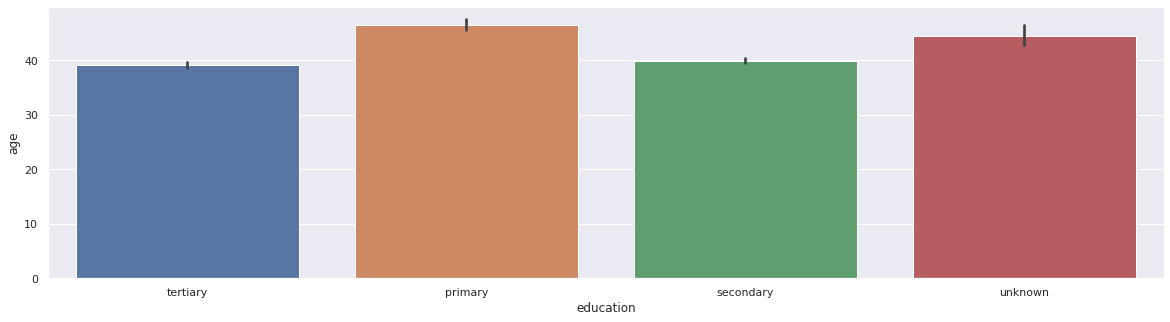

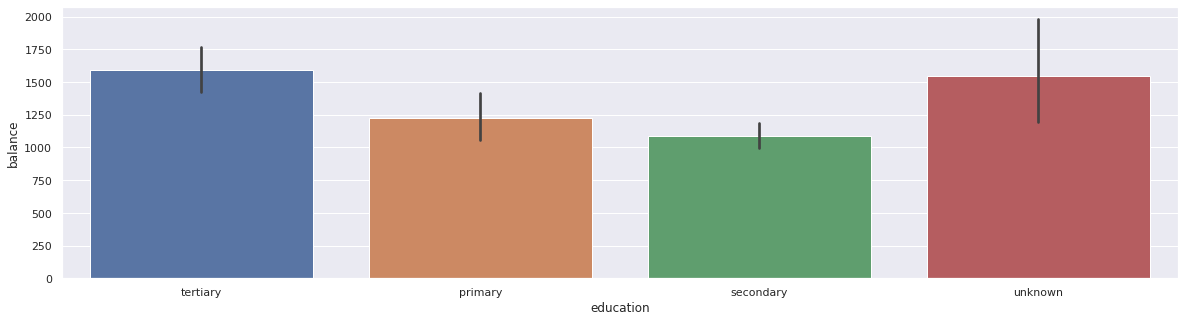

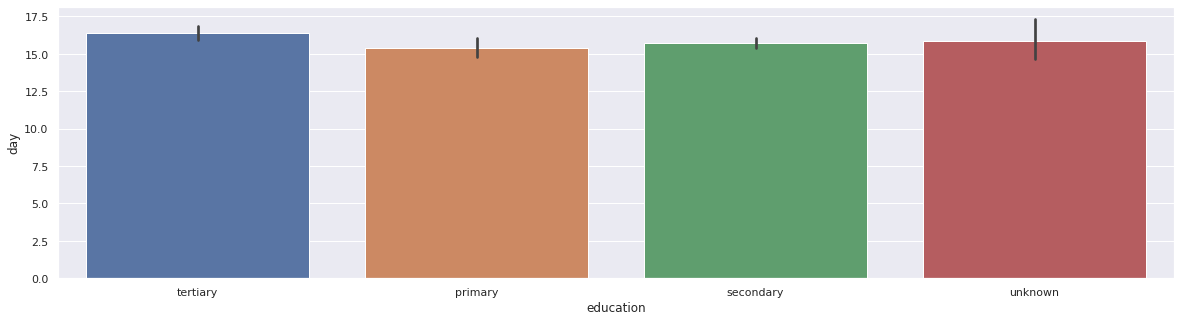

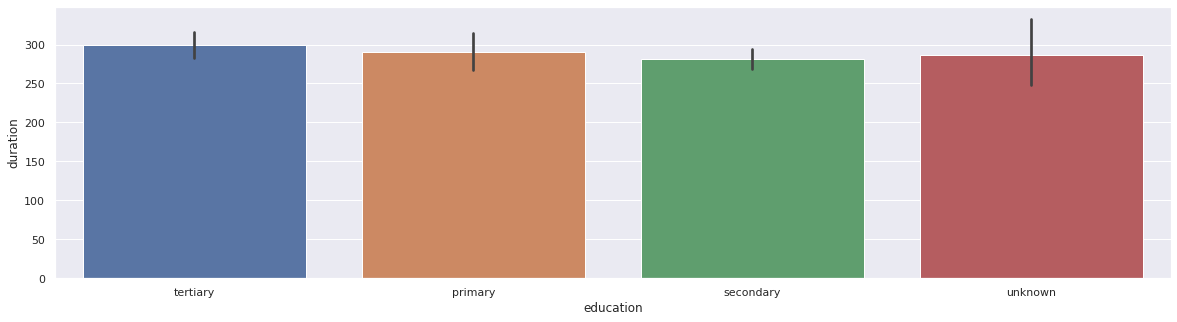

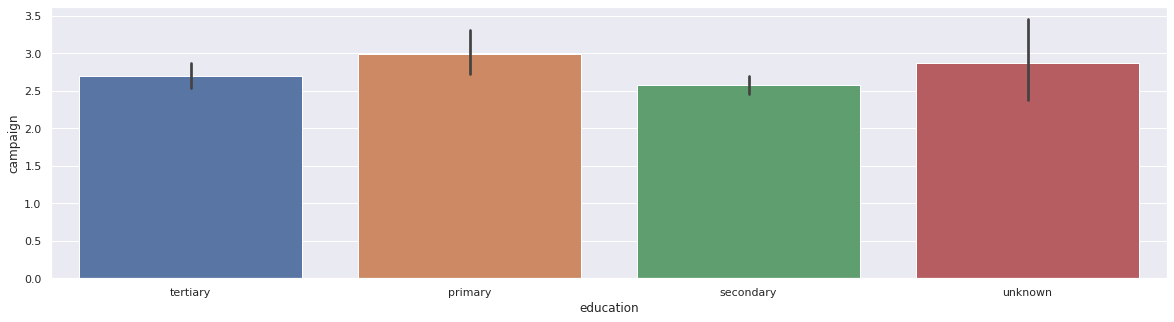

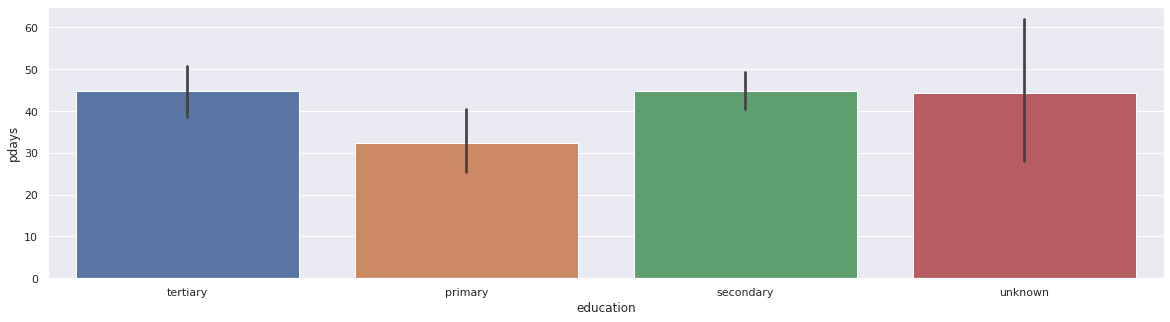

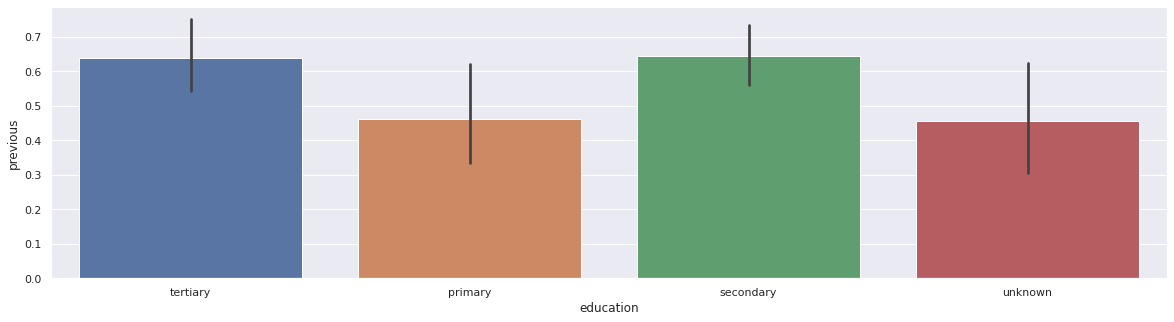

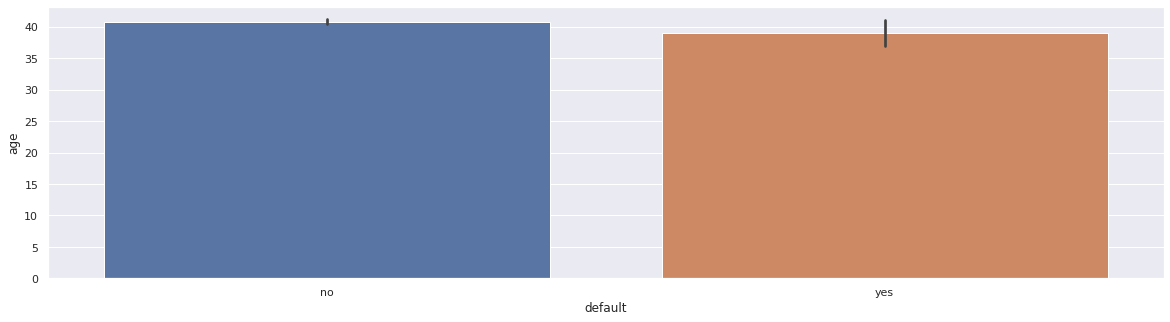

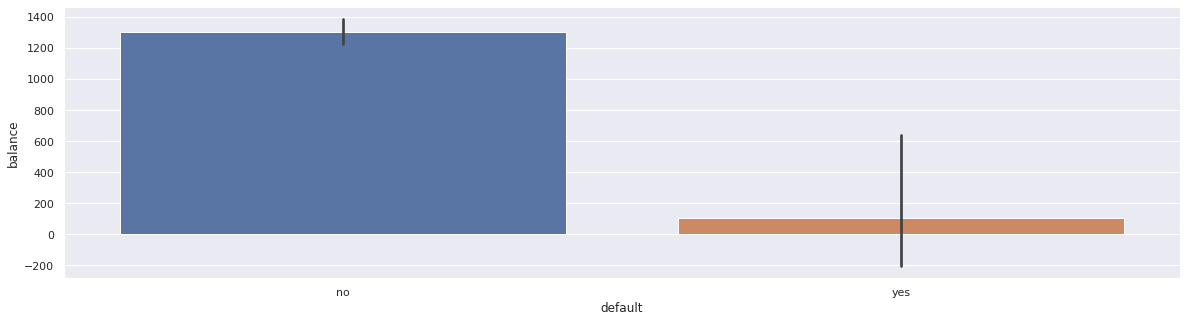

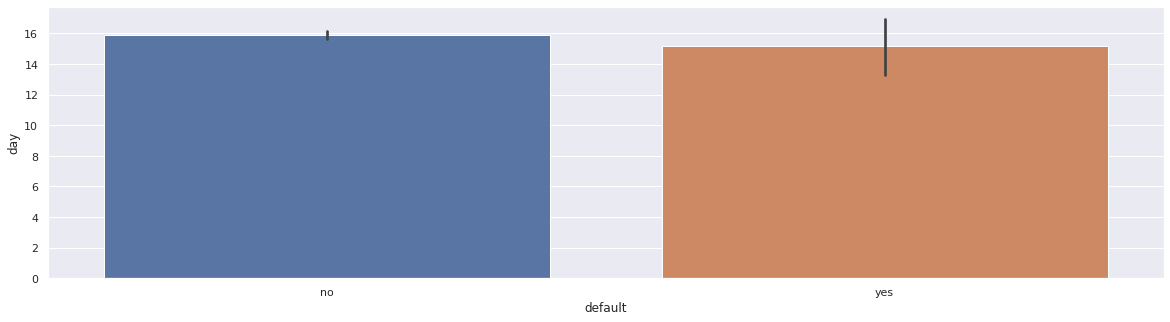

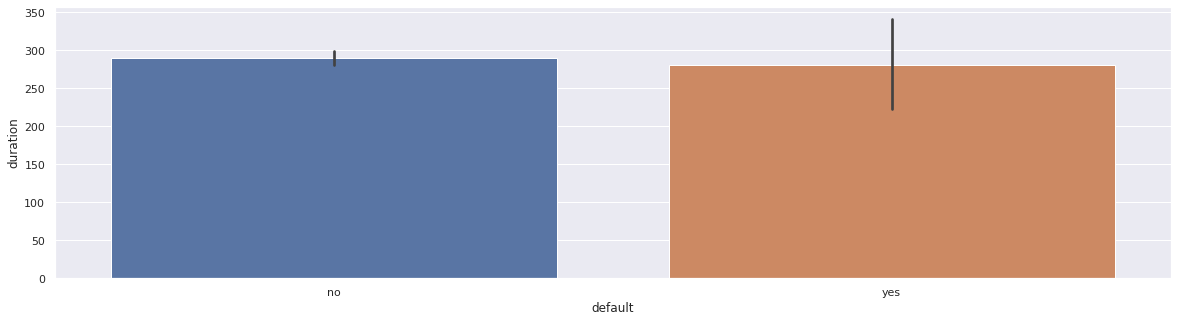

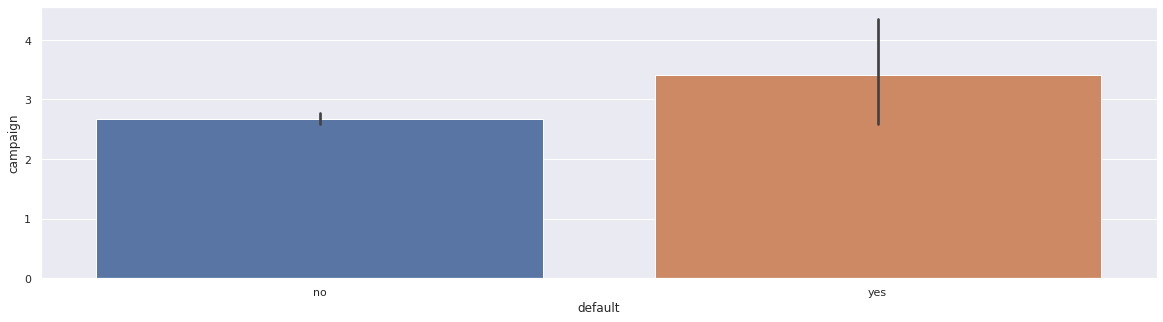

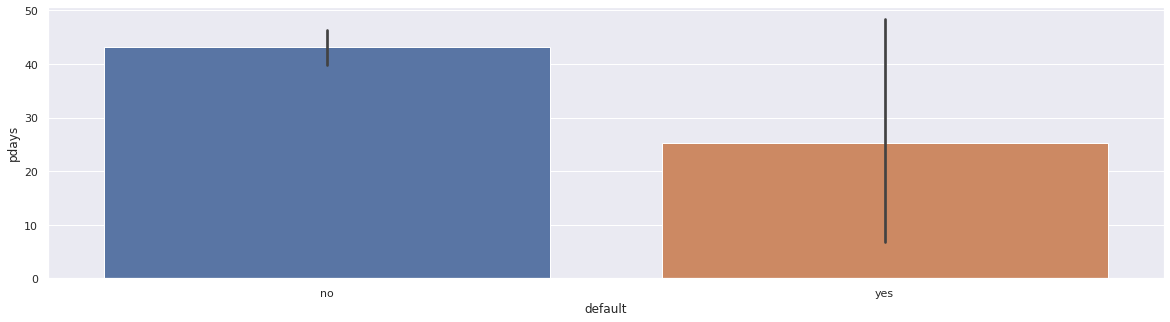

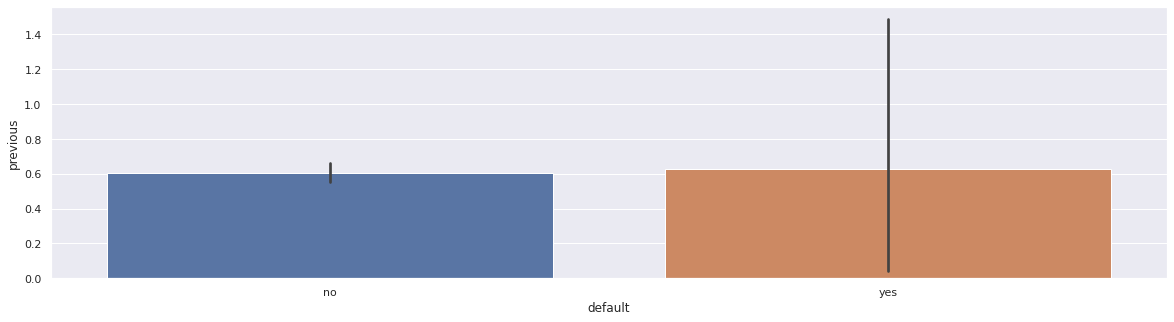

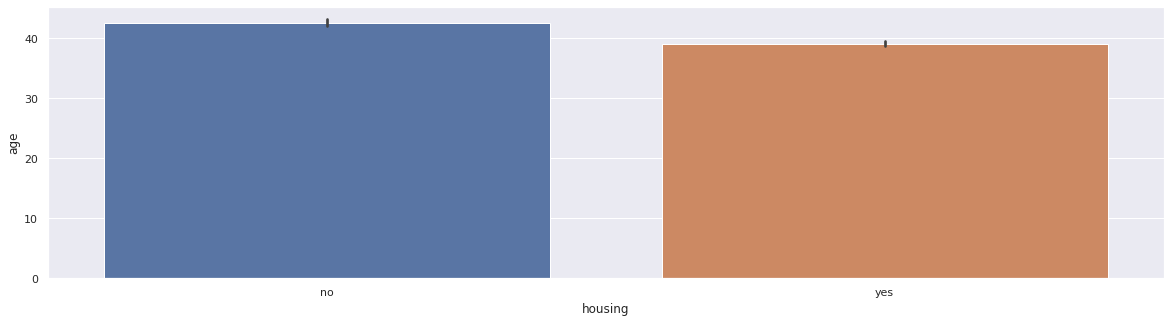

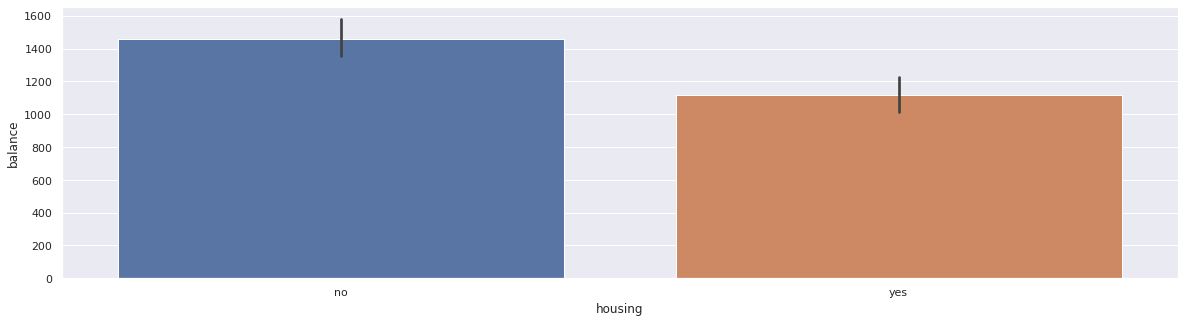

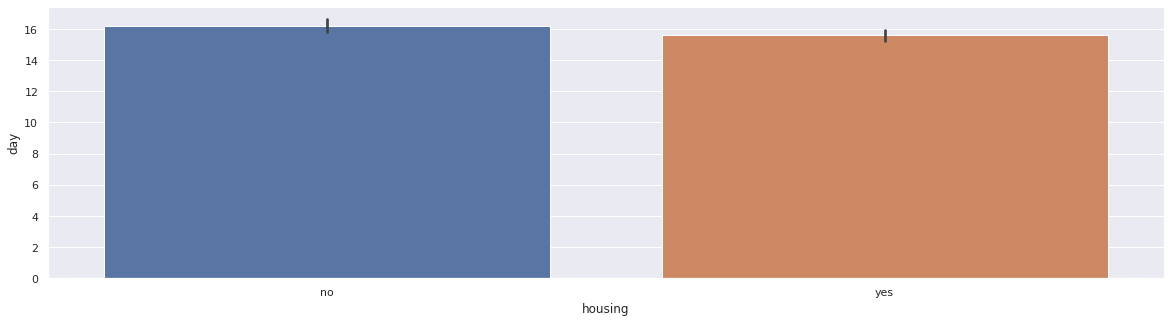

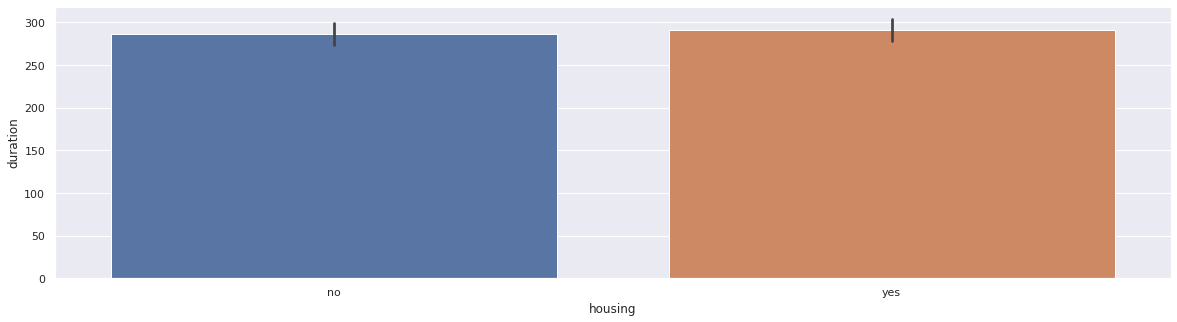

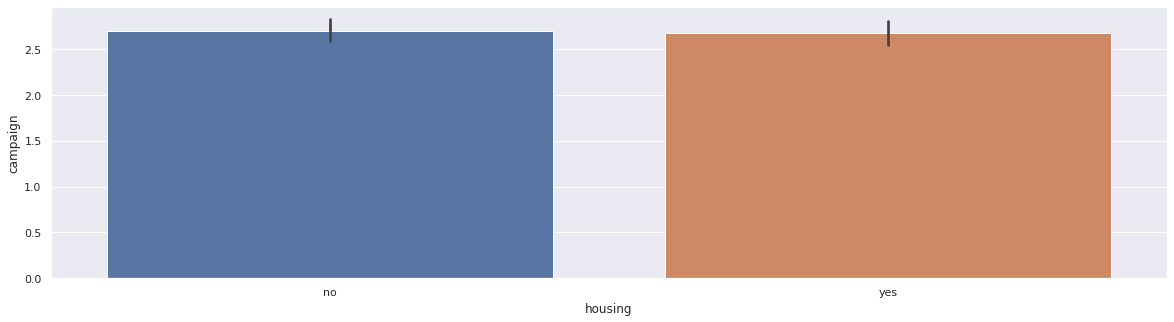

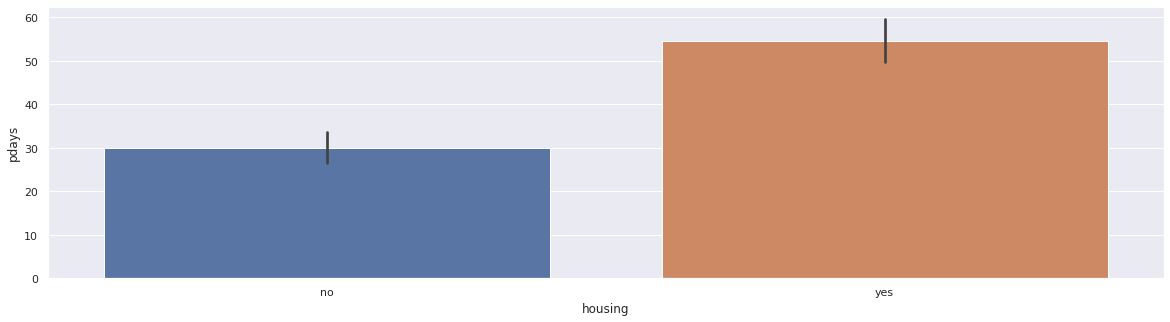

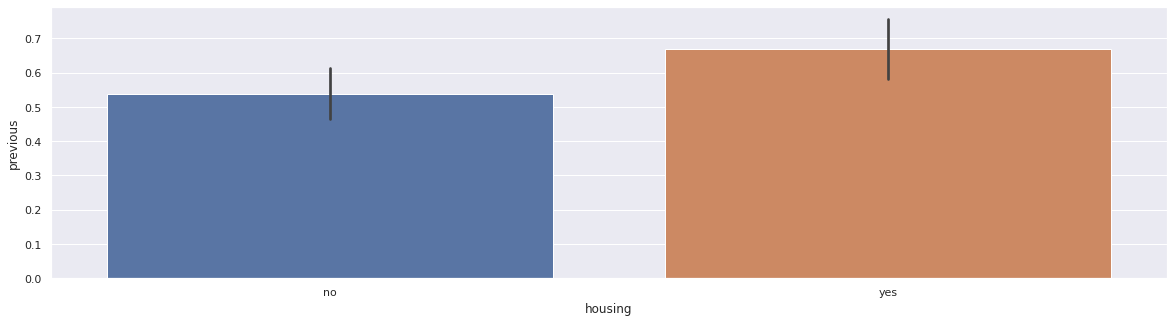

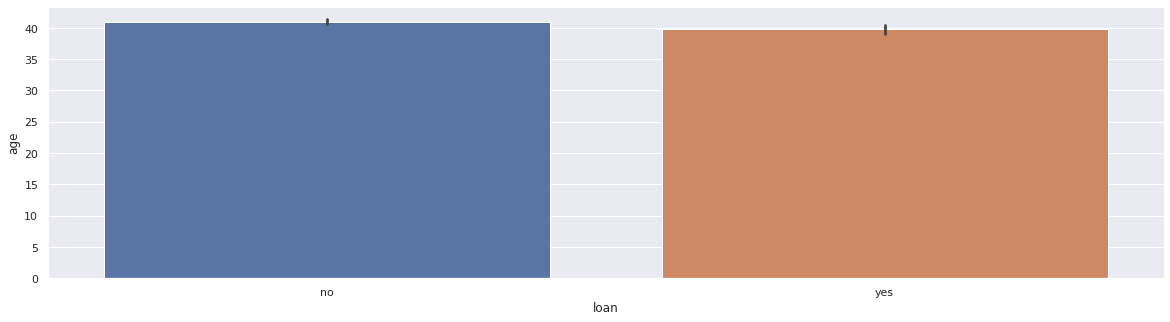

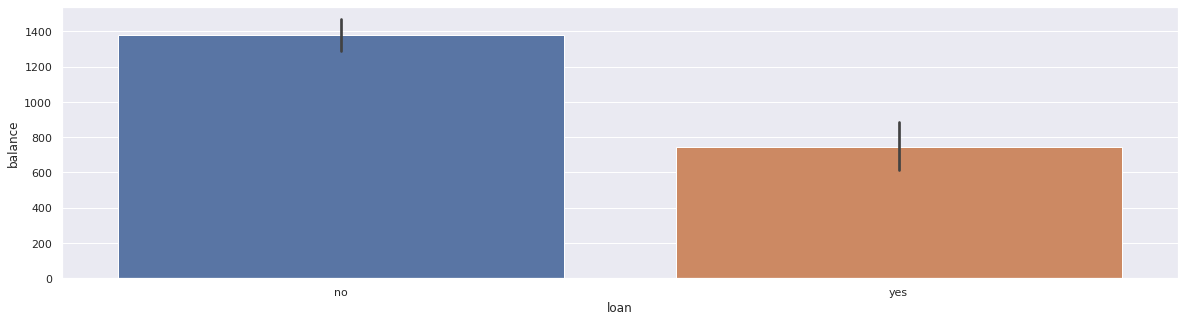

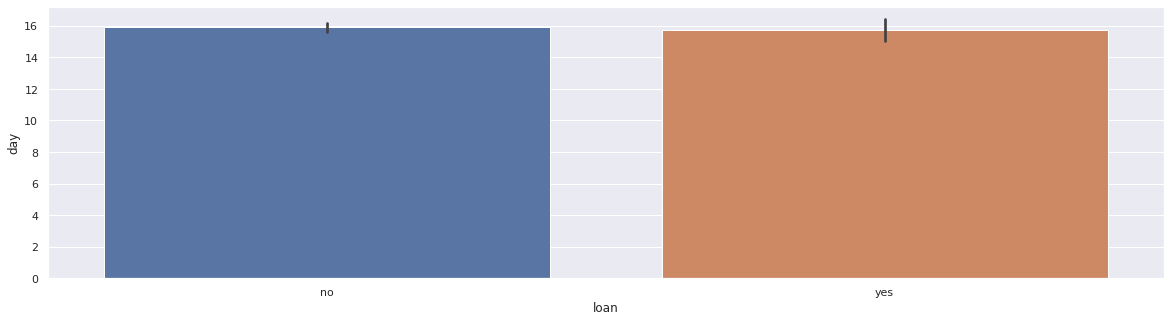

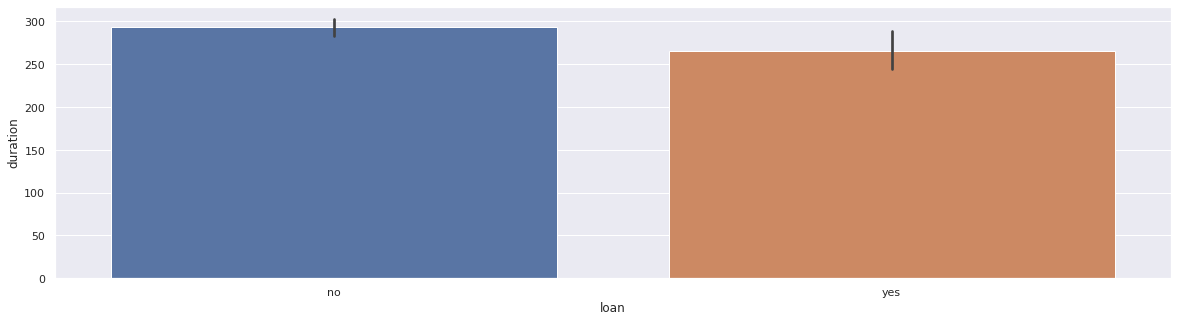

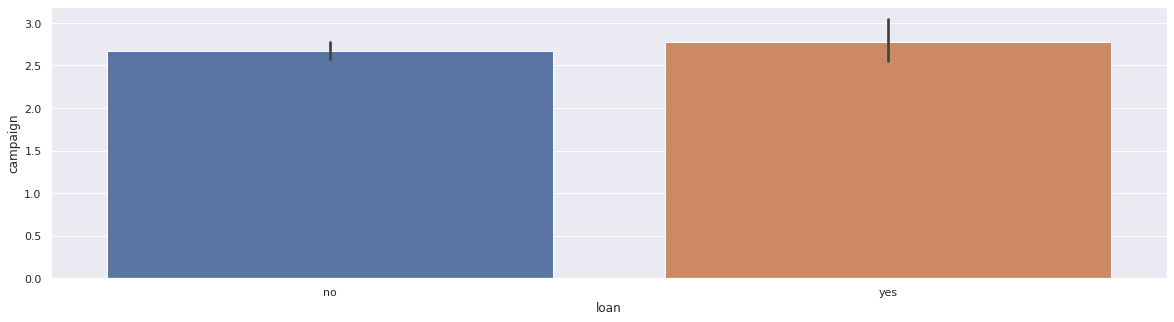

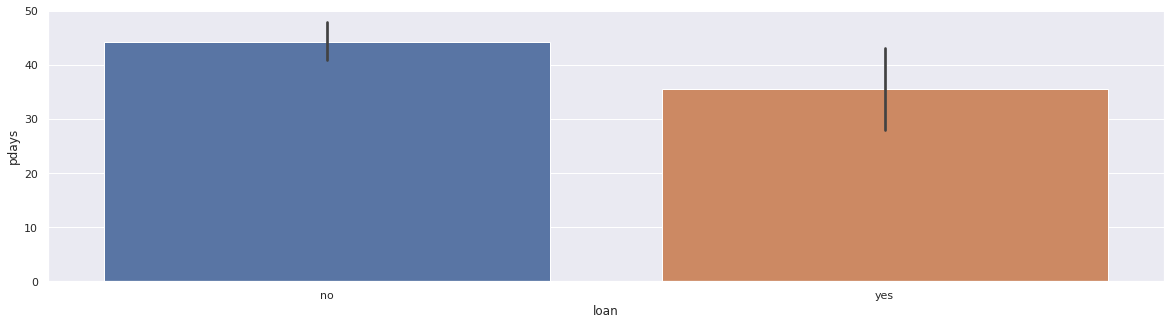

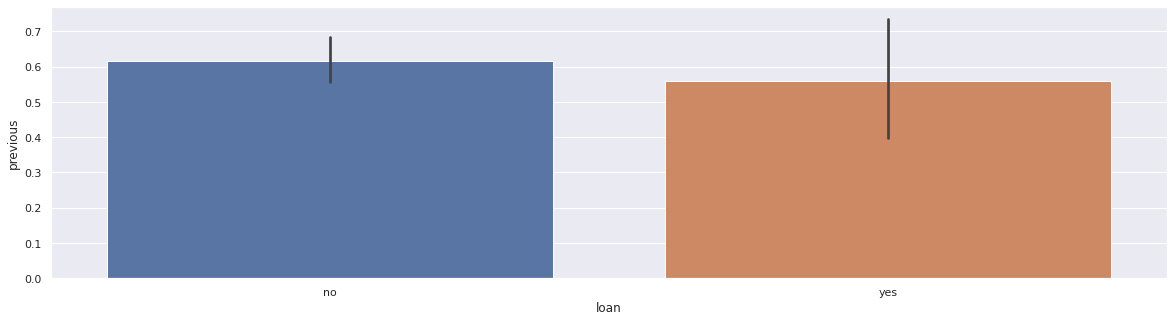

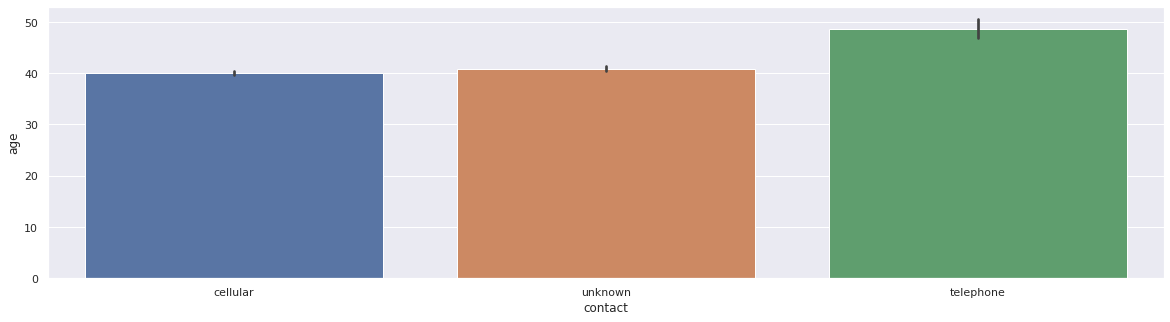

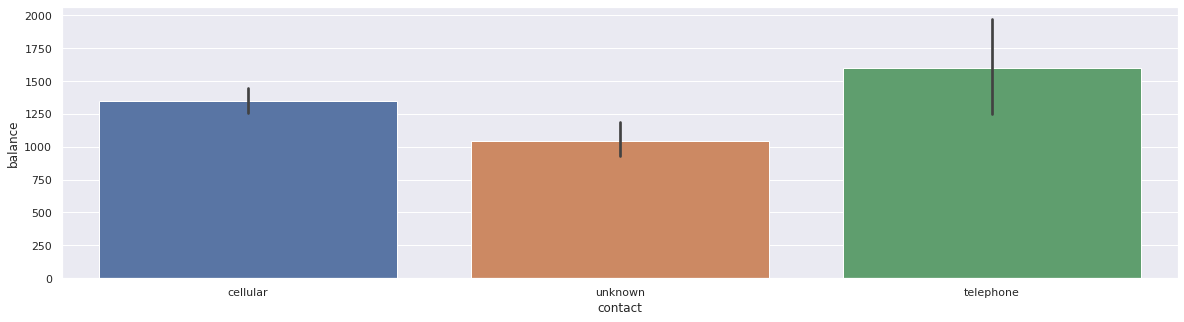

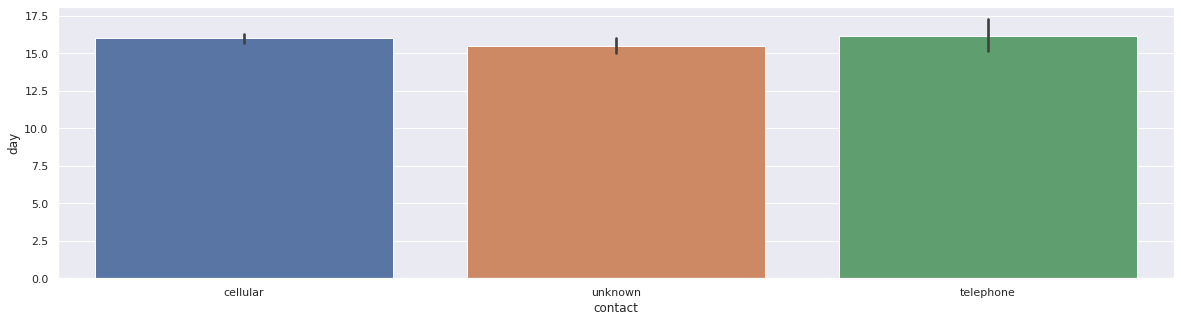

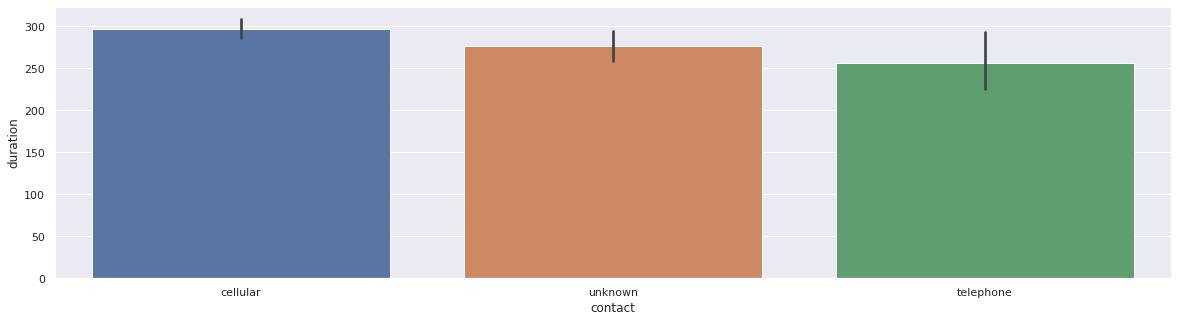

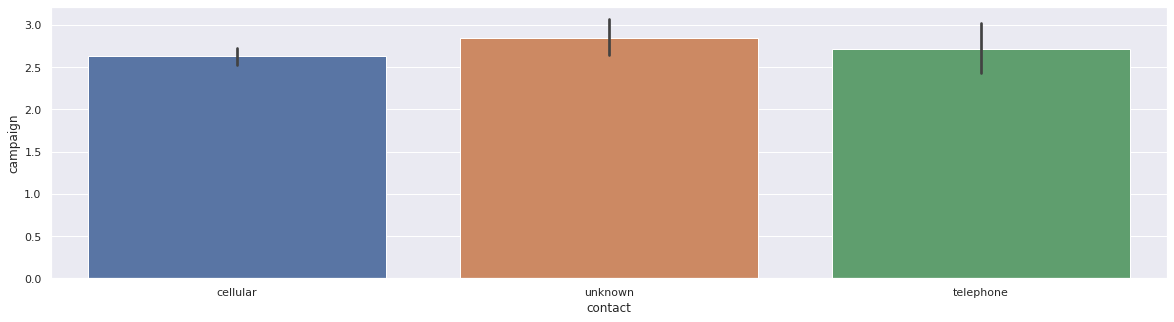

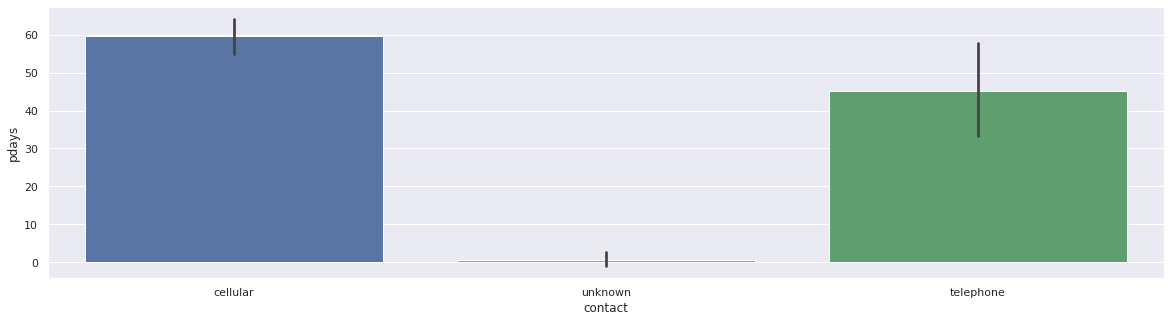

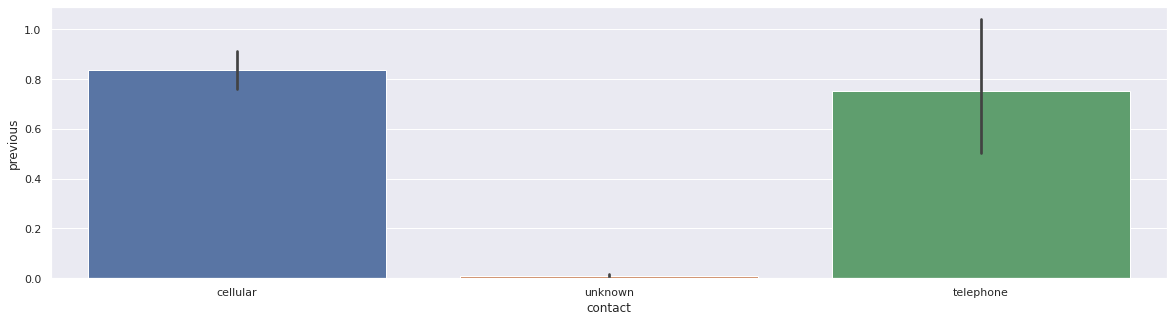

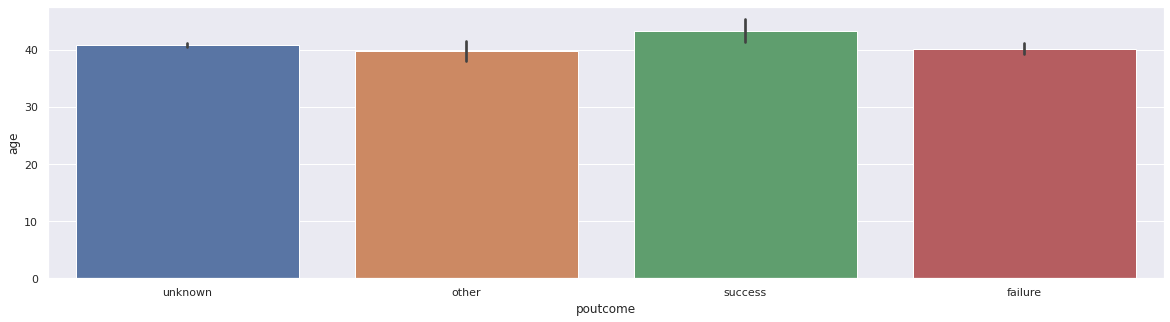

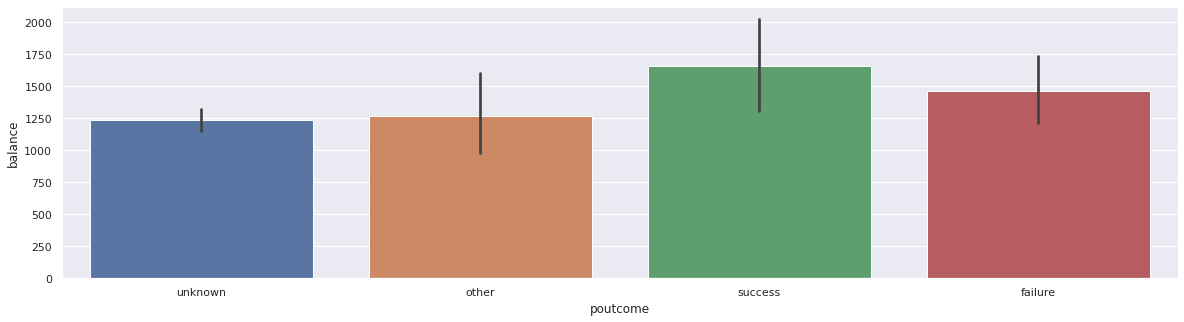

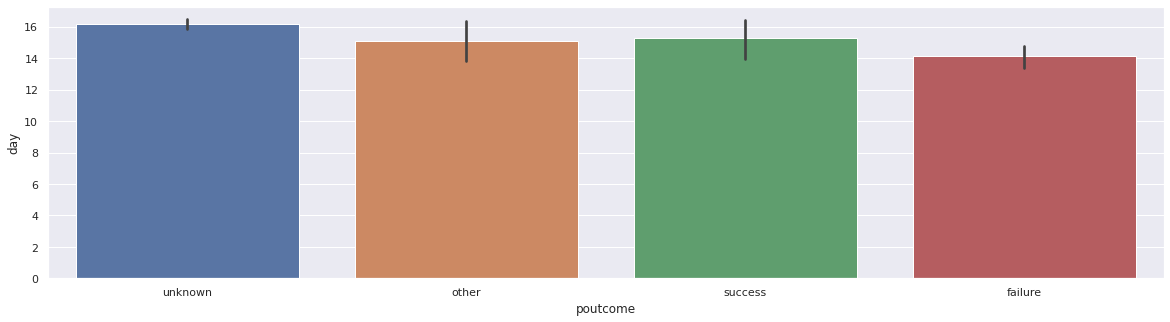

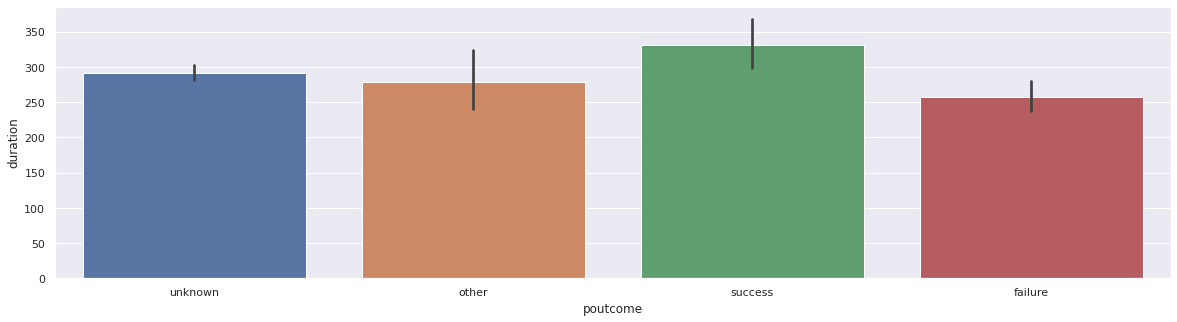

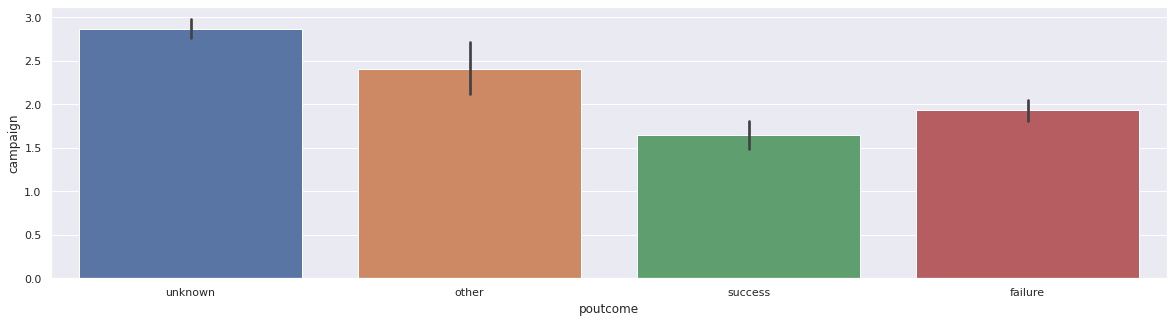

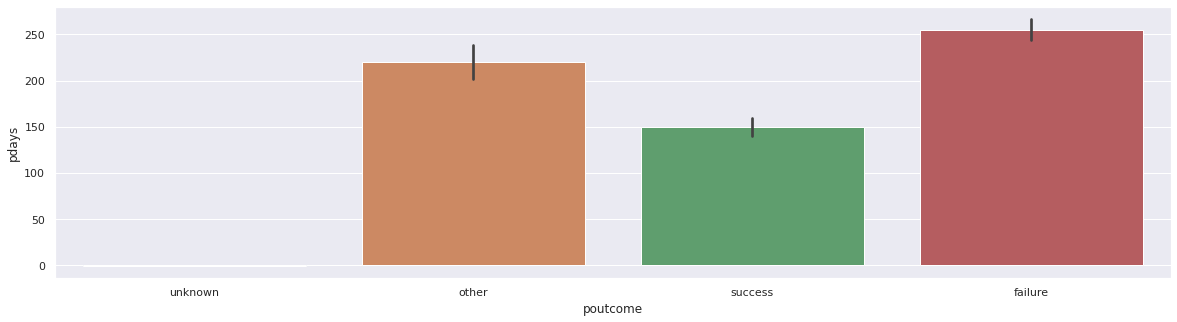

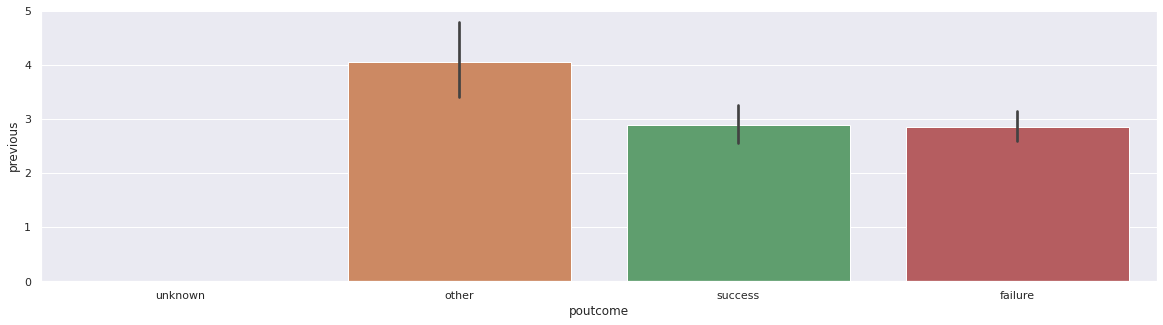

In [84]:
# For input features
plt.rcParams['figure.figsize'] = (20, 5)
for i in categorical_data:
  for j in numerical_data:
    sns.barplot(data=categorical_data,x=categorical_data[i],y=numerical_data[j])
    plt.show()

**STRIP PLOTS**

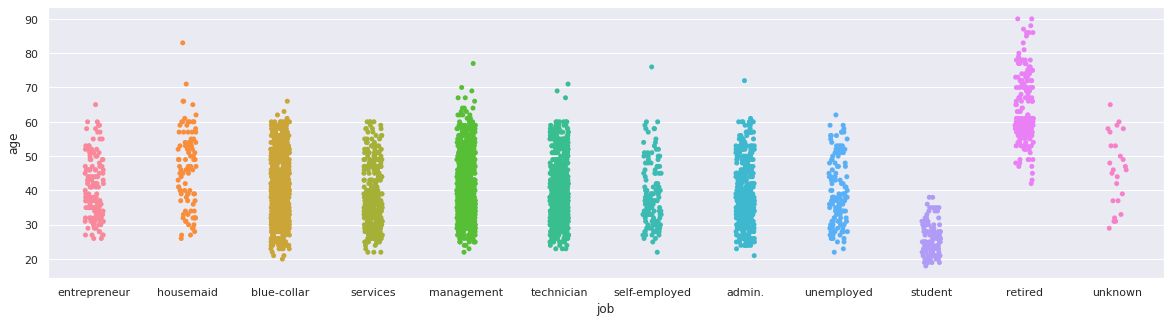

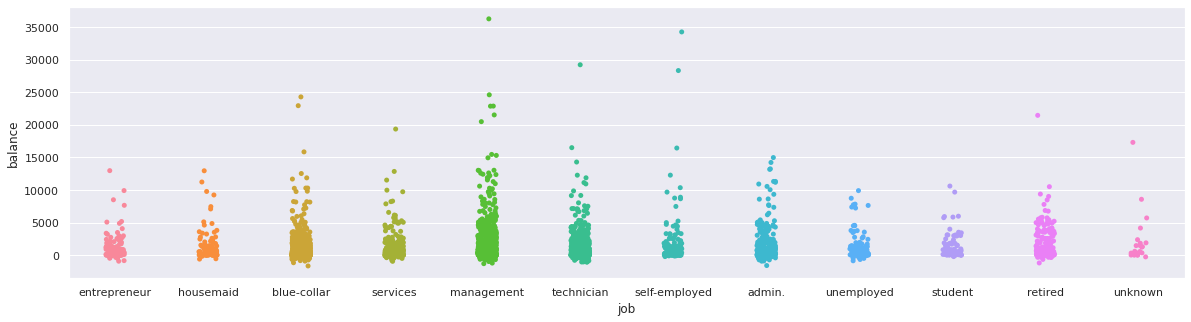

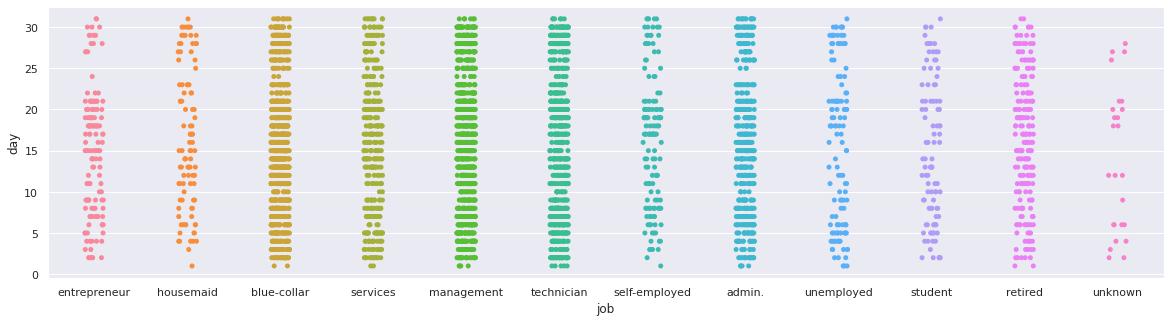

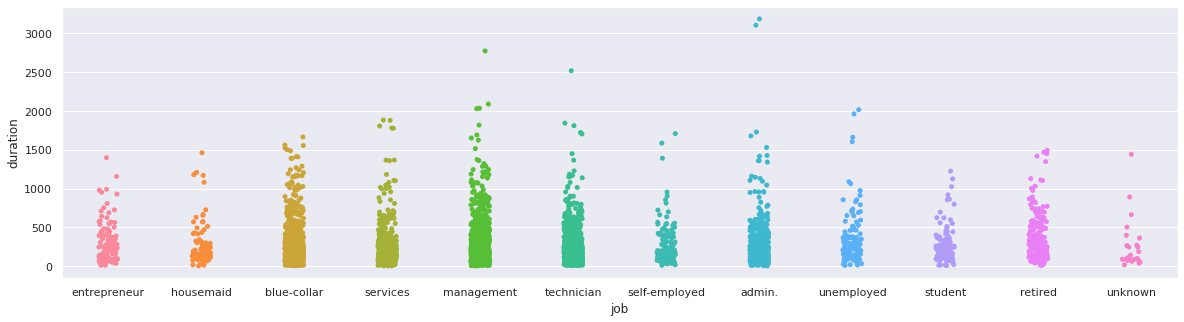

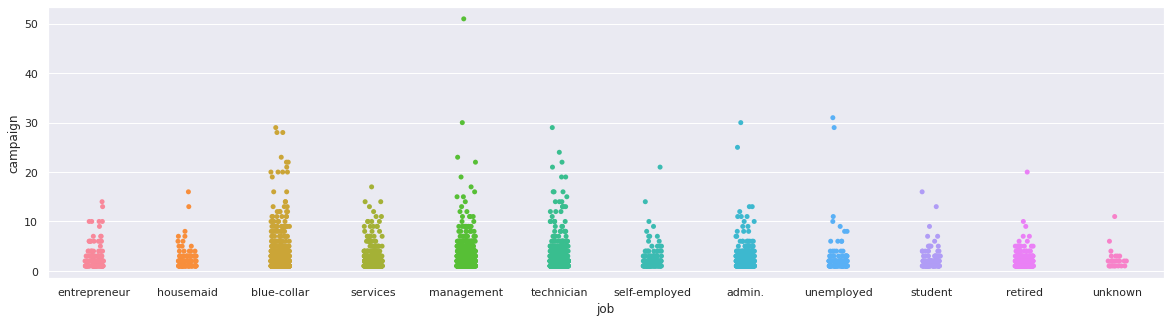

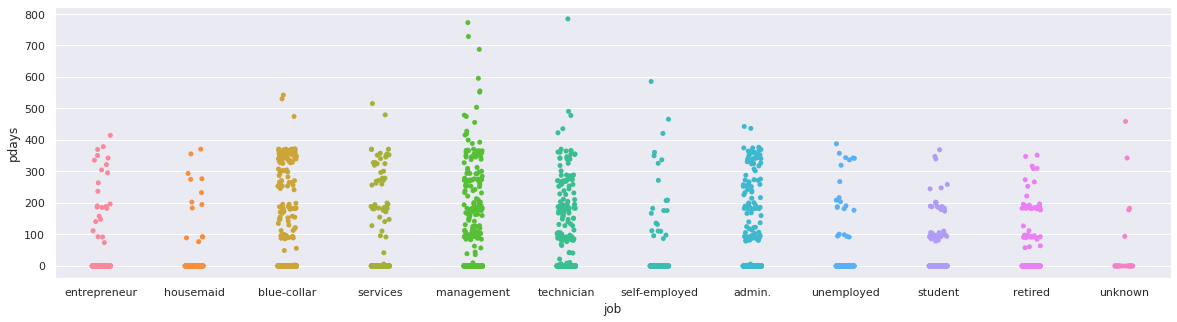

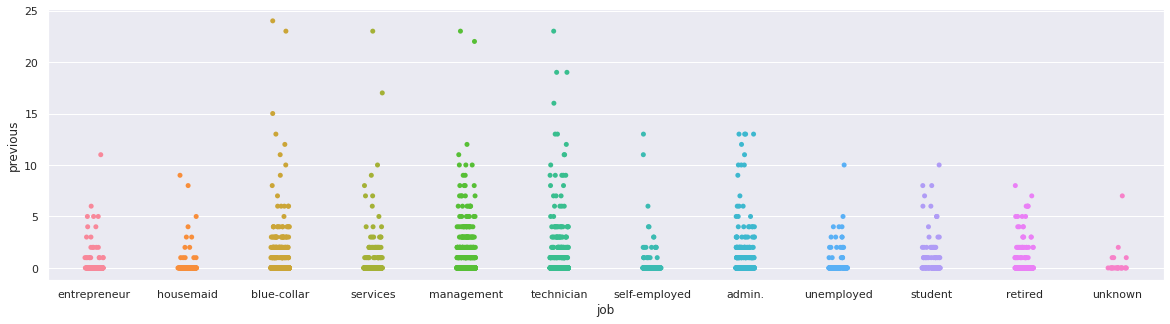

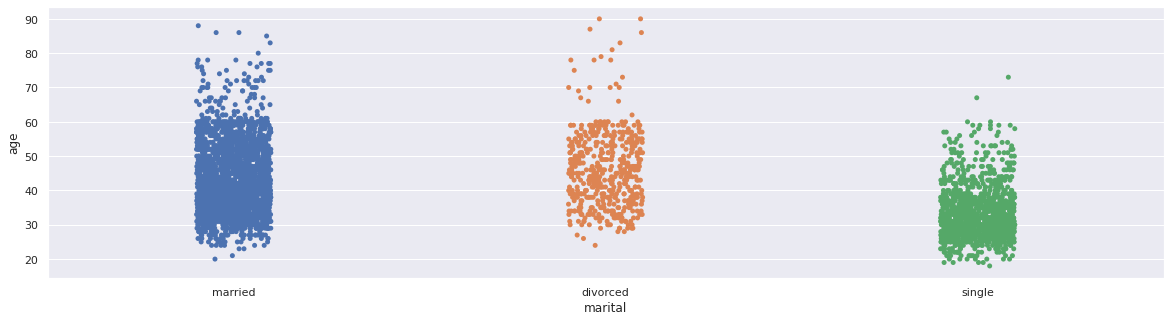

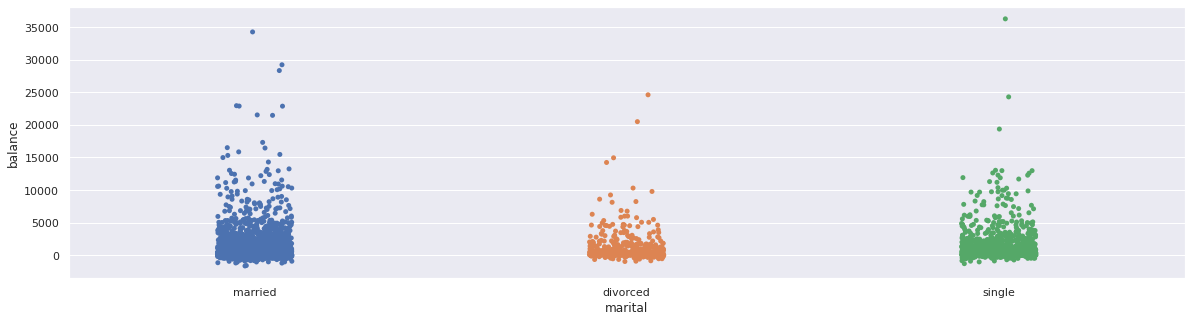

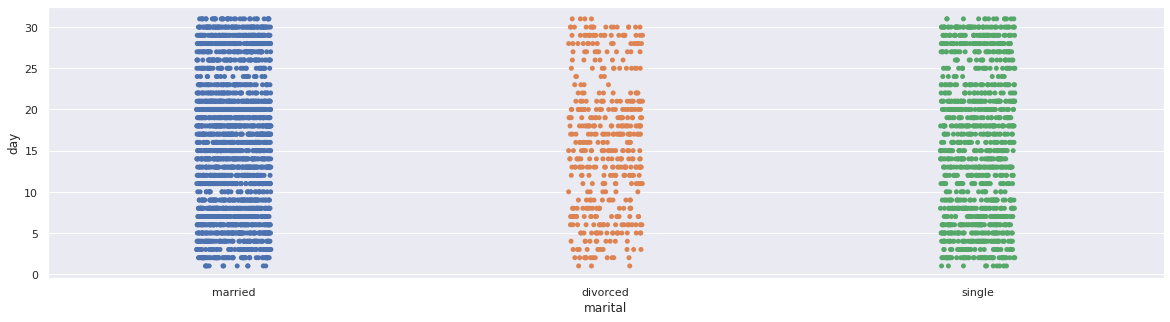

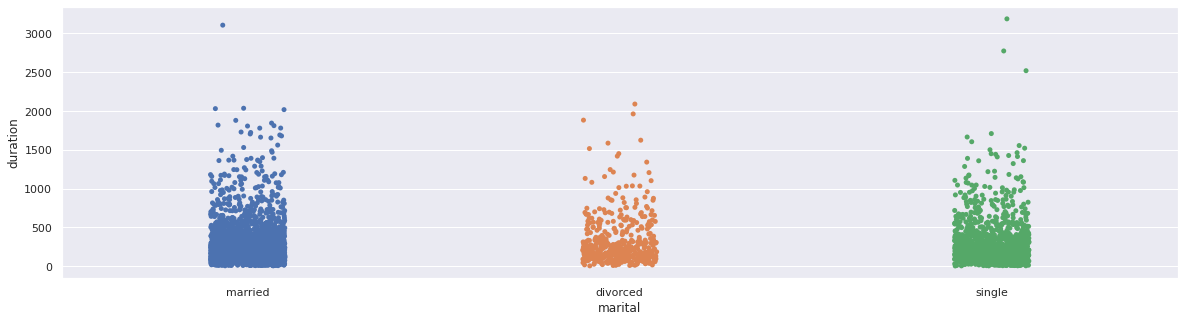

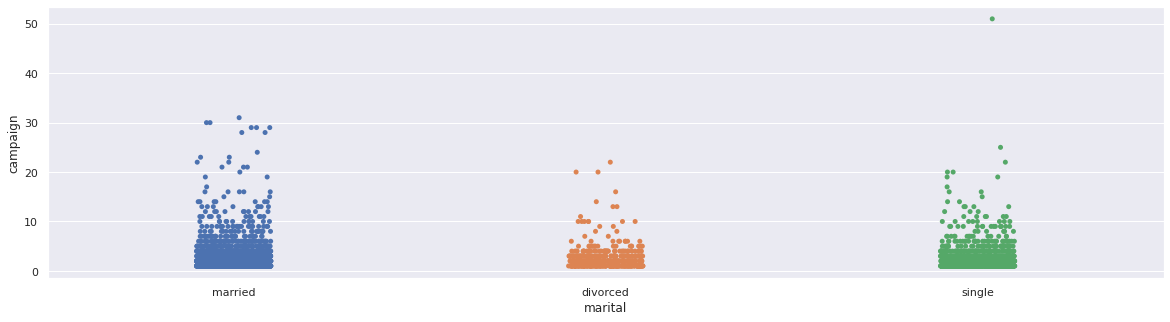

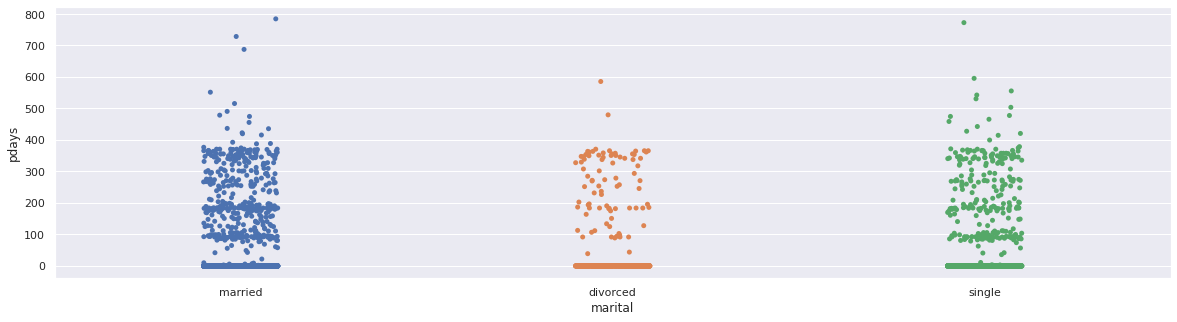

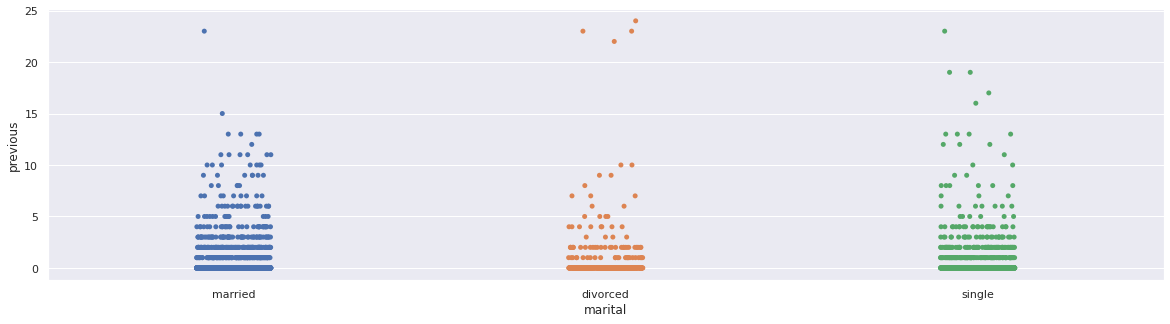

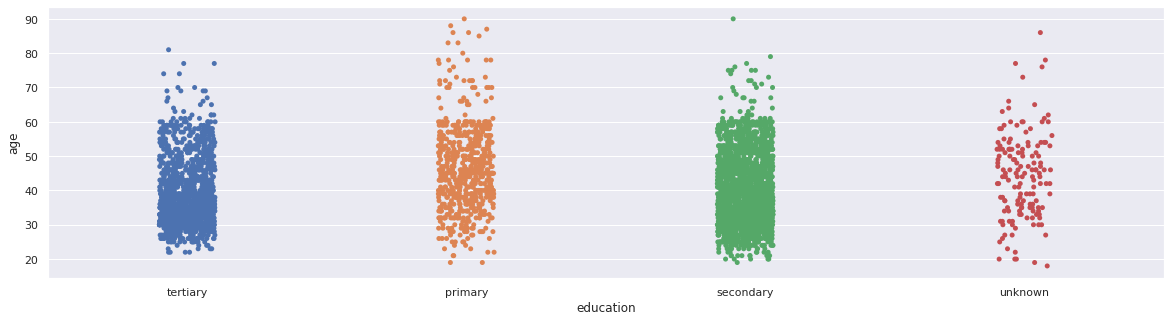

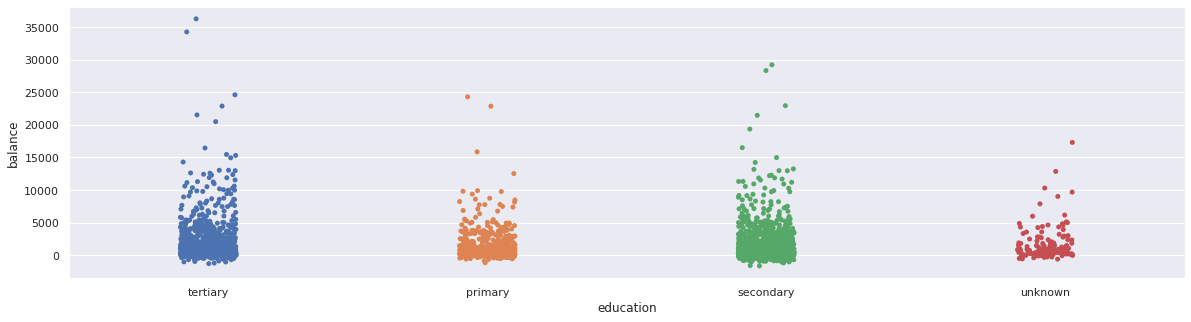

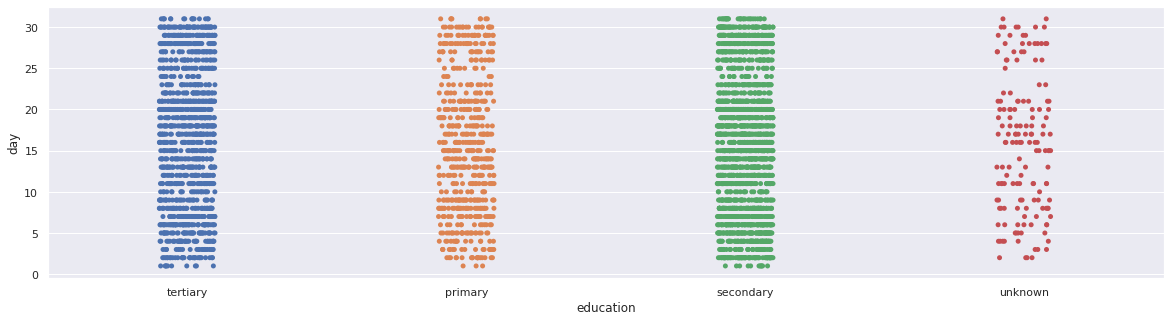

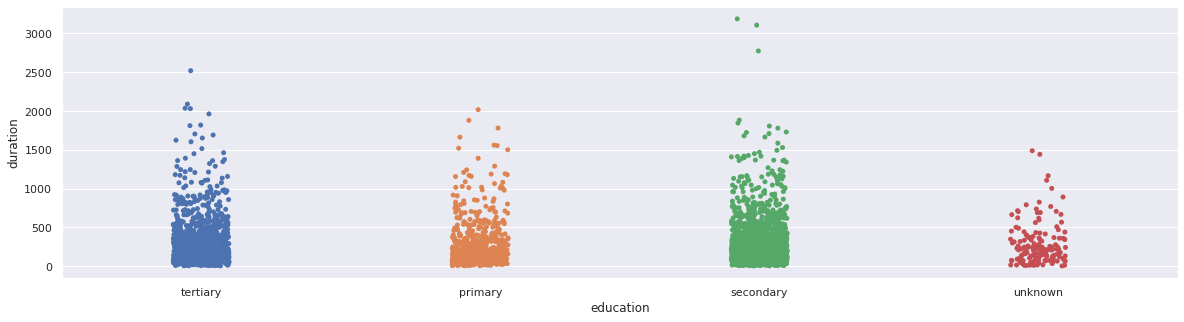

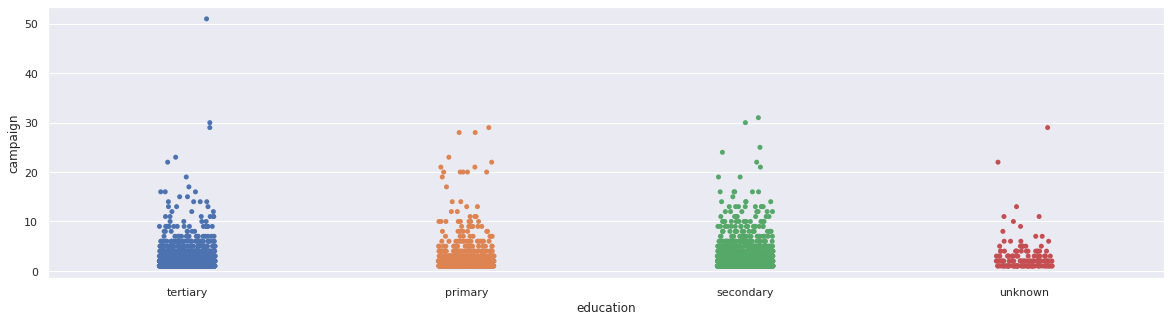

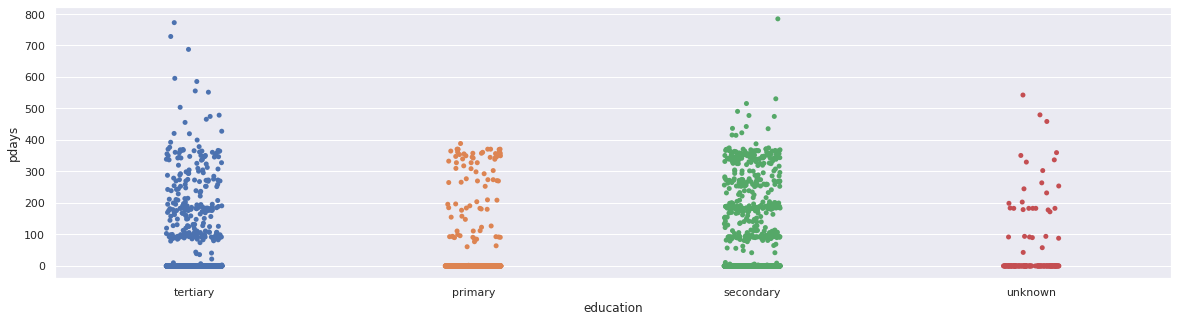

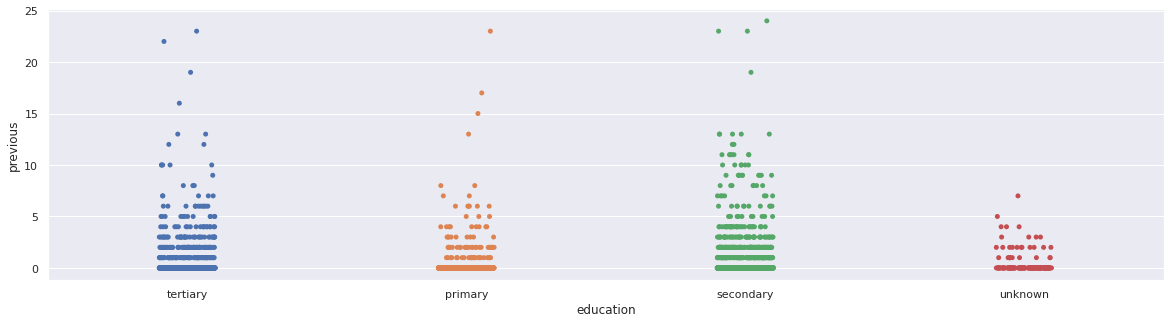

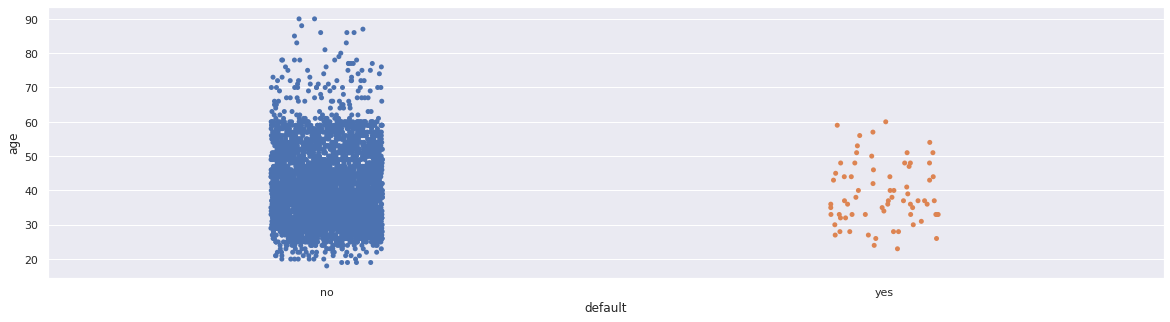

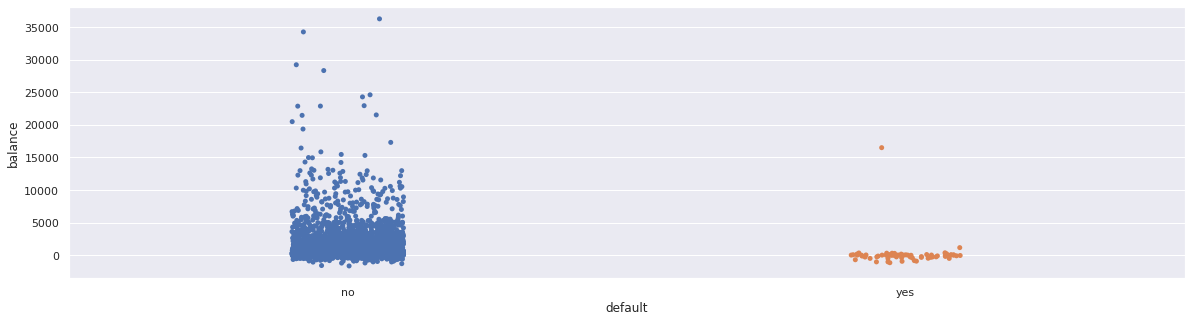

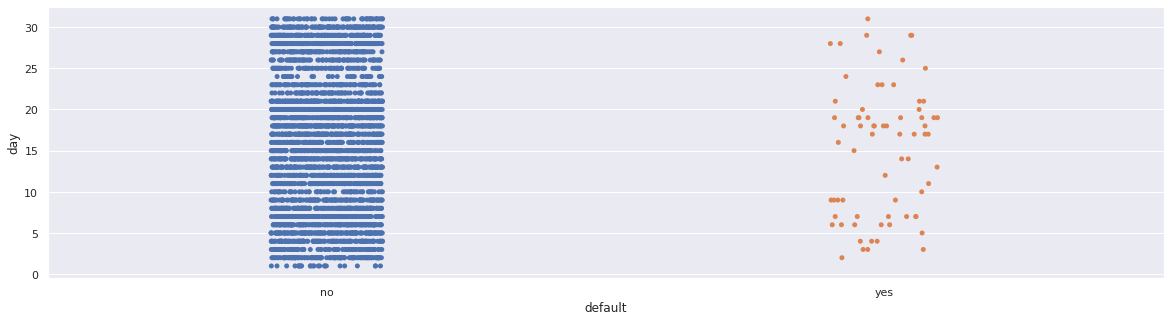

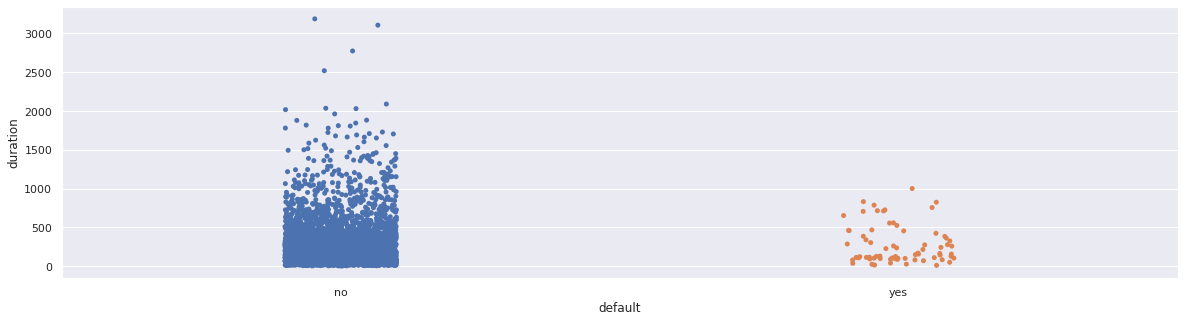

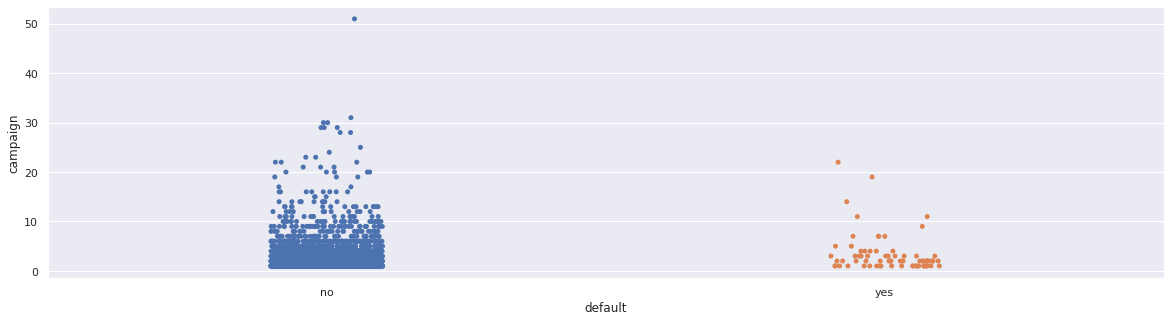

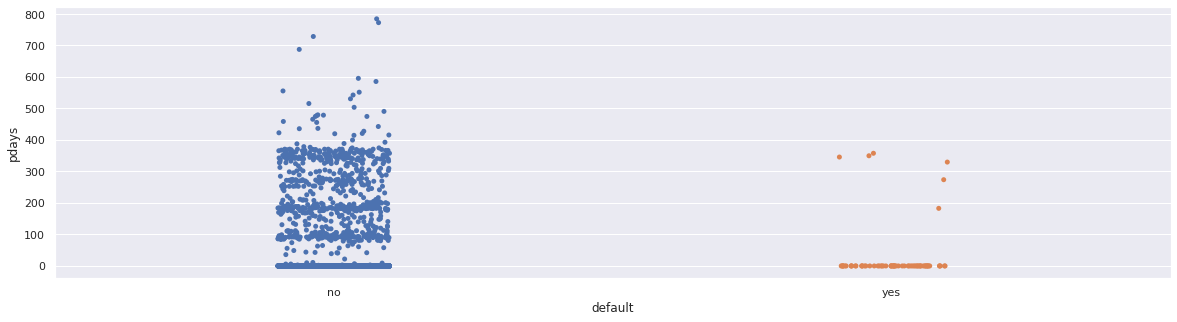

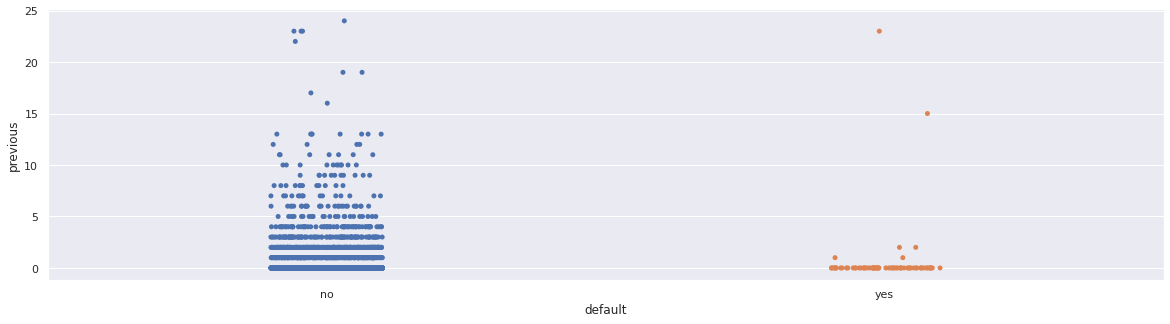

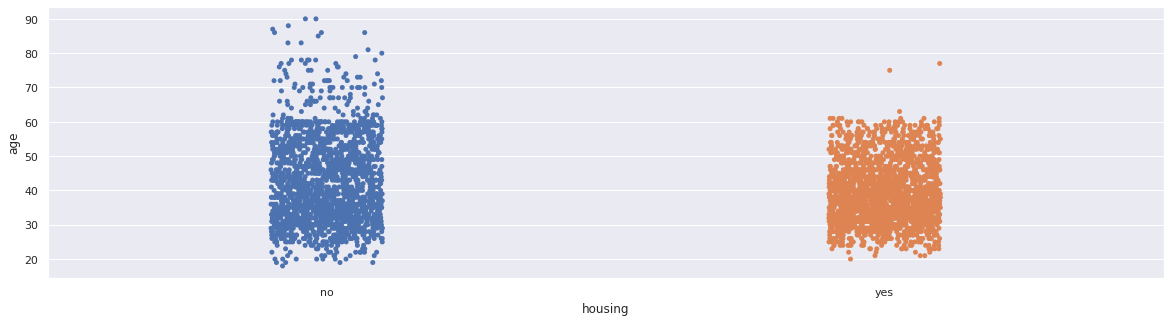

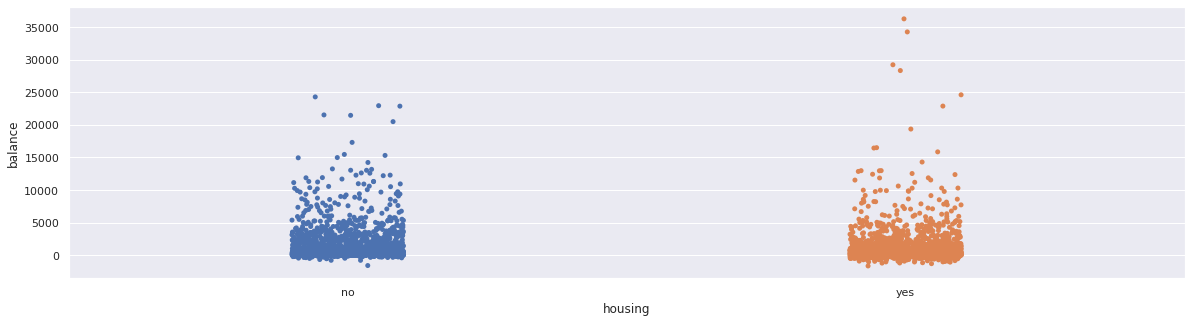

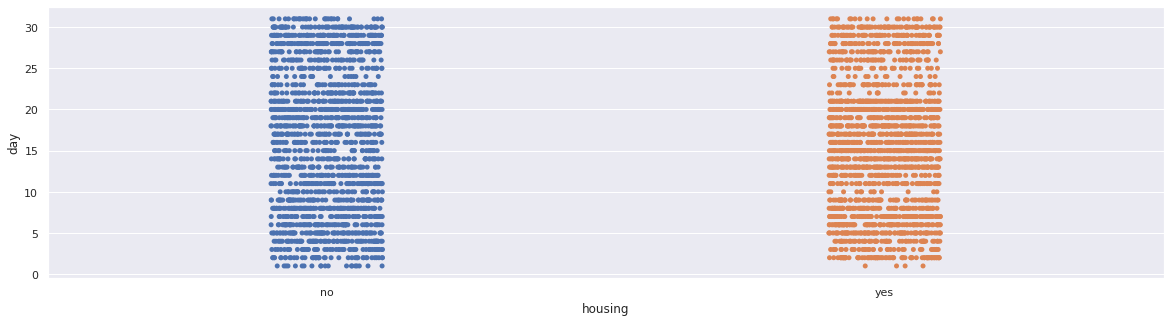

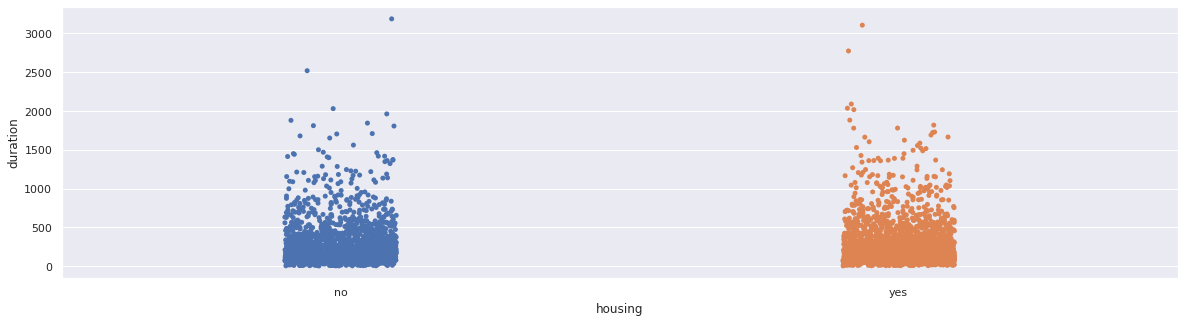

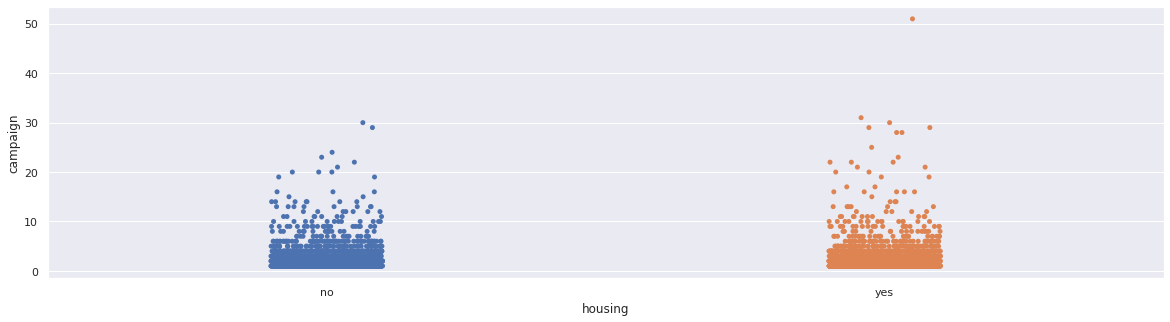

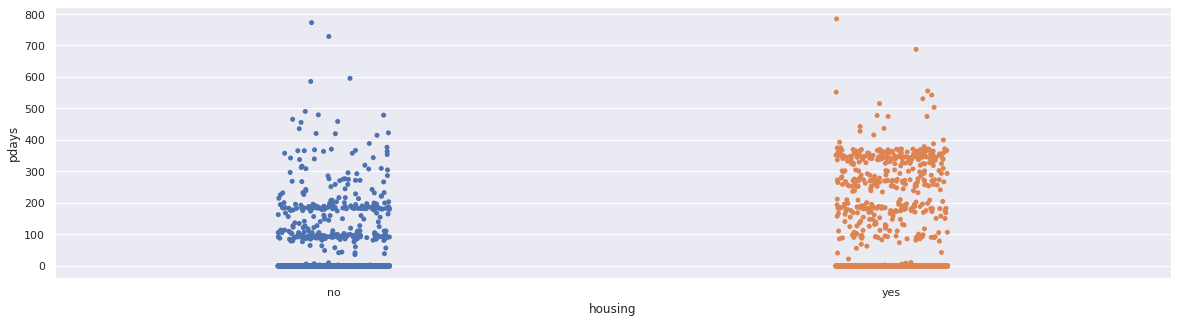

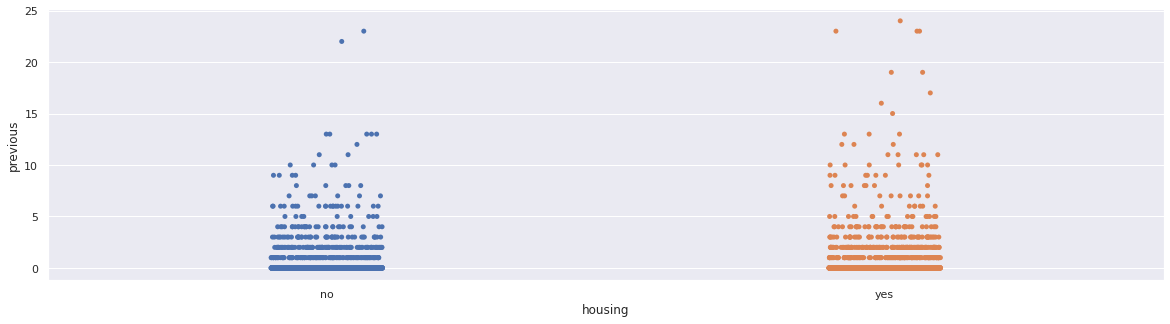

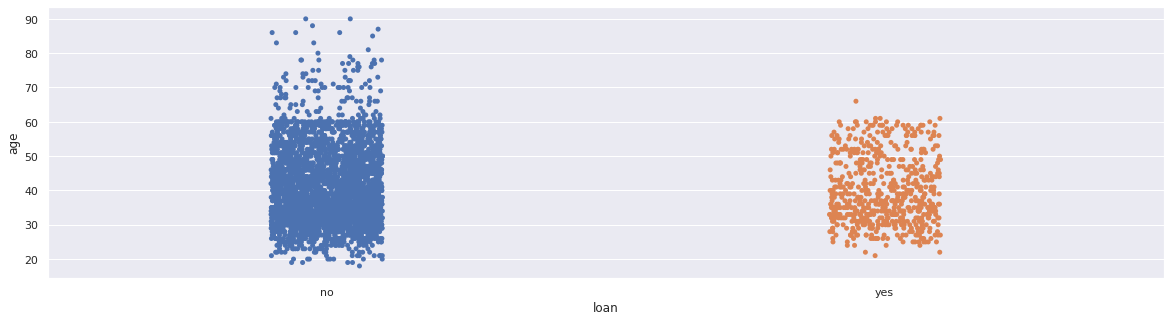

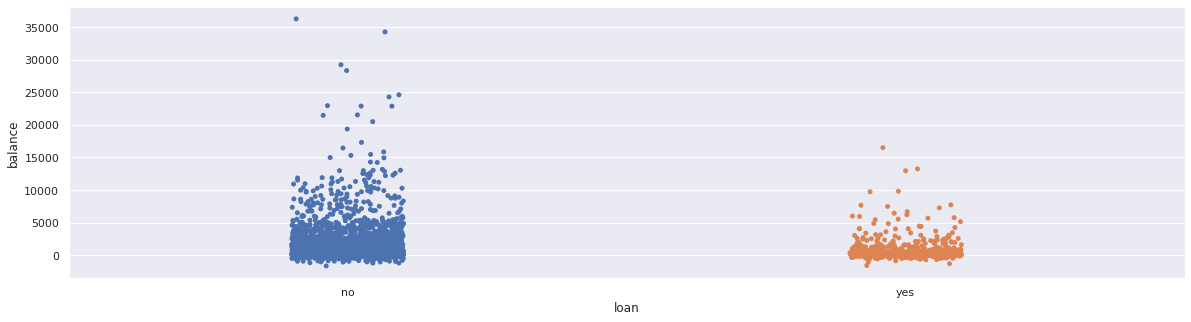

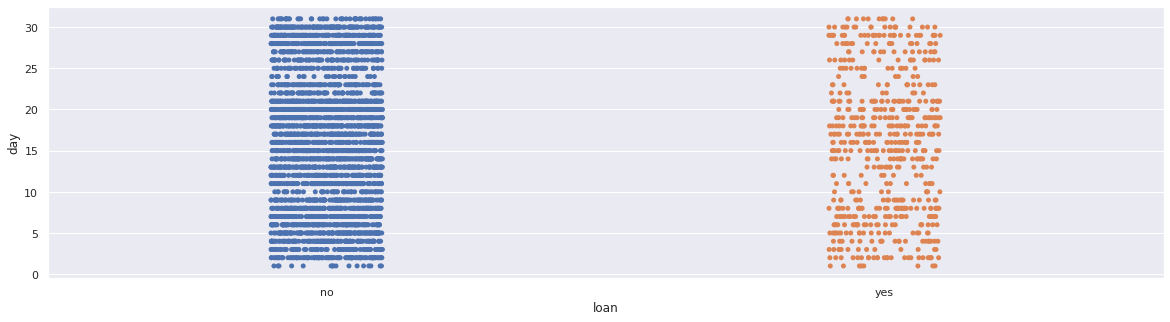

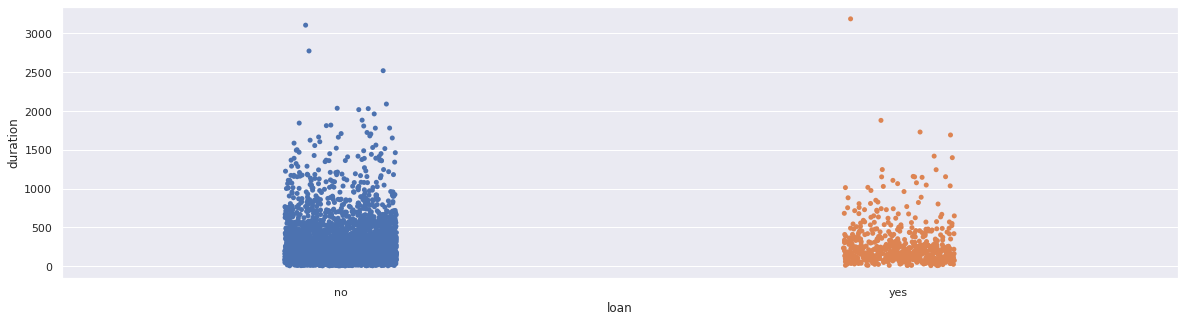

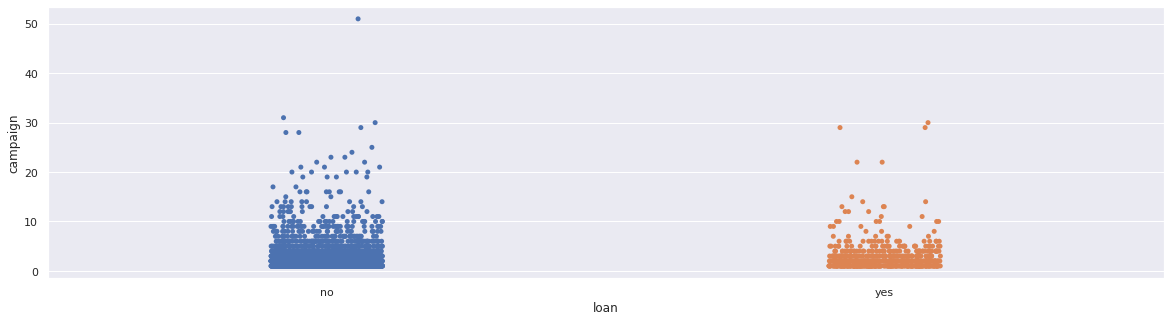

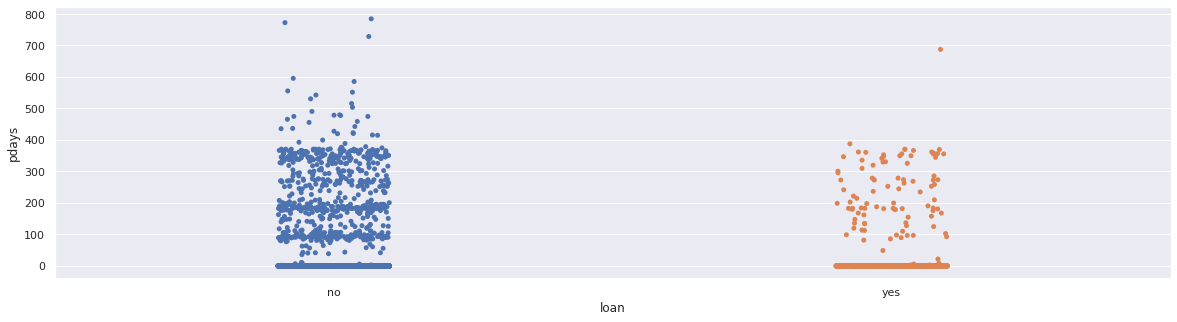

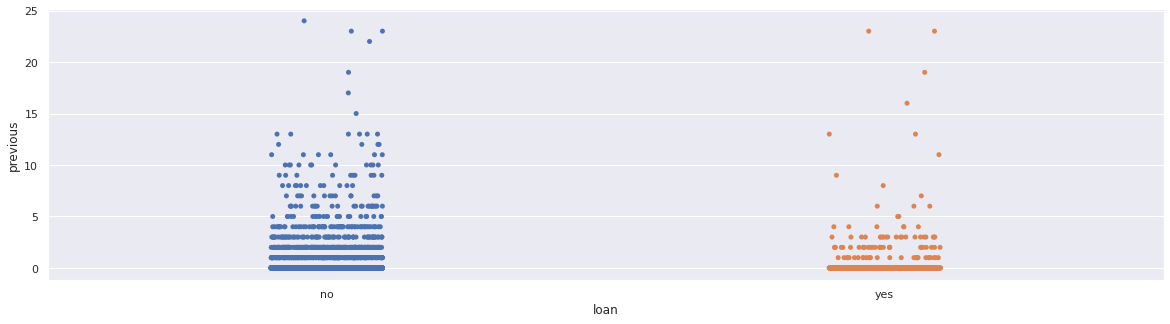

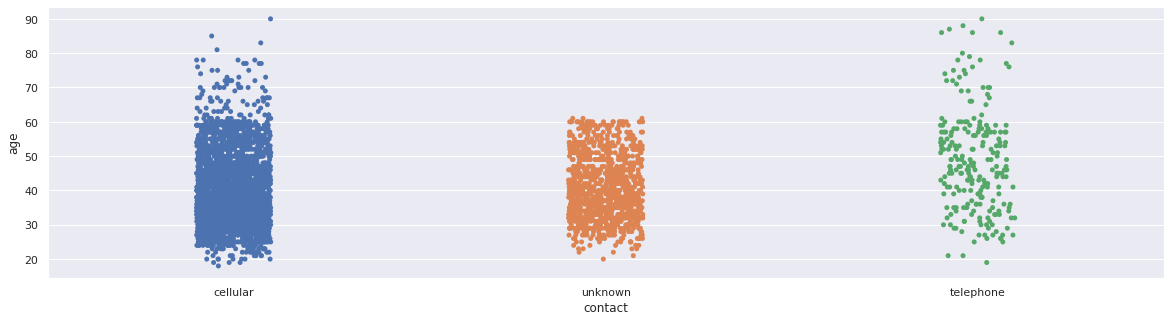

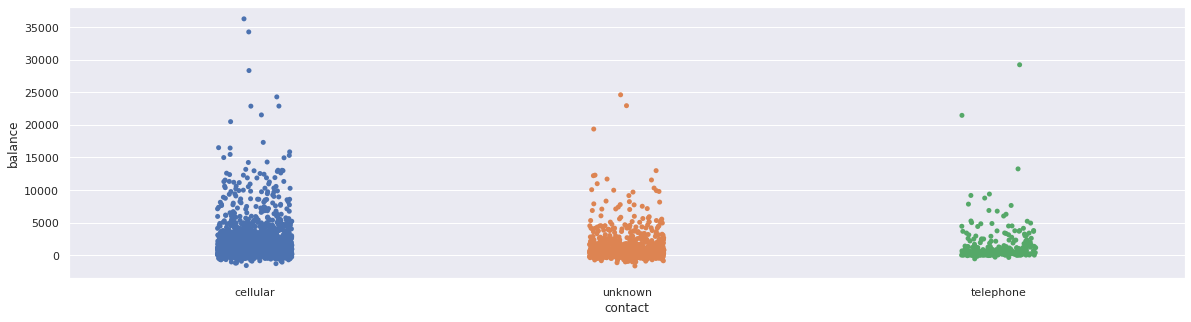

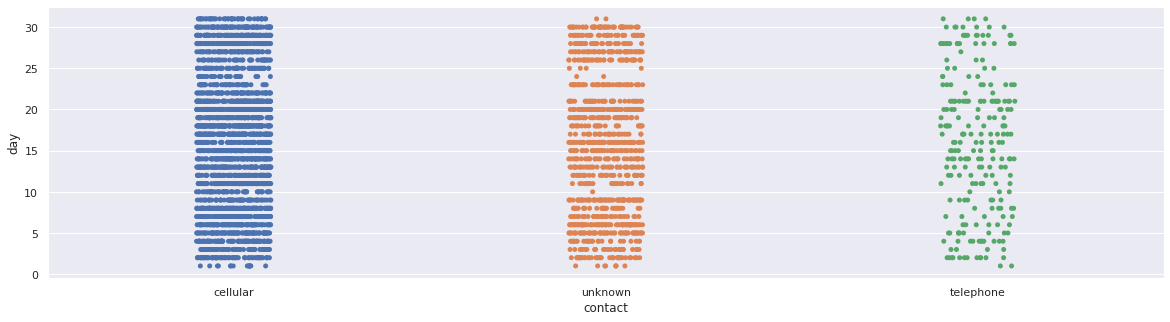

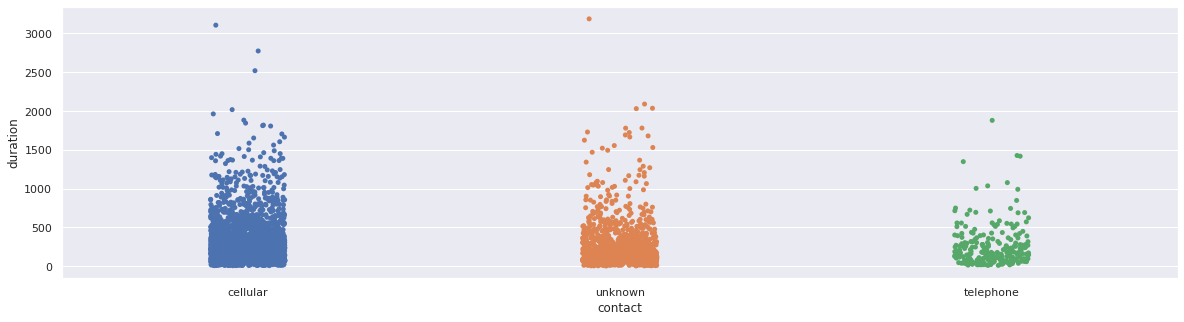

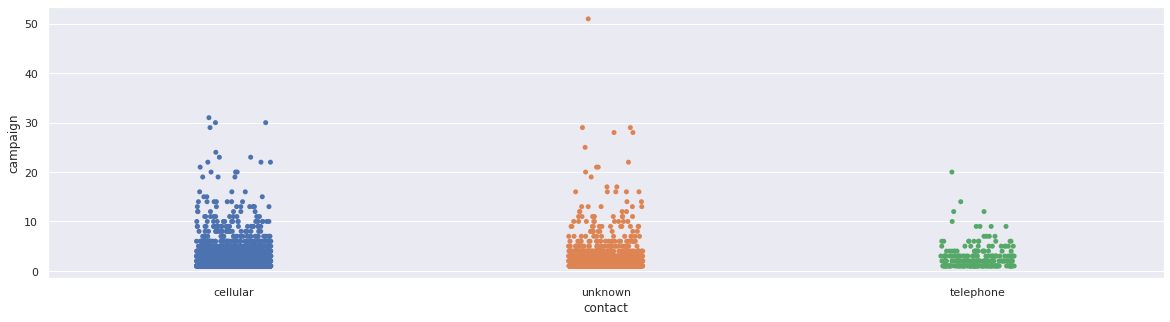

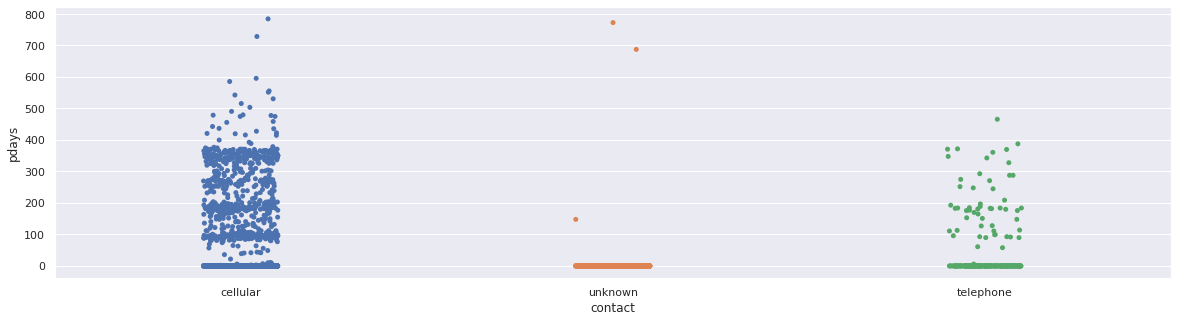

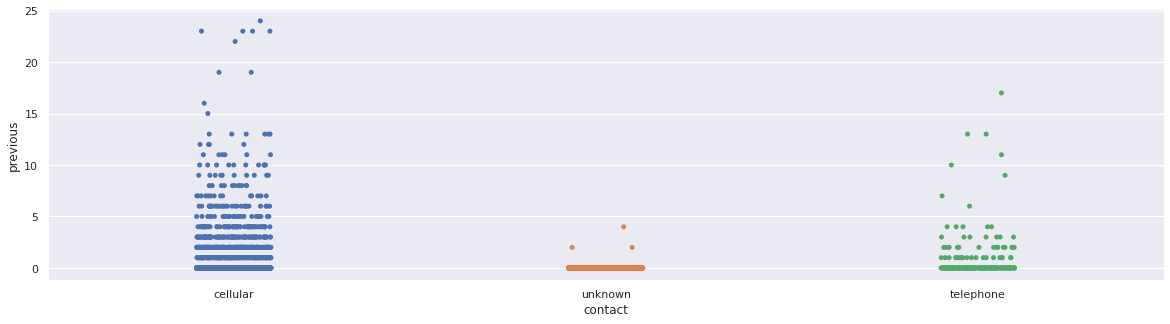

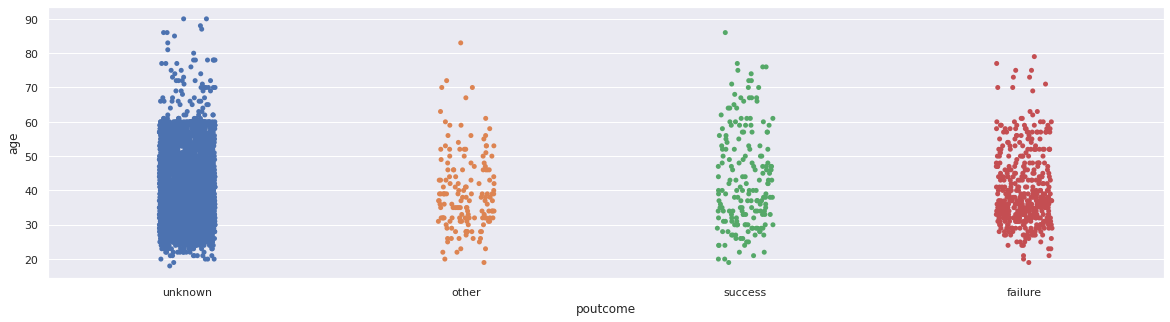

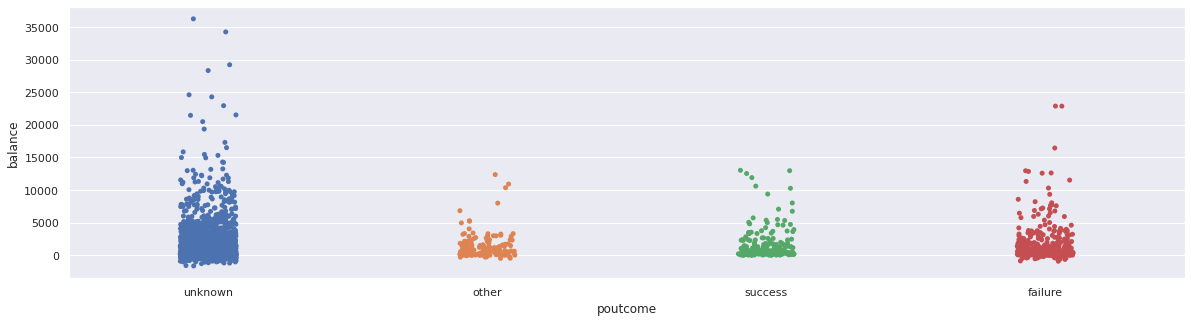

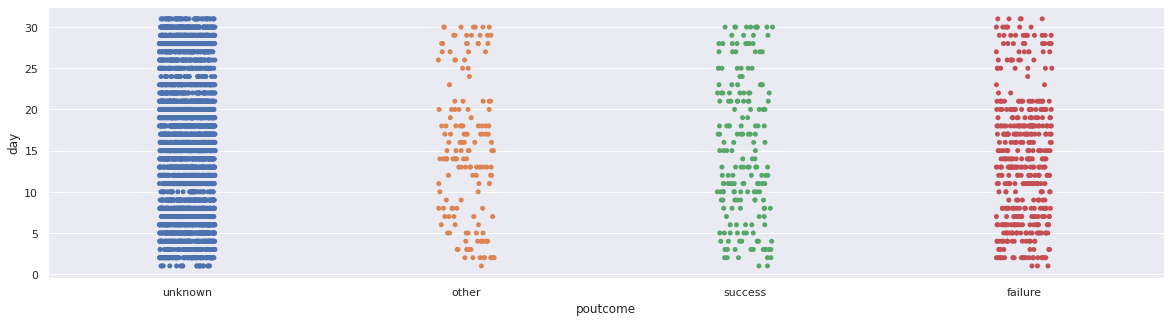

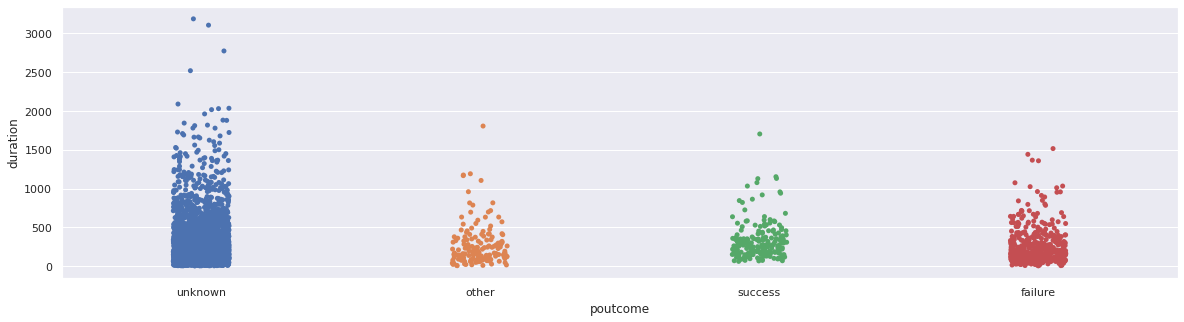

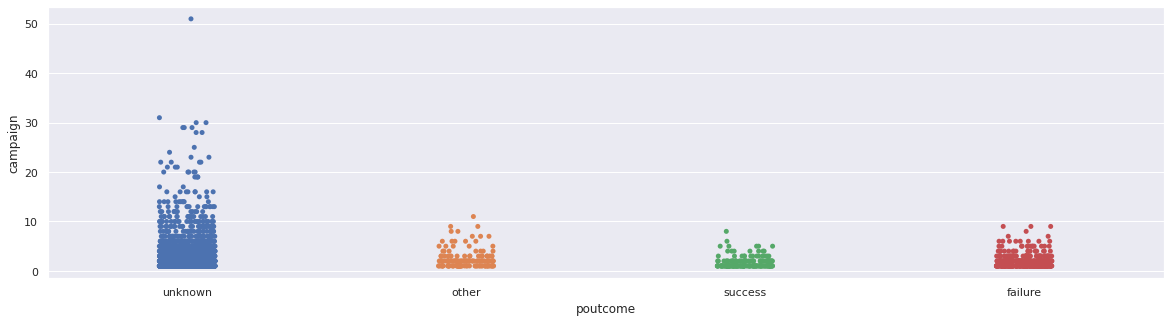

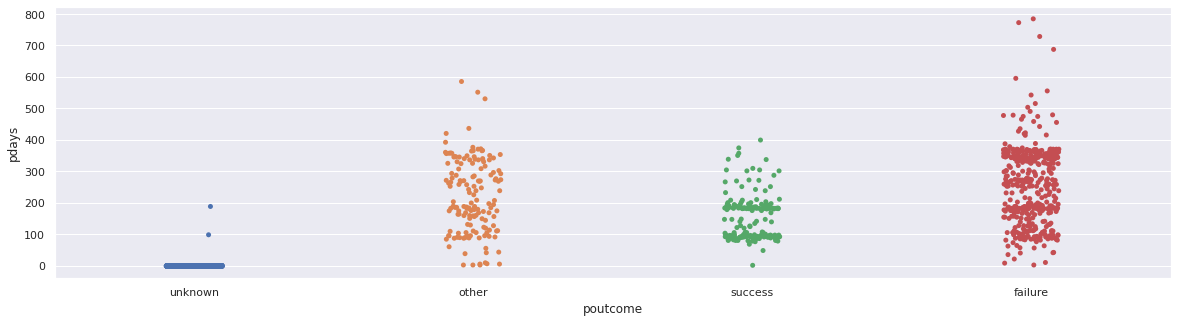

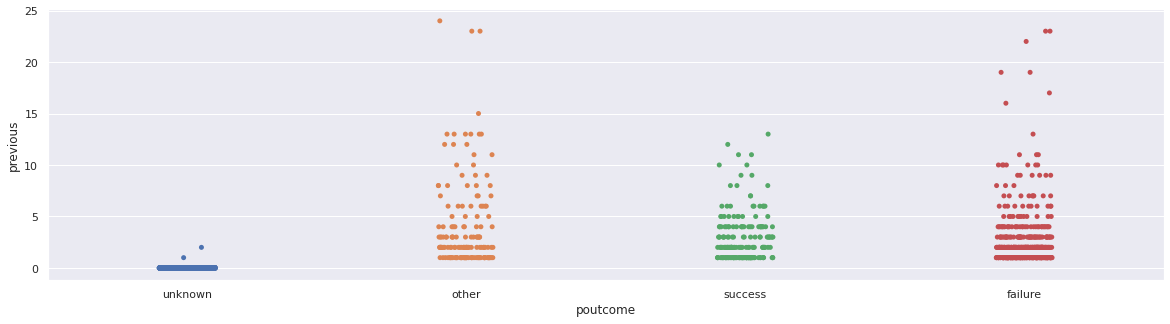

In [85]:
# For input features
plt.rcParams['figure.figsize'] = (20, 5)
for i in categorical_data:
  for j in numerical_data:
    sns.stripplot(data=categorical_data,x=categorical_data[i],y=numerical_data[j])
    plt.show()

**SWARM PLOTS**

In [86]:
# # For input features
# plt.rcParams['figure.figsize'] = (20, 5)
# for i in categorical_data:
#   for j in numerical_data:
#     sns.swarmplot(data=categorical_data,x=categorical_data[i],y=numerical_data[j])
#     plt.show()

## **INDIVIDUAL PLOTS FOR THE REPORT (SUMMARIZATION)**

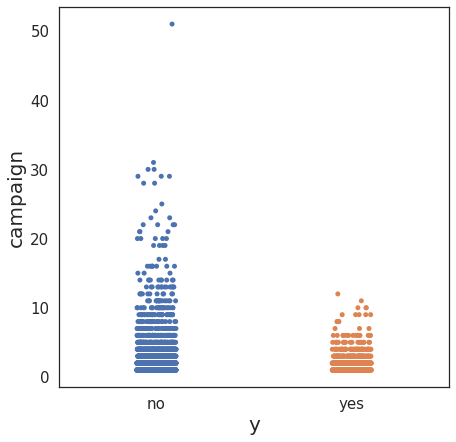

In [87]:
sns.set(style="white")
plt.rcParams['figure.figsize']=(7,7)
b = sns.stripplot(x=df['y'],y=numerical_data['campaign'])
b.set_xlabel("y",fontsize=20)
b.set_ylabel("campaign",fontsize=20)
b.tick_params(labelsize=15)
# plt.legend(loc="upper left", frameon=True, fontsize=15)
plt.show()

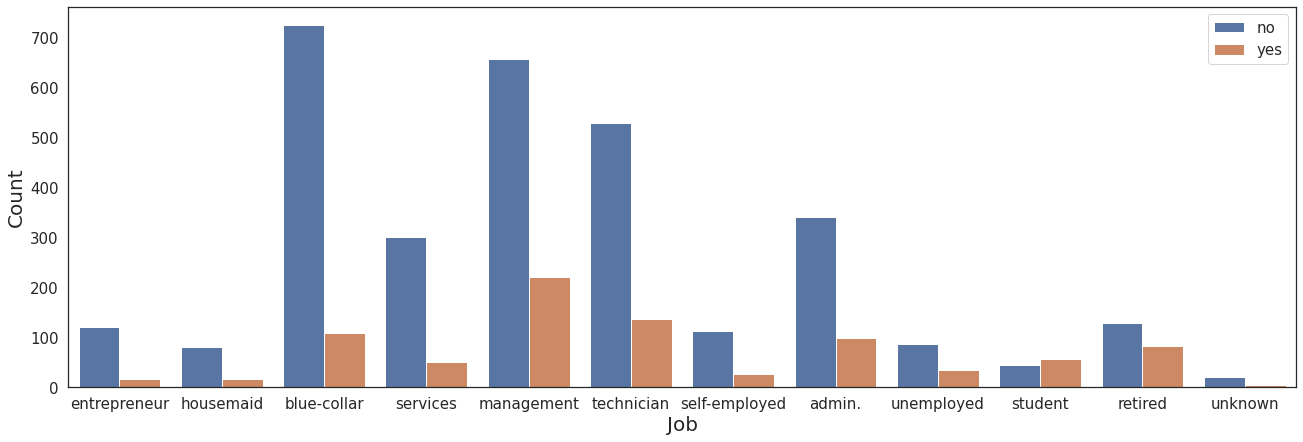

In [88]:
plt.rcParams['figure.figsize']=(22,7)
b = sns.countplot(hue=y['y'],x=categorical_data['job'])
b.set_xlabel("Job",fontsize=20)
b.set_ylabel("Count",fontsize=20)
b.tick_params(labelsize=15)
plt.legend(loc="upper right", frameon=True, fontsize=15)
plt.show()

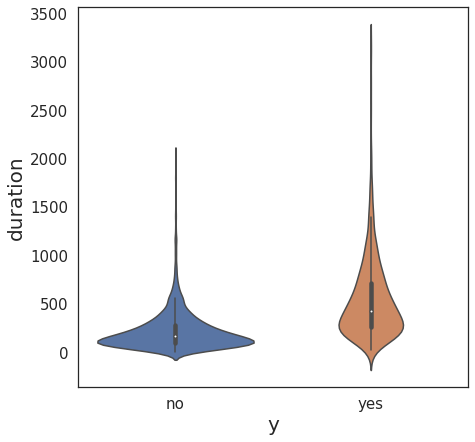

In [89]:
plt.rcParams['figure.figsize']=(7,7)
b = sns.violinplot(x=df['y'],y=numerical_data['duration'])
b.set_xlabel("y",fontsize=20)
b.set_ylabel("duration",fontsize=20)
b.tick_params(labelsize=15)
plt.show()

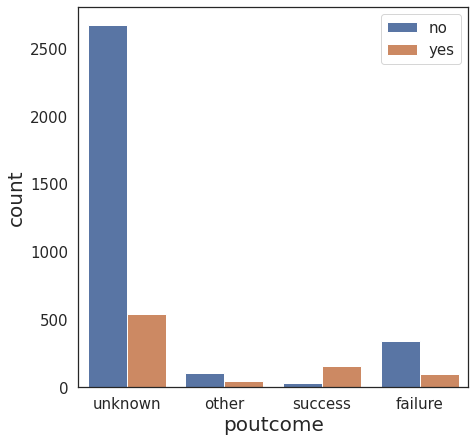

In [90]:
plt.rcParams['figure.figsize']=(7,7)
b = sns.countplot(hue=y['y'],x=categorical_data['poutcome'])
b.set_xlabel("poutcome",fontsize=20)
b.set_ylabel("count",fontsize=20)
b.tick_params(labelsize=15)
plt.legend(loc="upper right", frameon=True, fontsize=15)
plt.show()

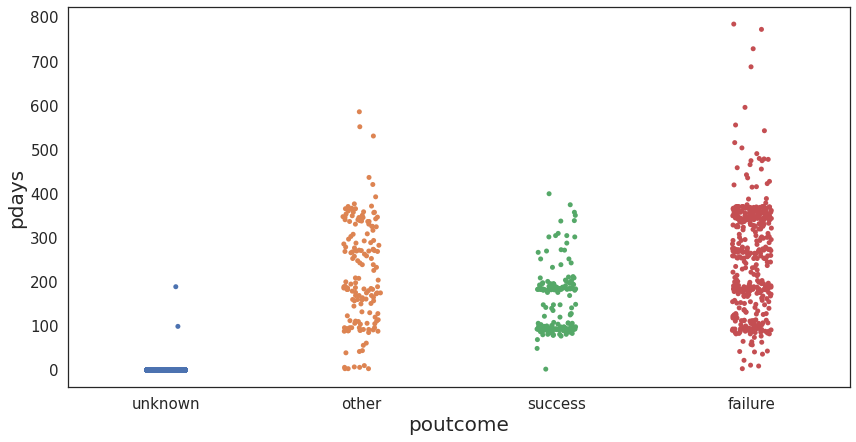

In [91]:

plt.rcParams['figure.figsize'] = (14, 7)
b = sns.stripplot(data=categorical_data,x=categorical_data["poutcome"],y=numerical_data["pdays"])
b.set_xlabel("poutcome",fontsize=20)
b.set_ylabel("pdays",fontsize=20)
b.tick_params(labelsize=15)
# plt.legend(loc="upper right", frameon=True, fontsize=15)
plt.show()


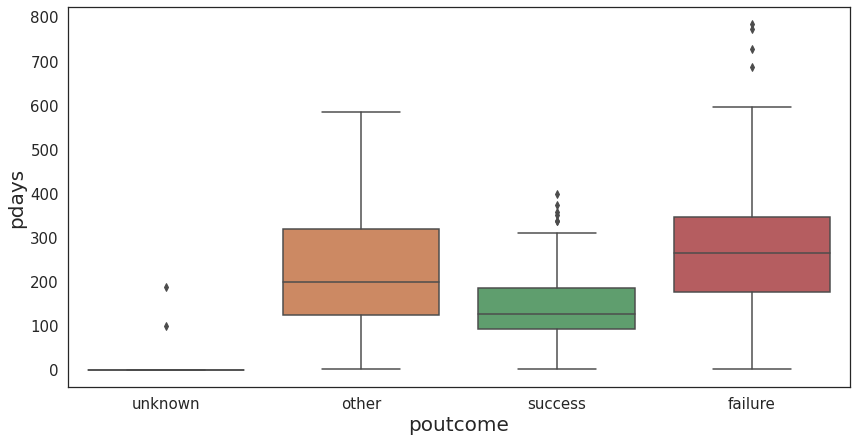

In [92]:
plt.rcParams['figure.figsize'] = (14, 7)
b = sns.boxplot(data=categorical_data,x=categorical_data["poutcome"],y=numerical_data["pdays"])
b.set_xlabel("poutcome",fontsize=20)
b.set_ylabel("pdays",fontsize=20)
b.tick_params(labelsize=15)
# plt.legend(loc="upper right", frameon=True, fontsize=15)
plt.show()